# <FONT size="10pt"> <center>Projet 2</center></FONT>

#### <FONT size="10pt"> <center>Analysez des données de systèmes éducatifs</center></FONT>

- Mission : **analyse pré-exploratoire de ce jeu de données**
- Jeux de Données : https://datacatalog.worldbank.org/search/dataset/0038480
- Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.
- Projet : **expansion à l’international**
- Objectif : **Vérifier si les données éducatives de la Banque mondiale peuvent servir à éclairer le projet d'expansion.**
- Information :
    - **Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)**
    - **Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)**
    - **Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)**
    - **Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)**
- Interrogations :
    - **Quels sont les pays prioritaires pour les opérations de la start-up de la EdTech, nommée academy ?**
    - **Quels pays présentent un fort potentiel de clientèle pour nos services ?**
    - **Quelle sera l'évolution du potentiel client pour chacun de ces pays ?**
- Livrables :
    - **Un notebook comportant les analyses pré-exploratoires réalisées (non cleané, pour comprendre votre démarche).**
    - **Un support de présentation pour la soutenance.**
- Projet Openclassroom : https://openclassrooms.com/fr/paths/793/projects/1499/assignment

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## I- Importations et verifications des versions des librairies 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import colorcet as cc
import sklearn
from sklearn.metrics import r2_score
import re
pd.set_option('mode.chained_assignment', None) # Pour éviter la survenue de messages d'erreur lors de la création
                                                 # d'un nouveau dataframe à partir d'un existant
    
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')  # code optionnel

In [4]:
# Version des librairies importées:

print('La version de pandas utilisée est :', pd.__version__)
print('La version de numpy utilisée est :', np.__version__)
print('La version de seaborn utilisée est :', sns.__version__)
print('La version de matplotlib utilisée est :', matplotlib.__version__)
print('La version de colorcet utilisée est :', cc.__version__)
print('La version de sklearn utilisée est :', sklearn.__version__)

La version de pandas utilisée est : 1.4.4
La version de numpy utilisée est : 1.24.4
La version de seaborn utilisée est : 0.11.2
La version de matplotlib utilisée est : 3.5.2
La version de colorcet utilisée est : 3.0.0
La version de sklearn utilisée est : 1.0.2


In [5]:
# Option de largueur de colonne:
pd.get_option('max_colwidth')
pd.options.display.max_colwidth = 150

#Option de nombre de lignes:
pd.get_option('display.max_rows')
pd.options.display.max_rows = 600

## II- Importations des données

In [6]:
# Importation des données:
df_StatsFootNote = pd.read_csv('EdStatsFootNote.csv')
df_Country = pd.read_csv('EdStatsCountry.csv')
df_StatsSeries = pd.read_csv('EdStatsSeries.csv')
df_CountrySeries = pd.read_csv('EdStatsCountry-Series.csv')
df_Data = pd.read_csv("EdStatsData.csv")

## III- Valider la qualité de ce jeu de données 

### 1- DataFrame df_StatsFootNote (Révision des méthodes de calcul et prise en compte des incertitudes des données)

In [7]:
df_StatsFootNote.head()

# del df_StatsFootNote['Unnamed: 4'] # Suppression de Colonne créée à l'ouverture du fichier 
# df_StatsFootNote.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [8]:
# Nbre de lignes et de colonnes
df_StatsFootNote.shape

(643638, 5)

In [9]:
# information sur nos differentes variables
df_StatsFootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [10]:
df_StatsFootNote = df_StatsFootNote.drop(columns=['Unnamed: 4'])

In [11]:
# Nbre de doublon:
print('Nous observons', sum(df_StatsFootNote.duplicated()),'doublon dans ce DataFrame.')

Nous observons 0 doublon dans ce DataFrame.


In [12]:
# Analyse des colonnes:
print('Nous observons', df_StatsFootNote['CountryCode'].nunique(), 'pays répertoriés dans ce DataFrame.')
print()
print('Nous observons', df_StatsFootNote['SeriesCode'].nunique(), 'indicateurs distincts dans ce DataFrame.')
print()
print('Nous observons', df_StatsFootNote['Year'].nunique(), 'années distinctes dans ce DataFrame.')

Nous observons 239 pays répertoriés dans ce DataFrame.

Nous observons 1558 indicateurs distincts dans ce DataFrame.

Nous observons 56 années distinctes dans ce DataFrame.


In [13]:
df_StatsFootNote['Year'].unique()

array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

- **Seuls 1 558 indicateurs parmi les 3 665 indicateurs répertoriés dans le DataFrame décrivent les indicateurs " df_StatsSeries" (voir III-3).**
- **Ce DataFrame "df_StatsFootNote" contient 56 années (55 si l'on corrige l'erreur de typographie pour yr2012), par rapport aux 65 années présentes dans la DataFrame principale "df-Data" (voir III-5).**

In [14]:
df_StatsFootNote['Year'] = df_StatsFootNote['Year'].str.extract('(\d{4})').astype(int)

#vCe code utilise la méthode str.extract pour extraire les quatre chiffres qui suivent 'YR' dans chaque chaîne de date, 
# puis convertit ces chiffres en entiers avec astype(int).

In [15]:
df_StatsFootNote.sort_values("Year")

CountryCode         SeriesCode  Year  \
25952          AUS        SE.SEC.ENRL  1970   
542274         SSA  SE.PRM.TCHR.FE.ZS  1970   
212638         GIN        SE.PRM.DURS  1970   
158464         ECA     SE.PRM.PRIV.ZS  1970   
403595         MIC      UIS.NER.1.GPI  1970   
...            ...                ...   ...   
519270         SDN  SP.POP.TOTL.FE.ZS  2050   
345510         LIE        SP.POP.TOTL  2050   
383013         MDA  SP.POP.TOTL.MA.IN  2050   
533531         SRB  SP.POP.TOTL.FE.ZS  2050   
436626         MYS  SP.POP.1564.MA.IN  2050   

                                           DESCRIPTION  
25952                                     Country Data  
542274  UNESCO Institute for Statistics (UIS) estimate  
212638                                    Country Data  
158464  UNESCO Institute for Statistics (UIS) estimate  
403595  UNESCO Institute for Statistics (UIS) estimate  
...                                                ...  
519270                       Including Southern Sudan.  
345510                             WPP 2008 Projection  
383013                         Including Transnistria.  
533531                               Including Kosovo.  
436626                    Including Sabah and Sarawak.  

[643638 rows x 4 columns]

In [16]:
# Nbre d'années dans le DataFrame "df_StatsFootNote"
df_StatsFootNote['Year'].nunique()

55

In [17]:
# Analyse de la colonne "DESCRIPTION":
unique_descriptions = df_StatsFootNote['DESCRIPTION'].unique().tolist()
unique_descriptions

['Country estimation.',
 'UIS Estimation',
 'UNESCO Institute for Statistics (UIS) estimate',
 '5-year average value between 0s and 5s',
 'Percentage includes lower secondary education.',
 'Country data',
 'Country Data',
 'UNSD WPP08 revision file 2A and 3A.',
 'Not applicable',
 'Percentage includes all tertiary levels (ISCED 5-8)',
 'Estimated',
 'UIS estimation.',
 '<0.1. Plausible bound is <0.1-0.1',
 'Uncertainty bound is 127.1 - 148.2',
 'Uncertainty bound is 146.6 - 173.2',
 'Uncertainty bound is 134.1 - 157.1',
 'Uncertainty bound is 207.2 - 261.6',
 'Uncertainty bound is 60.2 - 86.1',
 'Uncertainty bound is 184.5 - 227.9',
 'Uncertainty bound is 167.8 - 201.7',
 'Uncertainty bound is 130.4 - 152.5',
 'Uncertainty bound is 240.3 - 308.5',
 'Country estimation',
 'Uncertainty bound is 212.6 - 269.3',
 'Uncertainty bound is 201.4 - 253.3',
 'Uncertainty bound is 190.1 - 236.6',
 'Uncertainty bound is 162.4 - 193.8',
 'Uncertainty bound is 123.7 - 144.2',
 'Uncertainty bound is 9

- **La colonne "DESCRIPTION" semble décrire l'incertitude associée à certains indicateurs pour des années de mesures spécifiques. Les valeurs de la colonne semblent inclure des informations telles que "Estimated" (estimé), "UIS estimation" (estimation UIS), des plages d'incertitude ("Uncertainty bound is ..."), ainsi que des indications spécifiques pour certaines catégories de données comme "Country Data" et "Country estimation". Ces informations peuvent être importantes lors de l'interprétation des données, car elles fournissent des indications sur la fiabilité et la nature des mesures associées à chaque indicateur.**

In [18]:
# Analyse des descriptions associées aux indicateurs choisis dans la section (voir III-3) :
selected_indicators = df_StatsSeries.loc[df_StatsSeries['Periodicity'].notna(), 'Series Code'].tolist()

unique_descriptions_selected = df_StatsFootNote.loc[df_StatsFootNote['SeriesCode'].isin(selected_indicators),
                                                    'DESCRIPTION'].unique().tolist()
unique_descriptions_selected

['5-year average value between 0s and 5s',
 'UNSD WPP08 revision file 2A and 3A.',
 '<0.1. Plausible bound is <0.1-0.1',
 'Uncertainty bound is 127.1 - 148.2',
 'Uncertainty bound is 146.6 - 173.2',
 'Uncertainty bound is 134.1 - 157.1',
 'Uncertainty bound is 207.2 - 261.6',
 'Uncertainty bound is 60.2 - 86.1',
 'Uncertainty bound is 184.5 - 227.9',
 'Uncertainty bound is 167.8 - 201.7',
 'Uncertainty bound is 130.4 - 152.5',
 'Uncertainty bound is 240.3 - 308.5',
 'Uncertainty bound is 212.6 - 269.3',
 'Uncertainty bound is 201.4 - 253.3',
 'Uncertainty bound is 190.1 - 236.6',
 'Uncertainty bound is 162.4 - 193.8',
 'Uncertainty bound is 123.7 - 144.2',
 'Uncertainty bound is 98.4 - 115',
 'Uncertainty bound is 56.6 - 84.7',
 'Uncertainty bound is 260.6 - 335.6',
 'Uncertainty bound is 229.5 - 293.2',
 'Uncertainty bound is 116.9 - 136.5',
 'Uncertainty bound is 113.4 - 132.5',
 'Uncertainty bound is 102.3 - 119.6',
 'Uncertainty bound is 90.3 - 106.6',
 'Uncertainty bound is 255.3 

### 2- DataFrame df_Country (les différents pays)

In [19]:
df_Country.head(2)

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   

                                                                                                                                           Special Notes  \
0          SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.   
1  Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and...   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   

            IMF data dissemination standard  Latest population census  \
0                                       NaN                      2010   
1  General Data Dissemination System (GDDS)                      1979   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1           Integrated household survey (IHS), 2008   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   

  Unnamed: 31  
0         NaN  
1         NaN  

[2 rows x 32 columns]

In [20]:
# Nbre de lignes et de colonnes
df_Country.shape

(241, 32)

In [21]:
# information sur nos differentes variables
df_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [22]:
# Nbre de doublon:
print('Nous observons', sum(df_Country.duplicated()),'doublon dans ce DataFrame.')

Nous observons 0 doublon dans ce DataFrame.


In [23]:
# Déterminons les valeurs manquantes NaNs:
print('Nous observons', df_Country.isna().sum().sum(), 'NaNs dans ce DataFrame.')
print('Nous observons', df_Country.count().sum(), 'valeurs qui ne sont pas des NaNs dans ce DataFrame.')

Nous observons 2354 NaNs dans ce DataFrame.
Nous observons 5358 valeurs qui ne sont pas des NaNs dans ce DataFrame.


In [24]:
# nb_na_web = df_Country.isnull().sum()
# nb_na_web[nb_na_web>0]

In [25]:
# valeurs en % de NaNs par colonne
df_Country.isna().sum()/len(df_Country)*100

Country Code                                           0.000000
Short Name                                             0.000000
Table Name                                             0.000000
Long Name                                              0.000000
2-alpha code                                           1.244813
Currency Unit                                         10.788382
Special Notes                                         39.834025
Region                                                11.203320
Income Group                                          11.203320
WB-2 code                                              0.414938
National accounts base year                           14.937759
National accounts reference year                      86.721992
SNA price valuation                                   18.257261
Lending category                                      40.248963
Other groups                                          75.933610
System of National Accounts             

In [26]:
# Selection de nos variables importantes:

# Nbres des pays:
print('Nous observons', df_Country['Short Name'].nunique(), 'groupe de pays différents.')
print()

# Les INCOMES: "Revenus"
print('Nous observons', len(df_Country['Income Group'].unique()),'groupes de "Revenue" dans ce DataFrame.')
print('Nous observons', len(df_Country[df_Country['Income Group'].isna()]), 'NaN présentes dans la colonne "Income Group" correspondent aux groupements de pays.')
print()

# Les régions:
print('Nous observons', df_Country['Region'].nunique(), 'regions différentes.')
print('Nous observons', len(df_Country[df_Country['Region'].isna()]), 'NaN présentes dans la colonne "Region" correspondent aux regroupements de pays.')

Nous observons 241 groupe de pays différents.

Nous observons 6 groupes de "Revenue" dans ce DataFrame.
Nous observons 27 NaN présentes dans la colonne "Income Group" correspondent aux groupements de pays.

Nous observons 7 regions différentes.
Nous observons 27 NaN présentes dans la colonne "Region" correspondent aux regroupements de pays.


- **L'analyse du jeu de données est enrichissante lorsqu'elle est effectuée en segmentant par pays, région et niveau de revenu.**
- **Dans la seconde phase du projet, nous formulons l'hypothèse que les pays les plus pertinents pour la start-up de la EdTech Academy sont probablement ceux affichant un niveau de revenu élevé, ce qui permettrait aux individus d'étudier en ligne pour un public de niveau lycée et université à l'aide d'un ordinateur.** 

In [27]:
# Examinons les groupements par région

df_Country.loc[df_Country['Region'].isna(), ['Short Name']]

Short Name
5                                        Arab World
57            East Asia & Pacific (developing only)
58          East Asia & Pacific (all income levels)
59          Europe & Central Asia (developing only)
60        Europe & Central Asia (all income levels)
63                                        Euro area
68                                   European Union
78                                        Gibraltar
89                                      High income
92           Heavily indebted poor countries (HIPC)
116     Latin America & Caribbean (developing only)
122   Latin America & Caribbean (all income levels)
123    Least developed countries: UN classification
124                                      Low income
127                             Lower middle income
128                             Low & middle income
140  Middle East & North Africa (all income levels)
143                                   Middle income
148    Middle East & North Africa (developing only)
157                                   North America
166                                           Nauru
168                                    OECD members
187                                      South Asia
198            Sub-Saharan Africa (developing only)
200          Sub-Saharan Africa (all income levels)
225                             Upper middle income
234                                           World

- **Les regroupements régionaux résultent d'une combinaison des options de la colonne "Income" et de la colonne "Region", ce qui permet de les identifier en grande partie à travers ces deux colonnes.**

In [154]:
# Groupement par groupe de revenu
df_Country.loc[df_Country['Income Group'].notna()].groupby('Income Group')['Short Name'].apply(list).to_frame()

Short Name
Income Group                                                                                                                                                               
High income: OECD     [Australia, Austria, Belgium, Canada, Switzerland, Chile, Czech Republic, Germany, Denmark, Spain, Estonia, Finland, France, United Kingdom, Greec...
High income: nonOECD  [Aruba, Andorra, United Arab Emirates, Antigua and Barbuda, Bahrain, The Bahamas, Bermuda, Barbados, Brunei, Channel Islands, Curaçao, Cayman Isla...
Low income            [Afghanistan, Burundi, Benin, Burkina Faso, Bangladesh, Central African Republic, Dem. Rep. Congo, Comoros, Eritrea, Ethiopia, Guinea, The Gambia,...
Lower middle income   [Armenia, Bolivia, Bhutan, Côte d'Ivoire, Cameroon, Congo, Cabo Verde, Djibouti, Egypt, Micronesia, Georgia, Ghana, Guatemala, Guyana, Honduras, I...
Upper middle income   [Angola, Albania, Argentina, American Samoa, Azerbaijan, Bulgaria, Bosnia and Herzegovina, Belarus, Belize, Brazil, Botswana, China, Colombia, Cos...

In [155]:
# Groupement par région
df_Country.loc[df_Country['Region'].notna()].groupby('Region')['Short Name'].apply(list).to_frame()

Short Name
Region                                                                                                                                                                           
East Asia & Pacific         [American Samoa, Australia, Brunei, China, Fiji, Micronesia, Guam, Hong Kong SAR, China, Indonesia, Japan, Cambodia, Kiribati, Korea, Lao PDR, Mac...
Europe & Central Asia       [Albania, Andorra, Armenia, Austria, Azerbaijan, Belgium, Bulgaria, Bosnia and Herzegovina, Belarus, Switzerland, Channel Islands, Cyprus, Czech R...
Latin America & Caribbean   [Aruba, Argentina, Antigua and Barbuda, The Bahamas, Belize, Bolivia, Brazil, Barbados, Chile, Colombia, Costa Rica, Cuba, Curaçao, Cayman Islands...
Middle East & North Africa  [United Arab Emirates, Bahrain, Djibouti, Algeria, Egypt, Iran, Iraq, Israel, Jordan, Kuwait, Lebanon, Libya, Morocco, Malta, Oman, West Bank and ...
North America                                                                                                                                    [Bermuda, Canada, United States]
South Asia                                                                                         [Afghanistan, Bangladesh, Bhutan, India, Sri Lanka, Maldives, Nepal, Pakistan]
Sub-Saharan Africa          [Angola, Burundi, Benin, Burkina Faso, Botswana, Central African Republic, Côte d'Ivoire, Cameroon, Dem. Rep. Congo, Congo, Comoros, Cabo Verde, E...

In [29]:
# Étude de la colonne "recensement de la population":
population_census_study = df_Country['Latest population census'].value_counts(dropna=False).to_frame().reset_index()
population_census_study

index  \
0                                                                                                                                                    2011   
1                                                                                                                                                    2010   
2                                                                                                                                                     NaN   
3                                                                                                                                                    2012   
4                                                                                                                                                    2009   
5                                                                                                                                                    2008   
6                                                                                                                                                    2007   
7                                                                                                                                                    2013   
8                                                                                                                                                    2006   
9                                                                                                                                                    2004   
10                                                                                                                                                   2002   
11                                                                                                                                                   2005   
12                                                                                       2011. Population figures compiled from administrative registers.   
13                                                                                                                                                   2003   
14                                                                                                                                                   1984   
15                                                                                                                                                   1998   
16                                                                                                                                                   1970   
17                                                                                                                                                   1979   
18                                                                                                2006. Rolling census based on continuous sample survey.   
19                                                                                                                          Guernsey: 2009; Jersey: 2011.   
20                                                                                                                                                   1996   
21  2011. The population censuses for 1986 and 1996 were based on a one-in-seven sample of the population, while that for 2006 was based on a one-in-t...   
22                                                                                                                                                   1997   
23                                                                                                                                                   1993   
24                                                                                                                                                   1983   
25                                                                

- **Les années présentant le plus grand nombre de pays avec un recensement répertorié sont 2011, suivie de 2010. Ainsi, pour une analyse exhaustive de la population totale, il est recommandé de prioriser l'année 2011.**

In [30]:
# Élaboration d'un DataFrame restreint des pays, comprenant uniquement les colonnes pertinentes pour l'analyse 
    # des données chiffrées, tout en excluant pas les regroupements de régions et de revenus déjà existants.

df_Country_restreint = df_Country[['Country Code', 'Short Name', 'Region', 'Income Group']].dropna(subset=['Region'])
df_Country_restreint

# Cette méthode dropna permet d'éliminer les lignes où la colonne 'Region' contenent des valeurs
# NaN, ce qui peut rendre le code plus concis.

Country Code                      Short Name                      Region  \
0            ABW                           Aruba   Latin America & Caribbean   
1            AFG                     Afghanistan                  South Asia   
2            AGO                          Angola          Sub-Saharan Africa   
3            ALB                         Albania       Europe & Central Asia   
4            AND                         Andorra       Europe & Central Asia   
6            ARE            United Arab Emirates  Middle East & North Africa   
7            ARG                       Argentina   Latin America & Caribbean   
8            ARM                         Armenia       Europe & Central Asia   
9            ASM                  American Samoa         East Asia & Pacific   
10           ATG             Antigua and Barbuda   Latin America & Caribbean   
11           AUS                       Australia         East Asia & Pacific   
12           AUT                         Austria       Europe & Central Asia   
13           AZE                      Azerbaijan       Europe & Central Asia   
14           BDI                         Burundi          Sub-Saharan Africa   
15           BEL                         Belgium       Europe & Central Asia   
16           BEN                           Benin          Sub-Saharan Africa   
17           BFA                    Burkina Faso          Sub-Saharan Africa   
18           BGD                      Bangladesh                  South Asia   
19           BGR                        Bulgaria       Europe & Central Asia   
20           BHR                         Bahrain  Middle East & North Africa   
21           BHS                     The Bahamas   Latin America & Caribbean   
22           BIH          Bosnia and Herzegovina       Europe & Central Asia   
23           BLR                         Belarus       Europe & Central Asia   
24           BLZ                          Belize   Latin America & Caribbean   
25           BMU                         Bermuda               North America   
26           BOL                         Bolivia   Latin America & Caribbean   
27           BRA                          Brazil   Latin America & Caribbean   
28           BRB                        Barbados   Latin America & Caribbean   
29           BRN                          Brunei         East Asia & Pacific   
30           BTN                          Bhutan                  South Asia   
31           BWA                        Botswana          Sub-Saharan Africa   
32           CAF        Central African Republic          Sub-Saharan Africa   
33           CAN                          Canada               North America   
34           CHE                     Switzerland       Europe & Central Asia   
35           CHI                 Channel Islands       Europe & Central Asia   
36           CHL                           Chile   Latin America & Caribbean   
37           CHN                           China         East Asia & Pacific   
38           CIV                   Côte d'Ivoire          Sub-Saharan Africa   
39           CMR                        Cameroon          Sub-Saharan Africa   
40           COD                 Dem. Rep. Congo          Sub-Saharan Africa   
41           COG                           Congo          Sub-Saharan Africa   
42           COL                        Colombia   Latin America & Caribbean   
43           COM                         Comoros          Sub-Saharan Africa   
44           CPV                      Cabo Verde          Sub-Saharan Africa   
45           CRI                      Costa Rica   Latin America & Caribbean   
46           CUB                            Cuba   Latin America & Caribbean   
47           CUW                         Curaçao   Latin America & Caribbean   
48           CYM                  Cayman Islands   Latin America & Caribbean   
49           CYP                          Cyprus       Europe & Central Asia   
50  

### 3- DataFrame df_StatsSeries (Série de statistiques ou Description des indicateurs)

In [31]:
df_StatsSeries.head(2)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   

                                                           Indicator Name  \
0  Barro-Lee: Percentage of female population age 15-19 with no education   
1         Barro-Lee: Percentage of population age 15-19 with no education   

                                              Short definition  \
0  Percentage of female population age 15-19 with no education   
1         Percentage of population age 15-19 with no education   

                                               Long definition  \
0  Percentage of female population age 15-19 with no education   
1         Percentage of population age 15-19 with no education   

   Unit of measure Periodicity Base Period Other notes Aggregation method  \
0              NaN         NaN         NaN         NaN                NaN   
1              NaN         NaN         NaN         NaN                NaN   

   ... Notes from original source  General comments  \
0  ...                        NaN               NaN   
1  ...                        NaN               NaN   

                                                       Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
1  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  

[2 rows x 21 columns]

In [32]:
df_StatsSeries.shape

(3665, 21)

In [33]:
df_StatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [34]:
# Nbre de doublon:
print('Nous observons', sum(df_StatsSeries.duplicated()),'doublon dans ce DataFrame.')

Nous observons 0 doublon dans ce DataFrame.


In [35]:
# Déterminons les valeurs manquantes NaNs:
print('Nous observons', df_StatsSeries.isna().sum().sum(), 'NaNs dans ce DataFrame.')
print('Nous observons', df_StatsSeries.count().sum(), 'valeurs qui ne sont pas des NaNs dans ce DataFrame.')

Nous observons 55203 NaNs dans ce DataFrame.
Nous observons 21762 valeurs qui ne sont pas des NaNs dans ce DataFrame.


In [36]:
# valeurs en % de NaNs par colonne
df_StatsSeries.isna().sum()/len(df_StatsSeries)*100

Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Short definition                        41.173261
Long definition                          0.000000
Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Source                                   0.000000
Statistical concept and methodology     99.372442
Development relevance                   99.918145
Related source links                    94.133697
Other web links                        100.000000
Related indicators                     100.000000
License Type                           100.000000


- **De nombreuses colonnes sont entièrement composées de NaNs (100%).**
- **Un grand nombre de colonnes présentent une quasi-vacuité, avec des pourcentages de NaNs compris entre 90 et 100%.**

In [37]:
# Analyse des colonnes:
print('Nous observons', df_StatsSeries['Series Code'].nunique(), "indicateurs dans ce DataFrame.")
print()
print('Nous observons', df_StatsSeries['Topic'].nunique(), 'topics dans ce DataFrame.')
print()
print('Sur', len(df_StatsSeries), 'on observe', len(df_StatsSeries[df_StatsSeries['Periodicity'].notna()]),
      'lignes qui ont une périodicité de noté :', 
      df_StatsSeries[df_StatsSeries['Periodicity'].notna()]['Periodicity'].unique()[0])

Nous observons 3665 indicateurs dans ce DataFrame.

Nous observons 37 topics dans ce DataFrame.

Sur 3665 on observe 99 lignes qui ont une périodicité de noté : Annual


In [38]:
# Periodicity
df_StatsSeries[df_StatsSeries['Periodicity'].notna()]['Periodicity'].unique()[0]

'Annual'

- **L'exploitation des topics (thèmes) et de la périodicité (fréquence) pour réduire le nombre d'indicateurs est pertinente.**

In [39]:
# Analyse de la colonne Base Period:
df_StatsSeries['Base Period'].value_counts(dropna = False)

NaN                           3351
Projections (2010 to 2100)     308
2010                             2
2011                             2
14                               2
Name: Base Period, dtype: int64

- **La colonne comportant 91% de NaNs, comprenant 308 indicateurs qui ne sont que des projections de l'année 2010 à 2100.**

In [40]:
df_StatsSeries.loc[df_StatsSeries['Periodicity'].notna(), 'Base Period'].value_counts(dropna=False)

NaN     95
2010     2
2011     2
Name: Base Period, dtype: int64

- **Parmi les indicateurs ayant une périodicité annuelle, il y en a 2 pour l'année 2010, 2 pour 2011 et les autres n'ont pas de période spécifiée. Cela implique que ces indicateurs ne devraient pas  disposer de données au-delà de l'année actuelle..**

In [41]:
# Les sujets (Topics) incluses dans les 99 indicateurs affichant une périodicité annuelle
df_StatsSeries.loc[df_StatsSeries['Periodicity'].notna()]['Topic'].value_counts()

Population                                                                                      52
Health: Population: Structure                                                                   13
Social Protection & Labor: Labor force structure                                                11
Economic Policy & Debt: Purchasing power parity                                                  6
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators           3
Laber                                                                                            3
Social Protection & Labor: Unemployment                                                          3
Infrastructure: Communications                                                                   2
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators     2
Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita                            1
Health: Ri

In [42]:
# Indicateurs avec périodicité annuelle et non annuelle
indicateurs_annuels = df_StatsSeries.loc[df_StatsSeries['Periodicity'].notna(), 'Indicator Name'].tolist()
indicateurs_non_annuels = df_StatsSeries.loc[~df_StatsSeries['Periodicity'].notna(), 'Indicator Name'].tolist()

In [156]:
indicateurs_non_annuels

['Barro-Lee: Percentage of female population age 15-19 with no education',
 'Barro-Lee: Percentage of population age 15-19 with no education',
 'Barro-Lee: Percentage of female population age 15+ with no education',
 'Barro-Lee: Percentage of population age 15+ with no education',
 'Barro-Lee: Percentage of female population age 20-24 with no education',
 'Barro-Lee: Percentage of population age 20-24 with no education',
 'Barro-Lee: Percentage of female population age 25-29 with no education',
 'Barro-Lee: Percentage of population age 25-29 with no education',
 'Barro-Lee: Percentage of female population age 25+ with no education',
 'Barro-Lee: Percentage of population age 25+ with no education',
 'Barro-Lee: Percentage of female population age 30-34 with no education',
 'Barro-Lee: Percentage of population age 30-34 with no education',
 'Barro-Lee: Percentage of female population age 35-39 with no education',
 'Barro-Lee: Percentage of population age 35-39 with no education',
 'Barro

In [43]:
indicateurs_sans_sexe = df_StatsSeries.loc[df_StatsSeries['Periodicity'].notna() & ~df_StatsSeries['Indicator Name'].str.contains('male|female'), 'Indicator Name']
nombre_indicateurs_sans_sexe = len(indicateurs_sans_sexe)
nombre_indicateurs_sans_sexe

54

- **Indicateurs clés pertinents pour l'analyse sollicitée par l'entreprise.**

In [44]:
# Création d'une sous-DataFrame pour une fusion future avec les données
# Sélection des indicateurs intéressants avec une périodicité annuelle

df_series_selection = df_StatsSeries.loc[df_StatsSeries['Periodicity'].notna(), ['Series Code', 'Long definition', 'Topic']]
df_series_selection = df_series_selection[~df_series_selection['Long definition'].str.contains('male|female|Male|Female')]
df_series_selection
# Suppression des codes relatifs exclusivement aux genres masculin et féminin (male, female)

Series Code  \
610      IT.CMP.PCMP.P2   
611      IT.NET.USER.P2   
1658     NY.GDP.MKTP.CD   
1659     NY.GDP.MKTP.KD   
1660  NY.GDP.MKTP.PP.CD   
1661  NY.GDP.MKTP.PP.KD   
1662     NY.GDP.PCAP.CD   
1663     NY.GDP.PCAP.KD   
1664  NY.GDP.PCAP.PP.CD   
1665  NY.GDP.PCAP.PP.KD   
1666     NY.GNP.MKTP.CD   
1667  NY.GNP.MKTP.PP.CD   
1668     NY.GNP.PCAP.CD   
1669  NY.GNP.PCAP.PP.CD   
2382     SH.DYN.AIDS.ZS   
2383        SH.DYN.MORT   
2384  SL.TLF.ADVN.FE.ZS   
2385  SL.TLF.ADVN.MA.ZS   
2386     SL.TLF.ADVN.ZS   
2387  SL.TLF.BASC.FE.ZS   
2388  SL.TLF.BASC.MA.ZS   
2389     SL.TLF.BASC.ZS   
2390  SL.TLF.INTM.FE.ZS   
2391  SL.TLF.INTM.MA.ZS   
2392     SL.TLF.INTM.ZS   
2394     SL.TLF.TOTL.IN   
2395  SL.UEM.NEET.FE.ZS   
2396  SL.UEM.NEET.MA.ZS   
2397     SL.UEM.NEET.ZS   
2398  SL.UEM.TOTL.FE.ZS   
2399  SL.UEM.TOTL.MA.ZS   
2400     SL.UEM.TOTL.ZS   
2403     SP.POP.0014.TO   
2404  SP.POP.0014.TO.ZS   
2509     SP.POP.1564.TO   
2510  SP.POP.1564.TO.ZS   
2513  SP.POP.AG00.TO.UN   
2516  SP.POP.AG01.TO.UN   
2519  SP.POP.AG02.TO.UN   
2522  SP.POP.AG03.TO.UN   
2525  SP.POP.AG04.TO.UN   
2528  SP.POP.AG05.TO.UN   
2531  SP.POP.AG06.TO.UN   
2534  SP.POP.AG07.TO.UN   
2537  SP.POP.AG08.TO.UN   
2540  SP.POP.AG09.TO.UN   
2543  SP.POP.AG10.TO.UN   
2546  SP.POP.AG11.TO.UN   
2549  SP.POP.AG12.TO.UN   
2552  SP.POP.AG13.TO.UN   
2555  SP.POP.AG14.TO.UN   
2558  SP.POP.AG15.TO.UN   
2561  SP.POP.AG16.TO.UN   
2564  SP.POP.AG17.TO.UN   
2567  SP.POP.AG18.TO.UN   
2570  SP.POP.AG19.TO.UN   
2573  SP.POP.AG20.TO.UN   
2576  SP.POP.AG21.TO.UN   
2579  SP.POP.AG22.TO.UN   
2582  SP.POP.AG23.TO.UN   
2585  SP.POP.AG24.TO.UN   
2588  SP.POP.AG25.TO.UN   
2589        SP.POP.GROW   
2590        SP.POP.TOTL   

                                                                                                                                            Long definition  \
610                                                             Personal computers are self-contained computers designed to be used by a single individual.   
611   Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobil...   
1658  GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies ...   
1659  GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies ...   
1660  PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same pur...   
1661  PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same pur...   
1662  GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the econo...   
1663  GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the econo...   
1664  GDP per capita based on purchasing power parity (PPP). PPP GDP is gross domestic product converted to international dollars using purchasing power...   
1665  GDP per capita based on purchasing power parity (PPP). PPP GDP is gross domestic product converted to international dollars using purchasing power...   
1666  GNI (formerly GNP) is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of ou...   
1667  PPP GNI (formerly PPP GNP) is gross national income (GNI) converted to international dollars using purchasing power parity rates. An international...   
1668  GNI per capita (formerly GNP per capita) is the gross national income, converted to U.S. dollars using the World Bank Atlas method, divided by the...   
1669  GNI per capita based on 

In [45]:
# Analyse des descriptions des indicateurs avec une périodicité annuelle:

codes_annuels = list(df_series_selection['Series Code'].unique())
list(df_StatsFootNote[df_StatsFootNote['SeriesCode'].isin(codes_annuels)]['DESCRIPTION'].unique())

['5-year average value between 0s and 5s',
 '<0.1. Plausible bound is <0.1-0.1',
 'Uncertainty bound is 127.1 - 148.2',
 'Uncertainty bound is 146.6 - 173.2',
 'Uncertainty bound is 134.1 - 157.1',
 'Uncertainty bound is 207.2 - 261.6',
 'Uncertainty bound is 60.2 - 86.1',
 'Uncertainty bound is 184.5 - 227.9',
 'Uncertainty bound is 167.8 - 201.7',
 'Uncertainty bound is 130.4 - 152.5',
 'Uncertainty bound is 240.3 - 308.5',
 'Uncertainty bound is 212.6 - 269.3',
 'Uncertainty bound is 201.4 - 253.3',
 'Uncertainty bound is 190.1 - 236.6',
 'Uncertainty bound is 162.4 - 193.8',
 'Uncertainty bound is 123.7 - 144.2',
 'Uncertainty bound is 98.4 - 115',
 'Uncertainty bound is 56.6 - 84.7',
 'Uncertainty bound is 260.6 - 335.6',
 'Uncertainty bound is 229.5 - 293.2',
 'Uncertainty bound is 116.9 - 136.5',
 'Uncertainty bound is 113.4 - 132.5',
 'Uncertainty bound is 102.3 - 119.6',
 'Uncertainty bound is 90.3 - 106.6',
 'Uncertainty bound is 255.3 - 329.5',
 'Uncertainty bound is 234.9 -

- **Les nombreuses descriptions variées comportent des informations distinctes, rendant complexe la déduction d'une information générale.**

### 4- DataFrame df_CountrySeries (Origine des données)

In [46]:
df_CountrySeries.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                                DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population Prospects         NaN  
1   Data sources: United Nations World Population Prospects         NaN  
2   Data sources: United Nations World Population Prospects         NaN  
3                        Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population Prospects         NaN

In [47]:
df_CountrySeries.shape

(613, 4)

In [48]:
df_CountrySeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [49]:
df_CountrySeries = df_CountrySeries.drop(columns=['Unnamed: 3'])

In [50]:
# Nbre de doublon:
print('Nous observons', sum(df_CountrySeries.duplicated()),'doublon dans ce DataFrame.')

Nous observons 0 doublon dans ce DataFrame.


In [51]:
# Analyse des colonnes:
print('Nous observons', df_CountrySeries['SeriesCode'].nunique(), 
      'pays dans ce DataFrame, tandis que la DataFrame "Country" en répertorie 214.')
print()


print('Nous observons', df_CountrySeries['DESCRIPTION'].nunique(), 
      'indicateurs dans ce DataFrame, en contraste avec les 3665 présents dans la DataFrame "Stats Séries" (voir 2.4).')

Nous observons 21 pays dans ce DataFrame, tandis que la DataFrame "Country" en répertorie 214.

Nous observons 97 indicateurs dans ce DataFrame, en contraste avec les 3665 présents dans la DataFrame "Stats Séries" (voir 2.4).


In [52]:
# Analyse de la colonne description:
df_CountrySeries['DESCRIPTION'].unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

- **À ma compréhension actuelle, il semble que cela concerne l'origine ou la provenance des données du fichier "Data", en fonction des codes des indicateurs. Cependant, il est à noter que le fichier ne comporte que 613 lignes, ce qui implique que toutes les informations sur tous les pays et tous les indicateurs pourraient ne pas être exhaustivement incluses.**

### 5- DataFrame df_Data (Données numériques relatives aux divers indicateurs du fichier principal.)

In [53]:
df_Data.head(3)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                                            Indicator Name  \
0             Adjusted net enrolment rate, lower secondary, both sexes (%)   
1                 Adjusted net enrolment rate, lower secondary, female (%)   
2  Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   

   Indicator Code  1970  1971  1972  1973  1974  1975  ...  2060  2065  2070  \
0      UIS.NERA.2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
1    UIS.NERA.2.F   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
2  UIS.NERA.2.GPI   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   

   2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[3 rows x 70 columns]

In [54]:
df_Data.shape

(886930, 70)

In [55]:
df_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [56]:
df_Data = df_Data.drop(columns=['Unnamed: 69'])

In [57]:
# Nbre de doublon:
print('Nous observons', sum(df_Data.duplicated()),'doublon dans ce DataFrame.')

Nous observons 0 doublon dans ce DataFrame.


In [58]:
# valeurs en % de NaNs par colonne:
NaN_Columns = df_Data.select_dtypes(exclude='object').isna().mean() * 100
NaN_Columns = NaN_Columns.round().to_frame().T
NaN_Columns

1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  ...  2055  \
0  92.0  96.0  96.0  96.0  96.0  90.0  96.0  96.0  96.0  96.0  ...  94.0   

   2060  2065  2070  2075  2080  2085  2090  2095  2100  
0  94.0  94.0  94.0  94.0  94.0  94.0  94.0  94.0  94.0  

[1 rows x 65 columns]

- **Une préoccupation majeure émerge de la constatation que la majorité des colonnes présentent un taux de valeurs manquantes dépassant 90%. Ces lacunes significatives soulèvent des interrogations sur la fiabilité des données dans ces domaines. En contraste, la présence de quatre variables sans aucune valeur manquante (0% de NaN) suggère des zones de données complètes et fiables, offrant ainsi des points d'ancrage solides pour l'analyse.**
- **On repertorie 65 années dans le DataFrame principale "df_Data", tandis que le DataFrame "df_StatsFootNote" n'en comprend que 55.**

In [59]:
# Sélection des colonnes présentant aucune valeur NaN : 
    # Country Name, Country Code, Indicator Name, Indicator Code
       # Affichage du nombre de valeurs uniques dans chaque colonne sélectionnée
        
colonnes = df_Data.columns[:4]
for colonne in colonnes:
    print(colonne, df_Data[colonne].nunique())
    
    
# uniques() pour connaître simplement le nombre de valeurs uniques

Country Name 242
Country Code 242
Indicator Name 3665
Indicator Code 3665


- **Les 3665 indicateurs de la DataFrame df_StatsSeries (voir III-3) ont été correctement identifiés.**
- **Cependant, il y a maintenant 242 pays/zones dans ce DataFrame, alors que dans le DataFrame df_Country (voir III-2), nous en avions initialement 241, comprenant 27 groupements de pays.**

In [60]:
# Vérifions le pays manquant dans le DataFrame df_Country (voir III-2)

pays_de_trop_dans_df_Data = set(df_Data['Country Code'].unique()) - set(df_Country['Country Code'].unique())
pays_manquant_dans_df_Country = set(df_Country['Country Code'].unique()) - set(df_Data['Country Code'].unique())

for pays in pays_de_trop_dans_df_Data:
    nom_du_pays_manquant = df_Data.loc[df_Data['Country Code'] == pays, 'Country Name'].values[0]
    print('\033[1m''Le pays manquant est la', nom_du_pays_manquant, 'dans la DataFrame df_Country (voir III-2).''\033[0m')

for pays in pays_manquant_dans_df_Country:
    print(pays)

Le pays manquant est la British Virgin Islands dans la DataFrame df_Country (voir III-2).


In [61]:
# Tableau de remplissage indiquant le pourcentage de données renseignées par année pour chaque pays

Analyse_1 = df_Data
Analyse_1 = Analyse_1.set_index('Country Name').iloc[:,2:].notna().reset_index().groupby('Country Name').sum()
Analyse_1 = Analyse_1.div(Analyse_1['Indicator Code'], axis = 0)*100
Analyse_1 = round(Analyse_1.iloc[:,1:],2)
Analyse_1['Moyenne'] = round((Analyse_1.sum(axis = 1)/Analyse_1.shape[1]),2)
Analyse_1['MoyenneArrondie'] = round((Analyse_1.sum(axis = 1)/Analyse_1.shape[1]))

print('nous observons', len(Analyse_1[Analyse_1['Moyenne'] == 0]), 'pays avec 100% de NaNs.')
print('nous observons', len(Analyse_1[Analyse_1['MoyenneArrondie'] == 0]), 'pays avec presque 100% de NaNs.')

Analyse_1 = Analyse_1.sort_values('Moyenne', ascending = False)
Moyenne = round(Analyse_1.mean(),2).to_frame().rename(columns={0:"MoyenneAnnée"}).T

pd.concat([Analyse_1,Moyenne])

nous observons 0 pays avec 100% de NaNs.
nous observons 10 pays avec presque 100% de NaNs.


1970   1971   1972  \
Malta                                               11.57   8.57   9.28   
Cyprus                                              11.24   9.06   8.98   
Italy                                               11.41   8.68   7.48   
Bulgaria                                            11.21   5.38   5.18   
Hungary                                             11.68   5.27   5.32   
Morocco                                             11.35   5.78   5.89   
Niger                                               11.35   8.59   8.54   
Mexico                                              11.35   4.75   3.96   
Colombia                                            15.93   6.03   6.22   
Syrian Arab Republic                                11.49  10.20   9.25   
Korea, Rep.                                         11.87  10.34   9.63   
Netherlands                                         11.46  10.40  10.23   
Spain                                               11.87   4.83   4.77   
Lesotho                                             14.76   4.83   9.20   
Swaziland                                           19.24   9.39   9.96   
Finland                                             11.46   3.85   4.09   
Greece                                              11.46   9.93  10.15   
Costa Rica                                          19.81   8.89   9.39   
Qatar                                               11.27   9.58   9.17   
El Salvador                                         16.56   8.02   8.13   
Cuba                                                11.32   8.27   9.88   
Tunisia                                             11.35   4.75   4.58   
Switzerland                                         11.38   1.61   1.58   
Sweden                                              11.68   4.97   4.64   
Burundi                                             11.46   9.17   6.63   
Norway                                              11.60   5.27   4.42   
Kuwait                                              11.54   7.42   7.61   
Panama                                              17.87   7.94   8.65   
Algeria                                             11.35   5.18   8.13   
Ireland                                             11.32   4.94   4.86   
Czech Republic                                      11.16   3.74   3.74   
Turkey                                              11.35   4.64   4.56   
Belgium                                             11.76   4.31   4.12   
Peru                                                19.26   3.66   4.12   
France                                              11.46   6.98   6.85   
Denmark                                             11.41   4.67   4.69   
Lao PDR                                             11.16   5.84   6.30   
Jordan                                              11.32   4.94   7.78   
Indonesia                                           13.53   5.18   6.36   
Cameroon                                            11.35   7.53   7.72   
Mauritius                                           13.07   4.53   5.48   
Ghana                                               11.68   8.79   7.37   
Ecuador                                             11.46   9.88   8.62   
United Arab Emirates                                11.19   2.13   2.13   
Romania                                             11.19   4.15   4.07   
Argentina                                           20.44   9.22   4.50   
Benin                                               11.35   8.84   8.10   
Japan                                               11.60   6.22   7.01   
Burkina Faso                                         1.53   9.69   9.93   
Iran, Islamic Rep.                                  11.32   7.39   4.72   
Bahrain                                             11.27   6.11   5.65   
Poland                                              11.43   3.68   4.94   
Malawi                                              11.35   2.05   3.30   
Por

- **Aucun pays ne présente de données manquantes totalement vide,** 
- **cependant, dix pays sont quasiment dépourvus d'informations.** 
- **Malte se distingue en affichant le taux de remplissage le plus élevé, atteignant 14%.** 
- **En revanche, l'année 2017 se démarque par la disponibilité de données la plus faible.**

In [62]:
# Tableau indiquant le pourcentage de données renseignées pour chaque indicateur par année.

analyse_2 = df_Data.set_index('Indicator Name').iloc[:, 3:].notna().groupby('Indicator Name').sum() / df_Data['Country Code'].nunique() * 100
analyse_2 = round(analyse_2, 2)
analyse_2['Moyenne'] = round(analyse_2.mean(axis=1), 2)
analyse_2['MoyenneArrondie'] = round(analyse_2['Moyenne'])

print(f"Nous observons {len(analyse_2[analyse_2['Moyenne'] == 0])} indicateurs avec 100% de NaNs.")
print(f"Nous observons {len(analyse_2[analyse_2['MoyenneArrondie'] == 0])} indicateurs avec presque 100% de NaNs.")

analyse_2 = analyse_2.sort_values('Moyenne', ascending=False)
moyenne = round(analyse_2.mean()).to_frame().rename(columns={0: "MoyenneAnnée"}).T

resultat_final = pd.concat([analyse_2, moyenne])
resultat_final

Nous observons 0 indicateurs avec 100% de NaNs.
Nous observons 1238 indicateurs avec presque 100% de NaNs.


1970  \
Population, total                                                                                        97.52   
Population growth (annual %)                                                                             97.52   
Population, ages 15-64 (% of total)                                                                      89.67   
Population, ages 0-14 (% of total)                                                                       89.67   
Population, female (% of total)                                                                          89.67   
...                                                                                                        ...   
EGRA: Listening Comprehension - Share of students with a zero score (%). Ewe. 2nd Grade                   0.00   
EGRA: Listening Comprehension - Share of students with a zero score (%). English. 6th Grade               0.00   
EGRA: Listening Comprehension - Share of students with a zero score (%). English. 4th Grade               0.00   
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Kinyarwanda. 4th Grade   0.00   
MoyenneAnnée                                                                                              8.00   

                                                                                                          1971  \
Population, total                                                                                        97.52   
Population growth (annual %)                                                                             97.52   
Population, ages 15-64 (% of total)                                                                      89.67   
Population, ages 0-14 (% of total)                                                                       89.67   
Population, female (% of total)                                                                          89.67   
...                                                                                                        ...   
EGRA: Listening Comprehension - Share of students with a zero score (%). Ewe. 2nd Grade                   0.00   
EGRA: Listening Comprehension - Share of students with a zero score (%). English. 6th Grade               0.00   
EGRA: Listening Comprehension - Share of students with a zero score (%). English. 4th Grade               0.00   
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Kinyarwanda. 4th Grade   0.00   
MoyenneAnnée                                                                                              4.00   

                                                                                                          1972  \
Population, total                                                                                        97.52   
Population growth (annual %)                                                                             97.52   
Population, ages 15-64 (% of total)                                                                      89.67   
Population, ages 0-14 (% of total)                                                                       89.67   
Population, female (% of total)                                                                          89.67   
...                                                                                                        ...   
EGRA: Listening Comprehension - Share of students with a zero score (%). Ewe. 2nd Grade                   0.00   
EGRA: Listening Comprehension - Share of students with a zero score (%). English. 6th Grade               0.00   
EGRA: Listening Comprehension - Share of students with a zero score (%). English. 4th Grade               0.00   
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Kinyarwanda. 4th Grade   0.00   
MoyenneAnnée                                                                                              4.00   


In [63]:
# Étude du taux de remplissage des indicateurs, qu'ils soient annuels ou non annuels.
                                     # voir partie III-3 pour "indicateurs_annuels"  et "indicateurs_non_annuels"

etude_1 = analyse_2.reset_index()

moyenne_annuels = etude_1[etude_1['Indicator Name'].isin(indicateurs_annuels)]['MoyenneArrondie'].mean()
moyenne_non_annuels = round(etude_1[etude_1['Indicator Name'].isin(indicateurs_non_annuels)]['MoyenneArrondie'].mean(), 1)

print(f"Le taux de remplissage moyen des indicateurs annuels est de {moyenne_annuels}.")
print(f"Le taux de remplisaage moyen des indicateurs non annuels est de {moyenne_non_annuels}.")

Le taux de remplissage moyen des indicateurs annuels est de 46.7.
Le taux de remplisaage moyen des indicateurs non annuels est de 7.1.


- **Les indicateurs annuels affichent un taux de complétude moyen de 46.7%, indiquant une disponibilité modérée.** 
- **En revanche, les indicateurs non annuels présentent un taux de complétude moyen plus bas de 7.1%.**

In [64]:
# Création d'une colonne indiquant le nombre de valeurs NaN par ligne.

nombre_colonnes_chiffres = df_Data.select_dtypes(exclude=["object"]).shape[1]  # Nombre de colonnes avec des données chiffrées.
df_Data['NombreNaN'] = df_Data.isnull().sum(axis=1)

# Nombre de lignes avec que des NaN
nombre_lignes_vides = len(df_Data[df_Data['NombreNaN'] == nombre_colonnes_chiffres])
pourcentage_lignes_vides = round((nombre_lignes_vides * 100) / len(df_Data), 2)

print(f"Nous observons {nombre_lignes_vides} lignes vides.")
print(f"Cela représente {pourcentage_lignes_vides}% de lignes vides de chiffres dans ce DataFrame.")

# Suppression des lignes vides:
df_Data = df_Data[df_Data['NombreNaN'] != nombre_colonnes_chiffres]
del df_Data['NombreNaN']

Nous observons 529525 lignes vides.
Cela représente 59.7% de lignes vides de chiffres dans ce DataFrame.


In [65]:
# Calcul du nombre de pays par indicateur après l'élimination des lignes contenant des valeurs manquantes.


freq_indicateur = df_Data['Indicator Code'].value_counts().reset_index().sort_values(by='Indicator Code', ascending=False)
freq_indicateur.columns = ['index', 'Indicator Code']
#print(freq_indicateur)
freq_indicateur

index  Indicator Code
0                    SP.POP.GROW             240
1                    SP.POP.TOTL             240
2                    SE.PRM.ENRL             236
3                    SE.SEC.ENRL             236
4                 SE.SEC.ENRL.GC             236
...                          ...             ...
3413  LO.EGRA.CWPM.ZERO.CIN.2GRD               1
3412  LO.EGRA.CWPM.ZERO.ICI.2GRD               1
3411  LO.EGRA.CWPM.ZERO.KII.2GRD               1
3410  LO.EGRA.CWPM.ZERO.LUN.2GRD               1
3664     LO.EGRA.READ.0.SIL.2GRD               1

[3665 rows x 2 columns]

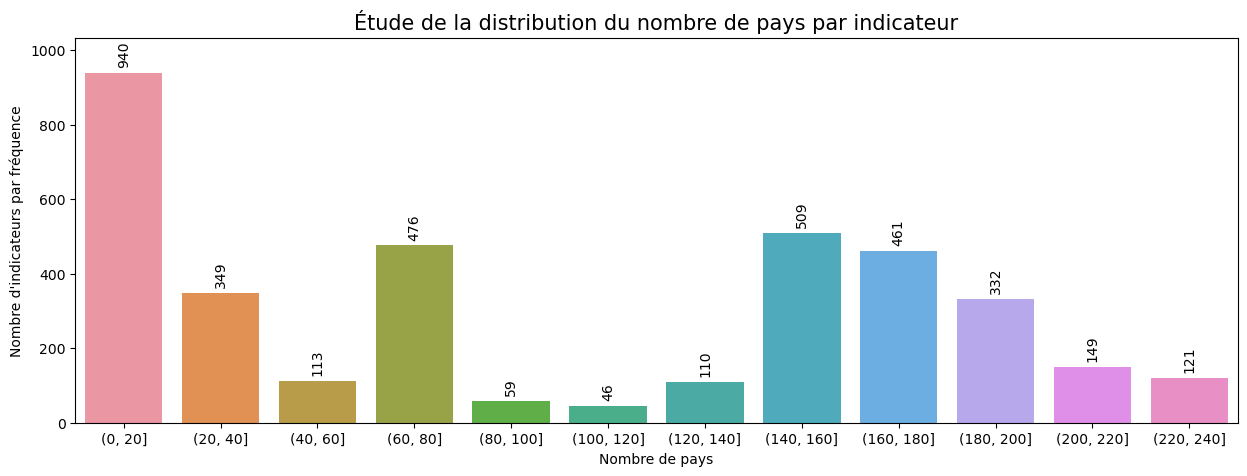

In [66]:
# Analyse de la distribution du nombre de pays par indicateur.

nombre_indicateur_frequence = freq_indicateur.groupby('Indicator Code').count().reset_index()
nombre_indicateur_frequence['frequence_cat'] = pd.cut(nombre_indicateur_frequence['Indicator Code'], bins=[x for x in range(0, 250, 20)])
nombre_indicateur_frequence = nombre_indicateur_frequence.groupby('frequence_cat').sum()

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=nombre_indicateur_frequence.index, y='index', data=nombre_indicateur_frequence)
plt.xlabel('Nombre de pays')
plt.ylabel("Nombre d'indicateurs par fréquence")
plt.title("Étude de la distribution du nombre de pays par indicateur", size=15)
ax.bar_label(ax.containers[0], padding=4, rotation=90)
ax.margins(y=0.1)
plt.show()

- **Il n'y a 121 indicateurs avec plus de 220 pays.**

In [67]:
# Les codes associés à une périodicité annuelle dans le dataframe "Stats Series" sont-ils inclus 
  # parmi les indicateurs impliquant plus de 200 pays ?

codes_series = list(df_series_selection['Series Code'])    # voir partie III-3 pour "df_series_selection"
codes_data = list(freq_indicateur.loc[freq_indicateur['Indicator Code'] >= 200, 'index'])
indicateurs = [code for code in codes_series if code not in codes_data]
print(indicateurs)

['SH.DYN.AIDS.ZS', 'SL.TLF.ADVN.FE.ZS', 'SL.TLF.ADVN.MA.ZS', 'SL.TLF.ADVN.ZS', 'SL.TLF.BASC.FE.ZS', 'SL.TLF.BASC.MA.ZS', 'SL.TLF.BASC.ZS', 'SL.TLF.INTM.FE.ZS', 'SL.TLF.INTM.MA.ZS', 'SL.TLF.INTM.ZS', 'SL.UEM.NEET.FE.ZS', 'SL.UEM.NEET.MA.ZS', 'SL.UEM.NEET.ZS', 'SP.POP.AG00.TO.UN', 'SP.POP.AG01.TO.UN', 'SP.POP.AG02.TO.UN', 'SP.POP.AG03.TO.UN', 'SP.POP.AG04.TO.UN', 'SP.POP.AG05.TO.UN', 'SP.POP.AG06.TO.UN', 'SP.POP.AG07.TO.UN', 'SP.POP.AG08.TO.UN', 'SP.POP.AG09.TO.UN', 'SP.POP.AG10.TO.UN', 'SP.POP.AG11.TO.UN', 'SP.POP.AG12.TO.UN', 'SP.POP.AG13.TO.UN', 'SP.POP.AG14.TO.UN', 'SP.POP.AG15.TO.UN', 'SP.POP.AG16.TO.UN', 'SP.POP.AG17.TO.UN', 'SP.POP.AG18.TO.UN', 'SP.POP.AG19.TO.UN', 'SP.POP.AG20.TO.UN', 'SP.POP.AG21.TO.UN', 'SP.POP.AG22.TO.UN', 'SP.POP.AG23.TO.UN', 'SP.POP.AG24.TO.UN', 'SP.POP.AG25.TO.UN']


In [68]:
# Afficher le nombre de valeurs dans la variable indicateurs
nombre_de_valeurs = len(indicateurs)
print("Le nombre de valeurs dans 'indicateurs' est :", nombre_de_valeurs)

Le nombre de valeurs dans 'indicateurs' est : 39


- **Certains indicateurs annuels ne figurent pas parmi ceux concernant plus de 200 pays.**

In [69]:
# Filtrer les données pour les indicateurs spécifiés dans CodesSeries
indicateurs_selectionnes = df_Data[df_Data['Indicator Code'].isin(codes_series)][['Indicator Name', 'Country Code']]

# Fusionner les données avec les informations sur les pays  ("df_Country_restreint" voir III-2)
indicateur_annuel = pd.merge(indicateurs_selectionnes, df_Country_restreint)[['Indicator Name', 'Country Code', 'Income Group']]

# Créer une table pivot basée sur les groupes de revenus des pays
indicateur_annuel = indicateur_annuel.pivot_table(index='Indicator Name', columns='Income Group', aggfunc='count')

# Ajouter une colonne pour le total des indicateurs par groupe de revenu
indicateur_annuel['Total'] = indicateur_annuel.sum(axis=1)

# Trier la table en fonction du total des indicateurs par ordre décroissant
indicateur_annuel = indicateur_annuel.sort_values('Total', ascending=False)

# Normaliser les valeurs en pourcentage par rapport au nombre total de pays dans chaque groupe de revenu
for value in list(df_Country_restreint['Income Group'].unique()):
    Taille = len(df_Country_restreint[df_Country_restreint['Income Group'] == value])
    indicateur_annuel[('Country Code', value)] = round(indicateur_annuel[('Country Code', value)] / Taille * 100)

# Normaliser le total en pourcentage par rapport au nombre total de pays
indicateur_annuel['Total'] = round(indicateur_annuel['Total'] / len(df_Country_restreint) * 100)

# Calculer la moyenne des pourcentages pour chaque groupe de revenu
Total_Income = round(indicateur_annuel.mean()).to_frame().T

# Renommer l'index pour le total des revenus
Total_Income.rename(index={0: 'Total_Income'}, inplace=True)

# Concaténer la table principale avec le total des revenus
resultat_final_2 = pd.concat([indicateur_annuel, Total_Income])

# Afficher le résultat final
resultat_final_2

Country Code  \
Income Group                                                                                    High income: OECD   
Population, total                                                                                           100.0   
Population growth (annual %)                                                                                100.0   
GDP per capita (current US$)                                                                                100.0   
GDP at market prices (current US$)                                                                          100.0   
Internet users (per 100 people)                                                                             100.0   
GNI (current US$)                                                                                           100.0   
GDP at market prices (constant 2005 US$)                                                                    100.0   
GDP per capita (constant 2005 US$)                                                                          100.0   
GNI per capita, Atlas method (current US$)                                                                  100.0   
Population, ages 0-14 (% of total)                                                                          100.0   
Population, ages 0-14, total                                                                                100.0   
Population, ages 15-64 (% of total)                                                                         100.0   
Population, ages 15-64, total                                                                               100.0   
Population, age 22, total                                                                                   100.0   
Population, age 16, total                                                                                   100.0   
Population, age 17, total                                                                                   100.0   
Population, age 18, total                                                                                   100.0   
Population, age 19, total                                                                                   100.0   
Population, age 2, total                                                                                    100.0   
Population, age 20, total                                                                                   100.0   
Population, age 21, total                                                                                   100.0   
Population, age 5, total                                                                                    100.0   
Population, age 23, total                                                                                   100.0   
Population, age 24, total                                                                                   100.0   
Population, age 25, total                                                                                   100.0   
Population, age 3, total                                                                                    100.0   
Population, age 4, total                                                                                    100.0   
Population, age 6, total                                                                                    100.0   
Population, age 7, total                                                                                    100.0   
Population, age 8, total                                                                                    100.0   
Population, age 9, total                                                                                    100.0   
Population, age 15, total                                                                                   100.0   
Population, age 14, total                                                                                   100.0   
Popula

- **Les deux indicateurs qui couvrent le plus grand nombre de pays sont la population totale et l'évolution de cette population.**

- **Un grand nombre d'indicateurs concerne plus de 180 pays.**

- **Les pays de la zone riche de l'OCDE sont ceux qui disposent de données les plus complètes, tandis que la zone riche non-OCDE est la moins bien renseignée.**

- **Si l'analyse se limite aux pays membres de l'OCDE, il est possible d'étudier tous les indicateurs disponibles. Dans le cas contraire, il est nécessaire de conserver les indicateurs qui concernent plus de 180 pays.**

In [70]:
# Recensement des indicateurs couvrant plus de 180 pays
# Filtrer les indicateurs couvrant plus de 180 pays.    # df_Country_restreint (voir III-2)

indicateurs_selectionnes_ = df_Data[df_Data['Indicator Code'].isin(codes_series)][['Indicator Name', 'Country Code']]
indicateurs_restants = pd.merge(indicateurs_selectionnes_, df_Country_restreint)[['Indicator Name', 'Country Code', 'Income Group']]
indicateurs_restants = indicateurs_restants.groupby('Indicator Name').count()['Country Code'].to_frame()
indicateurs_au_dessus_de_180 = list(indicateurs_restants[indicateurs_restants['Country Code'] >= 180].index)

In [71]:
indicateurs_au_dessus_de_180

['GDP at market prices (constant 2005 US$)',
 'GDP at market prices (current US$)',
 'GDP per capita (constant 2005 US$)',
 'GDP per capita (current US$)',
 'GDP per capita, PPP (constant 2011 international $)',
 'GDP per capita, PPP (current international $)',
 'GDP, PPP (constant 2011 international $)',
 'GDP, PPP (current international $)',
 'GNI (current US$)',
 'GNI per capita, Atlas method (current US$)',
 'GNI per capita, PPP (current international $)',
 'GNI, PPP (current international $)',
 'Internet users (per 100 people)',
 'Labor force, total',
 'Mortality rate, under-5 (per 1,000)',
 'Personal computers (per 100 people)',
 'Population growth (annual %)',
 'Population, age 0, total',
 'Population, age 1, total',
 'Population, age 10, total',
 'Population, age 11, total',
 'Population, age 12, total',
 'Population, age 13, total',
 'Population, age 14, total',
 'Population, age 15, total',
 'Population, age 16, total',
 'Population, age 17, total',
 'Population, age 18, tota

In [72]:
# Sélection manuelle des indicateurs pertinents pour l'entreprise parmi les indicateurs restants

indicateurs_au_dessus_de_180 = ['GDP at market prices (current US$)',
                                'GDP per capita (current US$)',
                                'Internet users (per 100 people)',
                                'Labor force, total',
                                'Personal computers (per 100 people)',
                                'Population growth (annual %)',
                               'Population, age 12, total',
                                'Population, age 13, total',
                                'Population, age 14, total',
                                'Population, age 15, total',
                                'Population, age 16, total',
                                'Population, age 17, total',
                                'Population, age 18, total',
                                'Population, age 19, total',
                                'Population, age 2, total',
                                'Population, age 20, total',
                                'Population, age 21, total',
                                'Population, age 22, total',
                                'Population, age 23, total',
                                'Population, age 24, total',
                                'Population, age 25, total',
                                'Population, ages 0-14, total',
                                'Population, ages 15-64, total',
                                'Population, total',
                                'Unemployment, total (% of total labor force)']

- **Bien que ces indicateurs soient informatifs, ils ne fournissent pas le pourcentage réel de personnes effectivement scolarisées.**

- **Pour obtenir une vision plus complète, il est nécessaire d'ajouter quelques autres indicateurs qui ne sont pas mesurés annuellement.**

In [73]:
import re

In [74]:
# Exploration de nouveaux indicateurs dans la DataFrame df_StatsSeries (voir III-3).

filtre_regex = re.compile('male|female|Male|Female', flags=re.IGNORECASE)
Autres_Indicateurs = df_StatsSeries[~df_StatsSeries[['Indicator Name', 'Long definition']].apply(lambda x: x.str.contains(filtre_regex)).any(axis=1)]

# "re.compile" pour créer une expression régulière qui recherche 
# les occurrences de 'male' ou 'female' (insensible à la casse)
# la fonction "apply" est utilisée avec "lambda" pour appliquer la recherche à chaque colonne
# "any(axis=1)" est utilisé pour filtrer les lignes qui ont des correspondances dans l'une des deux colonnes

In [75]:
# Afficher la taille

len(Autres_Indicateurs)

2099

- **Nous disposons de 2099 indicateurs après avoir exclu ceux spécifiques aux hommes ou aux femmes.**

In [76]:
# Sélection des indicateurs parmi les 600 qui couvrent plus de 180 pays 

indicateurs_180_pays = list(freq_indicateur[freq_indicateur['Indicator Code'] >= 180]['index'])
autres_indicateurs_selectionnes = Autres_Indicateurs[Autres_Indicateurs['Series Code'].isin(indicateurs_180_pays)]
nombre_indicateurs_selectionnes = len(autres_indicateurs_selectionnes)

In [77]:
nombre_indicateurs_selectionnes

227

- **Nous disposons de 227 indicateurs après avoir exclu ceux spécifiques aux hommes ou aux femmes.**

In [78]:
indicateurs_name = [
    'Enrolment in lower secondary education, both sexes (number)',
    'Enrolment in upper secondary education, both sexes (number)',
    'Enrolment in tertiary education, all programmes, both sexes (number)'
]

- **Ces trois indicateurs peuvent fournir des informations sur le nombre d'enfants qui ne fréquentent pas l'école.**

In [79]:
# Indicateurs conservés

Indicateurs = indicateurs_au_dessus_de_180 + indicateurs_name
#Indicateurs

In [80]:
# Informations générales sur les DataFrames

dataframes = [df_Data, df_Country, df_CountrySeries, df_StatsFootNote, df_StatsSeries]
noms_dataframes = ['df_Data', 'df_Country', 'df_CountrySeries', 'df_StatsFootNote', 'df_StatsSeries']
infos_generales = []

for df, nom_df in zip(dataframes, noms_dataframes):
    info = {}
    info['Nom_Fichier'] = nom_df
    info['Nbre_Lignes'] = df.shape[0]
    info['Nbre_Colonnes'] = df.shape[1]
    info['Nbre_Duplicatas'] = df.duplicated().sum()
    info['Nbre_NaNs'] = df.isna().sum().sum()
    info['Nbre_NonNaNs'] = df.notna().sum().sum()
    info['Pourcentage_NaNs'] = round(df.isna().sum().sum() * 100 / (df.shape[0] * df.shape[1]))
    
    try:
        info['Nbre_Pays/Zones'] = df['Country Code'].nunique()
    except KeyError:
        try:
            info['Nbre_Pays/Zones'] = df['CountryCode'].nunique()
        except KeyError:
            info['Nbre_Pays/Zones'] = 0
    
    try:
        info['Nbre_Indicateurs'] = df['Indicator Code'].nunique()
    except KeyError:
        try:
            info['Nbre_Indicateurs'] = df['SeriesCode'].nunique()
        except KeyError:
            try:
                info['Nbre_Indicateurs'] = df['Series Code'].nunique()
            except KeyError:
                info['Nbre_Indicateurs'] = 0
    
    infos_generales.append(info)

df_infos_generales = pd.DataFrame(infos_generales)
df_infos_generales.set_index('Nom_Fichier')

Nbre_Lignes  Nbre_Colonnes  Nbre_Duplicatas  Nbre_NaNs  \
Nom_Fichier                                                                
df_Data                357405             69                0   18149124   
df_Country                241             32                0       2354   
df_CountrySeries          613              3                0          0   
df_StatsFootNote       643638              4                0          0   
df_StatsSeries           3665             21                0      55203   

                  Nbre_NonNaNs  Pourcentage_NaNs  Nbre_Pays/Zones  \
Nom_Fichier                                                         
df_Data                6511821                74              242   
df_Country                5358                31              241   
df_CountrySeries          1839                 0              211   
df_StatsFootNote       2574552                 0              239   
df_StatsSeries           21762                72                0   

                  Nbre_Indicateurs  
Nom_Fichier                         
df_Data                       3665  
df_Country                       0  
df_CountrySeries                21  
df_StatsFootNote              1558  
df_StatsSeries                3665

## IV- Étape d'analyse des données.

### 1- Combinaison des trois principales DataFrames pour créer une seule DataFrame (df_Data, df_Country, df_StatsSeries) .

In [81]:
# Filtrer les années indésirables avant 2000 (car trop vieux) et après 2020 (car ce sont des extrapolations)
Data = df_Data.loc[:, :'2020']                                     # df_Data (DataFrame prinvipal)
print("Forme des données après l'année de filtrage:", Data.shape)

# Fusionner avec la DataFrame restreinte des pays (df_Country_restreint voir III-2)
DataFinal = Data.merge(df_Country_restreint, how='inner')
print("Forme de DataFinal après la fusion avec le DataFrame des pays restreints:", DataFinal.shape)

# Fusionner avec la DataFrame des indicateurs (df_StatsSeries)
StatsSeries = df_StatsSeries[['Series Code', 'Long definition', 'Topic']]
DataFinal = DataFinal.merge(StatsSeries, how='right', left_on='Indicator Code', right_on='Series Code')
print("Forme de DataFinal après la fusion avec la DataFrame df_StatsSeries:", DataFinal.shape)

# Réorganiser les colonnes pour plus de clarté
DataFinal = DataFinal[['Country Name', 'Country Code', 'Region', 'Income Group', 'Indicator Name', 'Indicator Code',
                       'Long definition', 'Topic', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
                       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020']]

# Filtrer les lignes sur les indicateurs d'intérêt
DataFinal = DataFinal[DataFinal['Indicator Name'].isin(Indicateurs)]

# Afficher les premières lignes de la DataFrame finale
DataFinal.head(2)

Forme des données après l'année de filtrage: (357405, 53)
Forme de DataFinal après la fusion avec le DataFrame des pays restreints: (347348, 56)
Forme de DataFinal après la fusion avec la DataFrame df_StatsSeries: (338583, 59)


Country Name Country Code                 Region         Income Group  \
63838  Afghanistan          AFG             South Asia           Low income   
63839      Albania          ALB  Europe & Central Asia  Upper middle income   

                            Indicator Name  Indicator Code  \
63838  Personal computers (per 100 people)  IT.CMP.PCMP.P2   
63839  Personal computers (per 100 people)  IT.CMP.PCMP.P2   

                                                                                   Long definition  \
63838  Personal computers are self-contained computers designed to be used by a single individual.   
63839  Personal computers are self-contained computers designed to be used by a single individual.   

                                Topic      2000      2001  ...  2009  2010  \
63838  Infrastructure: Communications       NaN       NaN  ...   NaN   NaN   
63839  Infrastructure: Communications  0.756442  0.912941  ...   NaN   NaN   

       2011  2012  2013  2014  2015  2016  2017  2020  
63838   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
63839   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[2 rows x 27 columns]

### 2- Analyse générale de notre DataFrame DataFinal

In [82]:
# Calcul du taux de remplissage (filling_rate) pour chaque colonne de la DataFrame
filling_rate = round(DataFinal.notna().sum(axis=0) / len(DataFinal) * 100)
print(filling_rate)

# Suppression des colonnes entièrement vides (2017 et 2020)
DataFinal = DataFinal.dropna(axis=1, how='all')

Country Name       100.0
Country Code       100.0
Region             100.0
Income Group       100.0
Indicator Name     100.0
Indicator Code     100.0
Long definition    100.0
Topic              100.0
2000                95.0
2001                96.0
2002                97.0
2003                96.0
2004                96.0
2005                96.0
2006                94.0
2007                91.0
2008                91.0
2009                90.0
2010                90.0
2011                91.0
2012                90.0
2013                90.0
2014                39.0
2015                84.0
2016                32.0
2017                 0.0
2020                 0.0
dtype: float64


- ***Même avec une DataFrame restreinte en termes d'indicateurs mais non en termes de pays, on observe que les colonnes pour les années 2014, 2016, 2017 et 2020 sont majoritairement vides.**

- **Parmi les années les plus récentes disponibles, celle qui présente le taux de remplissage le plus élevé est 2015.**

In [83]:
# Étude des revenus:
# Calcul du pourcentage de valeurs manquantes pour chaque colonne numérique, regroupées par groupe de revenu
income_analysis = round((DataFinal.set_index('Income Group')
                        .select_dtypes(exclude='object')
                        .isna()
                        .reset_index()
                        .groupby('Income Group')
                        .sum() / 
                        (DataFinal.set_index('Income Group')
                        .select_dtypes(exclude='object')
                        .isna()
                        .reset_index()
                        .groupby('Income Group')
                        .count()) * 100))

# Ajout d'une colonne TotalIncome représentant la moyenne des pourcentages de valeurs manquantes pour chaque groupe de revenu
income_analysis['TotalIncome'] = round(income_analysis.sum(axis=1) / income_analysis.shape[1])

# Calcul du pourcentage moyen de valeurs manquantes pour toutes les années
total = round((income_analysis.sum() / income_analysis.shape[0])).to_frame().rename(columns={0: "TotalAnnée"}).T

# Concaténation des résultats pour afficher l'analyse des revenus
income_analysis_result = pd.concat([income_analysis, total])
income_analysis_result

2000  2001  2002  2003  2004  2005  2006  2007  2008  \
High income: OECD      0.0   1.0   1.0   1.0   1.0   1.0   1.0   3.0   4.0   
High income: nonOECD  10.0   9.0   6.0   6.0   8.0   7.0  12.0  18.0  18.0   
Low income             5.0   4.0   5.0   5.0   4.0   4.0   6.0   7.0   7.0   
Lower middle income    4.0   3.0   3.0   3.0   3.0   3.0   5.0   7.0   7.0   
Upper middle income    5.0   4.0   3.0   4.0   3.0   4.0   7.0   9.0  10.0   
TotalAnnée             5.0   4.0   4.0   4.0   4.0   4.0   6.0   9.0   9.0   

                      2009  2010  2011  2012  2013  2014  2015  2016  \
High income: OECD      4.0   4.0   4.0   4.0   4.0  60.0  12.0  68.0   
High income: nonOECD  18.0  19.0  19.0  19.0  20.0  59.0  26.0  68.0   
Low income             7.0   8.0   6.0   8.0   9.0  63.0  14.0  68.0   
Lower middle income    7.0   7.0   7.0   7.0   8.0  62.0  13.0  68.0   
Upper middle income   11.0  11.0  11.0  11.0  11.0  61.0  17.0  68.0   
TotalAnnée             9.0  10.0   9.0  10.0  10.0  61.0  16.0  68.0   

                      TotalIncome  
High income: OECD            10.0  
High income: nonOECD         20.0  
Low income                   14.0  
Lower middle income          13.0  
Upper middle income          15.0  
TotalAnnée                   14.0

- **La faible complétude ou remplissage des données se confirme pour les années 2014 (61%) et 2016 (68%).**
- **Les revenus (Income) les moins complets correspondent à la catégorie des Hauts Revenus Non OCDE (High income: nonOECD) soit 20% en moyenne.**

In [84]:
# Analyse du taux de remplissage des indicateurs (indicator_fill_rate) en fonction des revenus (Income) :
indicator_fill_rate = round((DataFinal.set_index(['Income Group', 'Indicator Name'])
                            .select_dtypes(exclude='object')
                            .isna()
                            .reset_index()
                            .groupby(['Income Group', 'Indicator Name'])
                            .sum() / 
                            DataFinal.set_index(['Income Group', 'Indicator Name'])
                            .select_dtypes(exclude='object')
                            .isna()
                            .reset_index()
                            .groupby(['Income Group', 'Indicator Name'])
                            .count()) * 100)

indicator_fill_rate 

2000  \
Income Group         Indicator Name                                                               
High income: OECD    Enrolment in lower secondary education, both sexes (number)            0.0   
                     Enrolment in tertiary education, all programmes, both sexes (number)   3.0   
                     Enrolment in upper secondary education, both sexes (number)            0.0   
                     GDP at market prices (current US$)                                     0.0   
                     GDP per capita (current US$)                                           0.0   
                     Internet users (per 100 people)                                        0.0   
                     Labor force, total                                                     0.0   
                     Personal computers (per 100 people)                                    0.0   
                     Population growth (annual %)                                           0.0   
                     Population, age 12, total                                              0.0   
                     Population, age 13, total                                              0.0   
                     Population, age 14, total                                              0.0   
                     Population, age 15, total                                              0.0   
                     Population, age 16, total                                              0.0   
                     Population, age 17, total                                              0.0   
                     Population, age 18, total                                              0.0   
                     Population, age 19, total                                              0.0   
                     Population, age 2, total                                               0.0   
                     Population, age 20, total                                              0.0   
                     Population, age 21, total                                              0.0   
                     Population, age 22, total                                              0.0   
                     Population, age 23, total                                              0.0   
                     Population, age 24, total                                              0.0   
                     Population, age 25, total                                              0.0   
                     Population, ages 0-14, total                                           0.0   
                     Population, ages 15-64, total                                          0.0   
                     Population, total                                                      0.0   
                     Unemployment, total (% of total labor force)                           0.0   
High income: nonOECD Enrolment in lower secondary education, both sexes (number)           26.0   
                     Enrolment in tertiary education, all programmes, both sexes (number)  57.0   
                     Enrolment in upper secondary education, both sexes (number)           35.0   
                     GDP at market prices (current US$)                                    10.0   
                     GDP per capita (current US$)                                          10.0   
                     Internet users (per 100 people)                                        8.0   
                     Labor force, total                                                     0.0   
                     Personal computers (per 100 people)                                   25.0   
                     Population growth (annual %)                                           0.0   
                     Population, age 12, total                                              7.0   
                     Population, age 13, total                                              7.0   
                     Population,

- **L'indicateur "Personal computers (per 100 people)" présente une quasi-vacuité à partir de 2006, et ce, pour toutes les catégories de revenus.**

- **Étant donné que l'année 2006 est relativement ancienne, il serait plus judicieux d'utiliser le nombre d'utilisateurs d'Internet comme indicateur, d'autant plus qu'il tient compte de la possibilité d'étudier en ligne, notamment à travers l'existence des cybercafés.**

In [85]:
# Exclusion de l'indicateur "Personal computers (per 100 people)" de la DataFrame DataFinal
DataFinal = DataFinal[DataFinal['Indicator Name'] != 'Personal computers (per 100 people)']

In [86]:
# Analyse des zones :
# Calcul du pourcentage de valeurs manquantes pour chaque colonne numérique, regroupées par région
region_analysis = round((DataFinal.set_index('Region')
                        .select_dtypes(exclude='object')
                        .isna()
                        .reset_index()
                        .groupby('Region')
                        .sum() / 
                        (DataFinal.set_index('Region')
                        .select_dtypes(exclude='object')
                        .isna()
                        .reset_index()
                        .groupby('Region')
                        .count()) * 100))

# Ajout d'une colonne TotalRegion représentant la moyenne des pourcentages de valeurs manquantes pour chaque région
region_analysis['TotalRegion'] = round(region_analysis.sum(axis=1) / region_analysis.shape[1])

# Calcul du pourcentage moyen de valeurs manquantes pour toutes les régions
total = round((region_analysis.sum() / region_analysis.shape[0])).to_frame().rename(columns={0: "TotalAnnée"}).T

# Concaténation des résultats pour afficher l'analyse des zones
region_analysis_result = pd.concat([region_analysis, total])
region_analysis_result

2000  2001  2002  2003  2004  2005  2006  2007  \
East Asia & Pacific          5.0   5.0   4.0   5.0   5.0   5.0   5.0  10.0   
Europe & Central Asia        3.0   3.0   2.0   1.0   2.0   2.0   2.0   3.0   
Latin America & Caribbean    6.0   5.0   4.0   6.0   4.0   4.0   9.0  10.0   
Middle East & North Africa   3.0   3.0   2.0   1.0   2.0   1.0   2.0   2.0   
North America                4.0   5.0   5.0   5.0   4.0   3.0  21.0  23.0   
South Asia                   7.0   4.0   5.0   2.0   3.0   2.0   2.0   2.0   
Sub-Saharan Africa           5.0   4.0   4.0   5.0   4.0   4.0   6.0   6.0   
TotalAnnée                   5.0   4.0   4.0   4.0   3.0   3.0   7.0   8.0   

                            2008  2009  2010  2011  2012  2013  2014  2015  \
East Asia & Pacific         10.0   9.0  11.0  11.0  11.0  11.0  59.0  16.0   
Europe & Central Asia        3.0   3.0   3.0   3.0   3.0   4.0  56.0  11.0   
Latin America & Caribbean   10.0  10.0  10.0  11.0  11.0  11.0  61.0  18.0   
Middle East & North Africa   3.0   3.0   3.0   2.0   4.0   3.0  60.0   9.0   
North America               23.0  23.0  21.0  21.0  21.0  21.0  65.0  31.0   
South Asia                   2.0   2.0   2.0   1.0   2.0   2.0  59.0   8.0   
Sub-Saharan Africa           6.0   6.0   6.0   5.0   5.0   6.0  62.0  12.0   
TotalAnnée                   8.0   8.0   8.0   8.0   8.0   8.0  60.0  15.0   

                            2016  TotalRegion  
East Asia & Pacific         66.0         15.0  
Europe & Central Asia       65.0         10.0  
Latin America & Caribbean   68.0         15.0  
Middle East & North Africa  68.0         10.0  
North America               73.0         22.0  
South Asia                  67.0         10.0  
Sub-Saharan Africa          67.0         13.0  
TotalAnnée                  68.0         14.0

- **L'Amérique du Nord, classée en tant que Haut Revenu: OCDE (High Income: OECD), est la région présentant le moins d'informations soit 22% en moyenne, avec les années 2014 et 2016 affichant toujour les taux de remplissage les plus bas.**

In [87]:
# Analyse des zones :
# Calcul du pourcentage de valeurs manquantes pour chaque colonne numérique, regroupées par région
Country_analysis = round((DataFinal.set_index(['Income Group', 'Country Name', 'Region'])       #(['Income Group', 'Indicator Name'])
                        .select_dtypes(exclude='object')
                        .isna()
                        .reset_index()
                        .groupby(['Income Group', 'Country Name', 'Region'])
                        .sum() / 
                        (DataFinal.set_index(['Income Group', 'Country Name', 'Region'])
                        .select_dtypes(exclude='object')
                        .isna()
                        .reset_index()
                        .groupby(['Income Group', 'Country Name', 'Region'])
                        .count()) * 100))

# Ajout d'une colonne TotalRegion représentant la moyenne des pourcentages de valeurs manquantes pour chaque région
Country_analysis['TotalCountryName'] = round(Country_analysis.sum(axis=1) / Country_analysis.shape[1])

# Calcul du pourcentage moyen de valeurs manquantes pour toutes les régions
total = round((Country_analysis.sum() / Country_analysis.shape[0])).to_frame().rename(columns={0: "TotalAnnée"}).T

# Concaténation des résultats pour afficher l'analyse des zones
Country_analysis_result = pd.concat([Country_analysis, total])
Country_analysis_result

2000  \
(High income: OECD, Australia, East Asia & Pacific)                                0.0   
(High income: OECD, Austria, Europe & Central Asia)                                0.0   
(High income: OECD, Belgium, Europe & Central Asia)                                0.0   
(High income: OECD, Canada, North America)                                         0.0   
(High income: OECD, Chile, Latin America & Caribbean)                              0.0   
(High income: OECD, Czech Republic, Europe & Central Asia)                         0.0   
(High income: OECD, Denmark, Europe & Central Asia)                                0.0   
(High income: OECD, Estonia, Europe & Central Asia)                                0.0   
(High income: OECD, Finland, Europe & Central Asia)                                0.0   
(High income: OECD, France, Europe & Central Asia)                                 0.0   
(High income: OECD, Germany, Europe & Central Asia)                                4.0   
(High income: OECD, Greece, Europe & Central Asia)                                 0.0   
(High income: OECD, Iceland, Europe & Central Asia)                                0.0   
(High income: OECD, Ireland, Europe & Central Asia)                                0.0   
(High income: OECD, Israel, Middle East & North Africa)                            0.0   
(High income: OECD, Italy, Europe & Central Asia)                                  0.0   
(High income: OECD, Japan, East Asia & Pacific)                                    0.0   
(High income: OECD, Korea, Rep., East Asia & Pacific)                              0.0   
(High income: OECD, Luxembourg, Europe & Central Asia)                             0.0   
(High income: OECD, Netherlands, Europe & Central Asia)                            0.0   
(High income: OECD, New Zealand, East Asia & Pacific)                              0.0   
(High income: OECD, Norway, Europe & Central Asia)                                 0.0   
(High income: OECD, Poland, Europe & Central Asia)                                 0.0   
(High income: OECD, Portugal, Europe & Central Asia)                               0.0   
(High income: OECD, Slovak Republic, Europe & Central Asia)                        0.0   
(High income: OECD, Slovenia, Europe & Central Asia)                               0.0   
(High income: OECD, Spain, Europe & Central Asia)                                  0.0   
(High income: OECD, Sweden, Europe & Central Asia)                                 0.0   
(High income: OECD, Switzerland, Europe & Central Asia)                            0.0   
(High income: OECD, United Kingdom, Europe & Central Asia)                         0.0   
(High income: OECD, United States, North America)                                  0.0   
(High income: nonOECD, Andorra, Europe & Central Asia)                            13.0   
(High income: nonOECD, Antigua and Barbuda, Latin America & Caribbean)            64.0   
(High income: nonOECD, Aruba, Latin America & Caribbean)                           0.0   
(High income: nonOECD, Bahamas, The, Latin America & Caribbean)                   11.0   
(High income: nonOECD, Bahrain, Middle East & North Africa)                        4.0   
(High income: nonOECD, Barbados, Latin America & Caribbean)                        0.0   
(High income: nonOECD, Bermuda, North America)                                    13.0   
(High income: nonOECD, Brunei Darussalam, East Asia & Pacific)                     0.0   
(High income: nonOECD, Cayman Islands, Latin America & Caribbean)                 13.0   
(High income: nonOECD, Channel Islands, Europe & Central Asia)                     0.0   
(High income: nonOECD, Croatia, Europe & Central Asia)                             0.0   
(High income: nonOECD, Curacao, Latin America & Caribbean)                        43.0   
(High income: nonOECD, Cyprus, Europe & Central Asia)                              0.0   
(High income: nonOECD, Equatoria

- **Nous pouvons voir à la quatrième ligne "North America" qui est classée en tant que Haut Revenu: OCDE (High Income: OECD)**

In [88]:
# Remplissage des colonnes vers la droite pour récupérer des pays supplémentaires pour l'analyse.
# Récupération des valeurs sur trois ans en utilisant la méthode de remplissage avant.

colonnes_a_remplir = DataFinal.columns[8:]
DataFinal[colonnes_a_remplir] = DataFinal[colonnes_a_remplir].fillna(method="ffill", axis=1, limit=3)
#DataFinal
       # On utilise une variable "colonnes_a_remplir" pour stocker les colonnes à partir de la 9ème colonne.

In [89]:
colonnes_a_remplir

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [90]:
DataFinal.reset_index(drop=True, inplace=True)

In [91]:
DataFinal

Country Name Country Code                      Region  \
0            Afghanistan          AFG                  South Asia   
1                Albania          ALB       Europe & Central Asia   
2                Algeria          DZA  Middle East & North Africa   
3         American Samoa          ASM         East Asia & Pacific   
4                Andorra          AND       Europe & Central Asia   
...                  ...          ...                         ...   
5289             Vanuatu          VUT         East Asia & Pacific   
5290       Venezuela, RB          VEN   Latin America & Caribbean   
5291  West Bank and Gaza          PSE  Middle East & North Africa   
5292         Yemen, Rep.          YEM  Middle East & North Africa   
5293            Zimbabwe          ZWE          Sub-Saharan Africa   

              Income Group  \
0               Low income   
1      Upper middle income   
2      Upper middle income   
3      Upper middle income   
4     High income: nonOECD   
...                    ...   
5289   Lower middle income   
5290   Upper middle income   
5291   Lower middle income   
5292   Lower middle income   
5293            Low income   

                                                   Indicator Name  \
0                                 Internet users (per 100 people)   
1                                 Internet users (per 100 people)   
2                                 Internet users (per 100 people)   
3                                 Internet users (per 100 people)   
4                                 Internet users (per 100 people)   
...                                                           ...   
5289  Enrolment in upper secondary education, both sexes (number)   
5290  Enrolment in upper secondary education, both sexes (number)   
5291  Enrolment in upper secondary education, both sexes (number)   
5292  Enrolment in upper secondary education, both sexes (number)   
5293  Enrolment in upper secondary education, both sexes (number)   

      Indicator Code  \
0     IT.NET.USER.P2   
1     IT.NET.USER.P2   
2     IT.NET.USER.P2   
3     IT.NET.USER.P2   
4     IT.NET.USER.P2   
...              ...   
5289         UIS.E.3   
5290         UIS.E.3   
5291         UIS.E.3   
5292         UIS.E.3   
5293         UIS.E.3   

                                                                                                                                            Long definition  \
0     Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobil...   
1     Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobil...   
2     Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobil...   
3     Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobil...   
4     Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobil...   
...                                                                                                                                                     ...   
5289                                      Total number of students enrolled in public and private upper secondary education institutions regardless of age.   
5290                                      Total number of students enrolled in public and private upper secondary education institutions regardless of age.   
5291                                      Total number of students enrolled in public and private upper secondary education institutions regardless of age.   
5292                                      Total number of students enrolled in public and private upper secondary 

In [92]:
DataFinal['Indicator Name'].unique()

array(['Internet users (per 100 people)',
       'GDP at market prices (current US$)',
       'GDP per capita (current US$)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Labor force, total',
       'Unemployment, total (% of total labor force)',
       'Population, ages 0-14, total', 'Population, ages 15-64, total',
       'Population, age 2, total', 'Population, age 12, total',
       'Population, age 13, total', 'Population, age 14, total',
       'Population, age 15, total', 'Population, age 16, total',
       'Population, age 17, total', 'Population, age 18, total',
       'Population, age 19, total', 'Population, age 20, total',
       'Population, age 21, total', 'Population, age 22, total',
       'Population, age 23, total', 'Population, age 24, total',
       'Population, age 25, total', 'Population growth (annual %)',
       'Population, total',
       'Enrolment in lower secondary education, both sexes (number)',
       'Enrolment i

In [93]:
EtudePopTot = DataFinal[DataFinal['Indicator Name'] == 'Population, total'].set_index('Country Name').select_dtypes(exclude= 'object')
EtudePopTot
#EtudePopTot = EtudePopTot.sort_values('2011', ascending = False)

2000          2001          2002  \
Country Name                                                               
Afghanistan                     2.009376e+07  2.096646e+07  2.197992e+07   
Albania                         3.089027e+06  3.060173e+06  3.051010e+06   
Algeria                         3.118366e+07  3.159215e+07  3.199505e+07   
American Samoa                  5.752100e+04  5.817500e+04  5.873100e+04   
Andorra                         6.539000e+04  6.734100e+04  7.004900e+04   
Angola                          1.644092e+07  1.698327e+07  1.757265e+07   
Antigua and Barbuda             8.358400e+04  8.505700e+04  8.626600e+04   
Argentina                       3.705745e+07  3.747151e+07  3.788937e+07   
Armenia                         3.069588e+06  3.050655e+06  3.033897e+06   
Aruba                           9.085300e+04  9.289800e+04  9.499200e+04   
Australia                       1.915300e+07  1.941300e+07  1.965140e+07   
Austria                         8.011566e+06  8.042293e+06  8.081957e+06   
Azerbaijan                      8.048600e+06  8.111200e+06  8.171950e+06   
Bahamas, The                    2.978900e+05  3.031350e+05  3.091570e+05   
Bahrain                         6.646140e+05  6.975490e+05  7.351480e+05   
Bangladesh                      1.315812e+08  1.341072e+08  1.366007e+08   
Barbados                        2.698470e+05  2.706850e+05  2.714780e+05   
Belarus                         9.979610e+06  9.928549e+06  9.865548e+06   
Belgium                         1.025125e+07  1.028657e+07  1.033278e+07   
Belize                          2.473150e+05  2.549840e+05  2.622060e+05   
Benin                           6.865951e+06  7.076733e+06  7.295394e+06   
Bermuda                         6.183300e+04  6.250400e+04  6.291200e+04   
Bhutan                          5.734160e+05  5.896000e+05  6.063990e+05   
Bolivia                         8.339512e+06  8.496375e+06  8.653345e+06   
Bosnia and Herzegovina          3.766706e+06  3.771284e+06  3.775807e+06   
Botswana                        1.728340e+06  1.754935e+06  1.779953e+06   
Brazil                          1.752876e+08  1.777507e+08  1.801510e+08   
Brunei Darussalam               3.332410e+05  3.401170e+05  3.468670e+05   
Bulgaria                        8.170172e+06  8.009142e+06  7.837161e+06   
Burkina Faso                    1.160794e+07  1.194459e+07  1.229310e+07   
Burundi                         6.400706e+06  6.555829e+06  6.741569e+06   
Cabo Verde                      4.350790e+05  4.437160e+05  4.521060e+05   
Cambodia                        1.215235e+07  1.240247e+07  1.263473e+07   
Cameroon                        1.527423e+07  1.567193e+07  1.608489e+07   
Canada                          3.076970e+07  3.108190e+07  3.136200e+07   
Cayman Islands                  4.168700e+04  4.331600e+04  4.473800e+04   
Central African Republic        3.754986e+06  3.832203e+06  3.907612e+06   
Chad                            8.342559e+06  8.663012e+06  9.001689e+06   
Channel Islands                 1.487250e+05  1.497930e+05  1.509010e+05   
Chile                           1.526275e+07  1.544497e+07  1.562364e+07   
China                           1.262645e+09  1.271850e+09  1.280400e+09   
Colombia                        4.040396e+07  4.098891e+07  4.157249e+07   
Comoros                         5.423570e+05  5.558880e+05  5.694790e+05   
Congo, Dem. Rep.                4.707639e+07  4.839434e+07  4.983576e+07   
Congo, Rep.                     3.225727e+06  3.315806e+06  3.407180e+06   
Costa Rica                      3.925443e+06  3.996798e+06  4.063204e+06   
Cote d'Ivoire                   1.668656e+07  1.704015e+07  1.736652e+07   
Croatia                         4.426000e+06  4.440000e+06  4.440000e+06   
Cuba                            1.115074e+07  1.118654e+07  1.121800e+07   
Curacao                         1.338600e+05  1.289050e+05  1.288040e+05   
Cyprus                          9.432860e+05  9.602820e+05  9.769660e+05   
Czech Republ

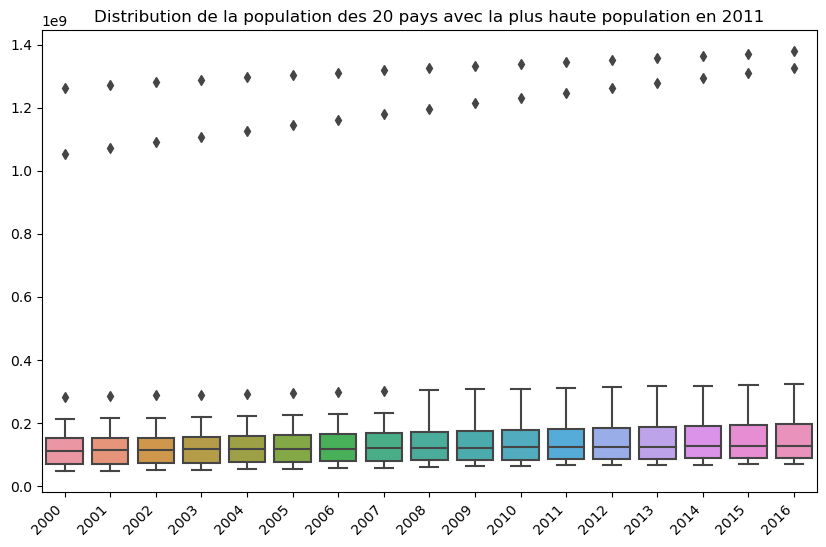

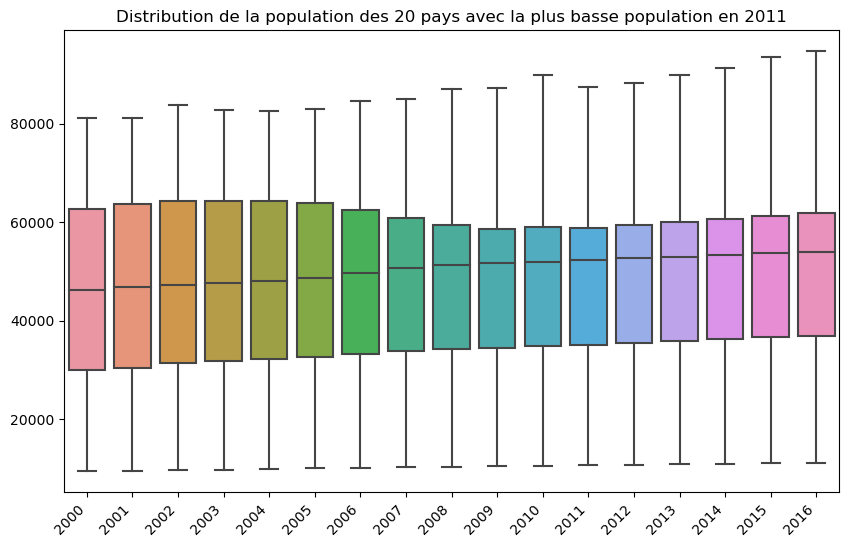

In [94]:
# Tri des données par la colonne '2011'
EtudePopTot_sorted = EtudePopTot.sort_values('2011', ascending=False)

# Diagramme en boîte pour les 20 pays avec la population la plus élevée
plt.figure(figsize=(10, 6))
sns.boxplot(data=EtudePopTot_sorted.iloc[:20, :])
plt.title('Distribution de la population des 20 pays avec la plus haute population en 2011')
plt.xticks(rotation=45, ha='right')
plt.show()

# Diagramme en boîte pour les 20 pays avec la population la plus faible
plt.figure(figsize=(10, 6))
sns.boxplot(data=EtudePopTot_sorted.iloc[-20:, :])
plt.title('Distribution de la population des 20 pays avec la plus basse population en 2011')
plt.xticks(rotation=45, ha='right')
plt.show()

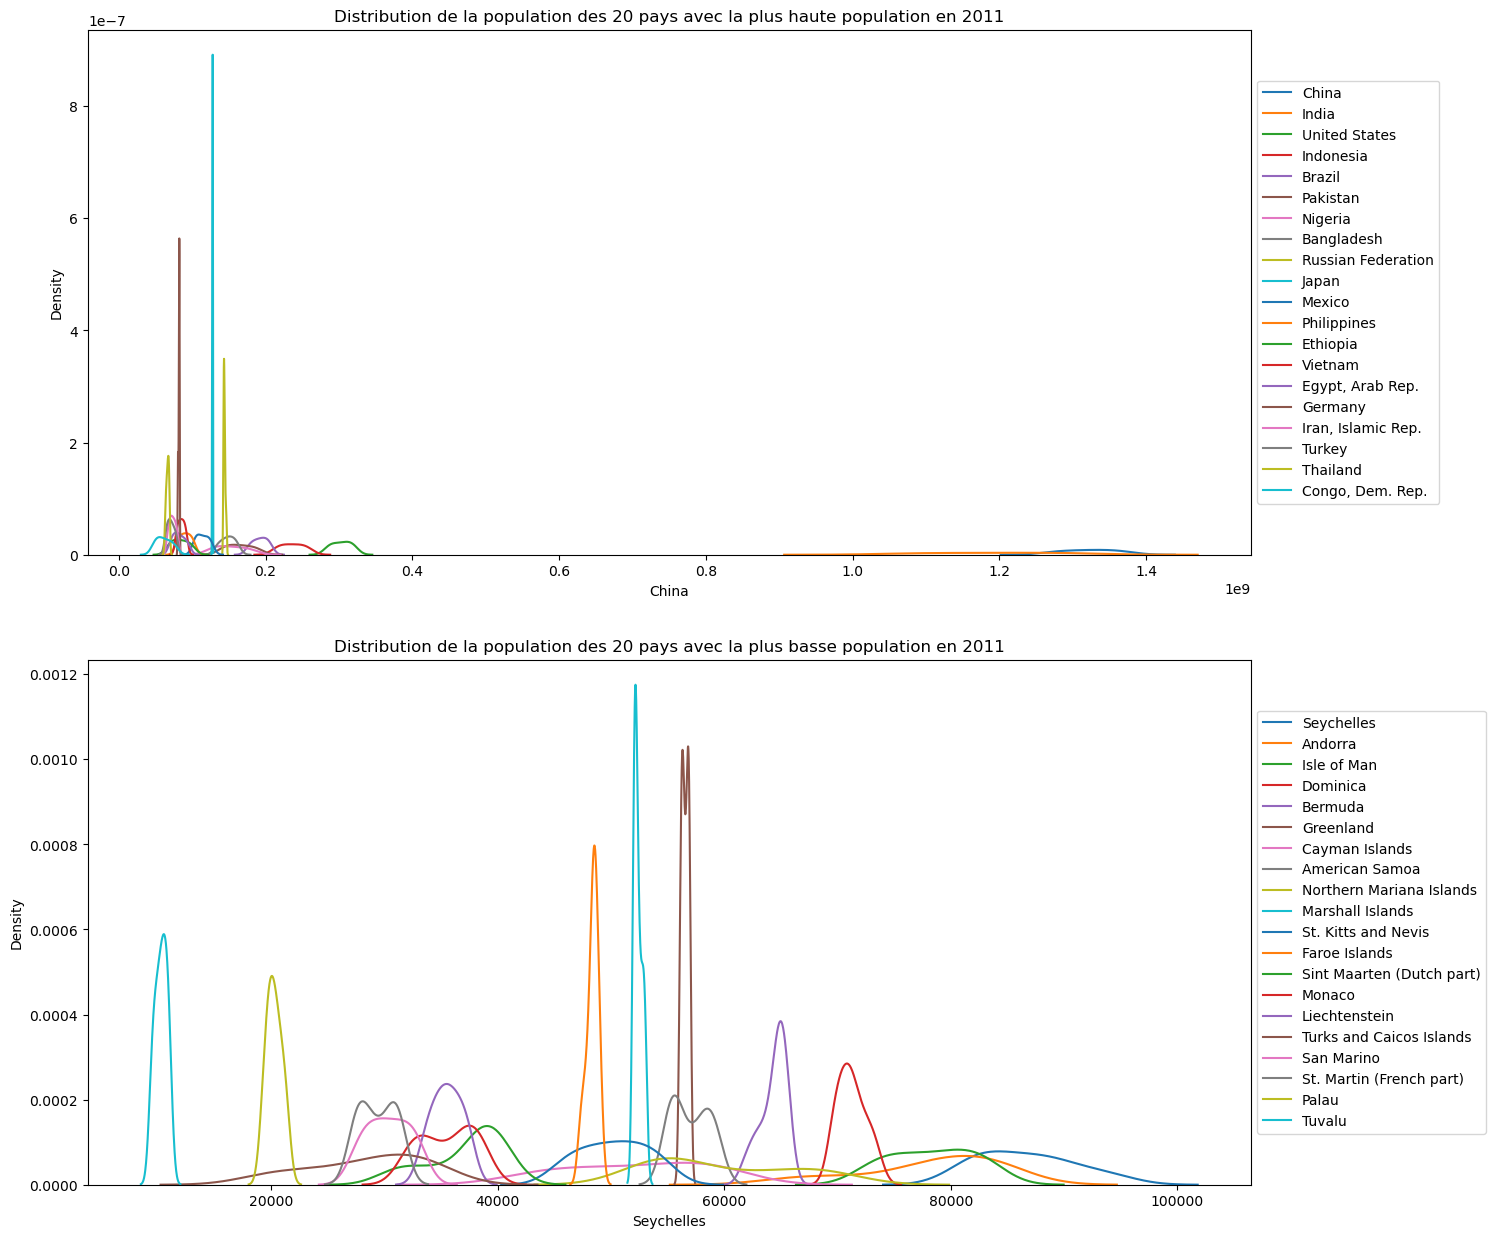

In [95]:
# Tri des données par la colonne '2011'
EtudePopTot_sorted = EtudePopTot.sort_values('2011', ascending=False)

# Sélection des 20 pays avec la population la plus élevée et la population la plus faible
EtudePopMax = EtudePopTot_sorted.iloc[:20, :].T
EtudePopMin = EtudePopTot_sorted.iloc[-20:, :].T

# Création de la distribution des populations avec des courbes de densité
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 15))

ax1 = plt.subplot(211)
for column in EtudePopMax.columns:
    sns.kdeplot(EtudePopMax[column], ax=ax1, label=column)

ax1.set_title('Distribution de la population des 20 pays avec la plus haute population en 2011')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = plt.subplot(212)
for column in EtudePopMin.columns:
    sns.kdeplot(EtudePopMin[column], ax=ax2, label=column)

ax2.set_title('Distribution de la population des 20 pays avec la plus basse population en 2011')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

- **La Chine représente l'un des pays avec une grande population, tandis que les Seychelles, au contraire, sont parmi les pays avec une population basse, comme illustré dans les deux distributions ci-dessus.**

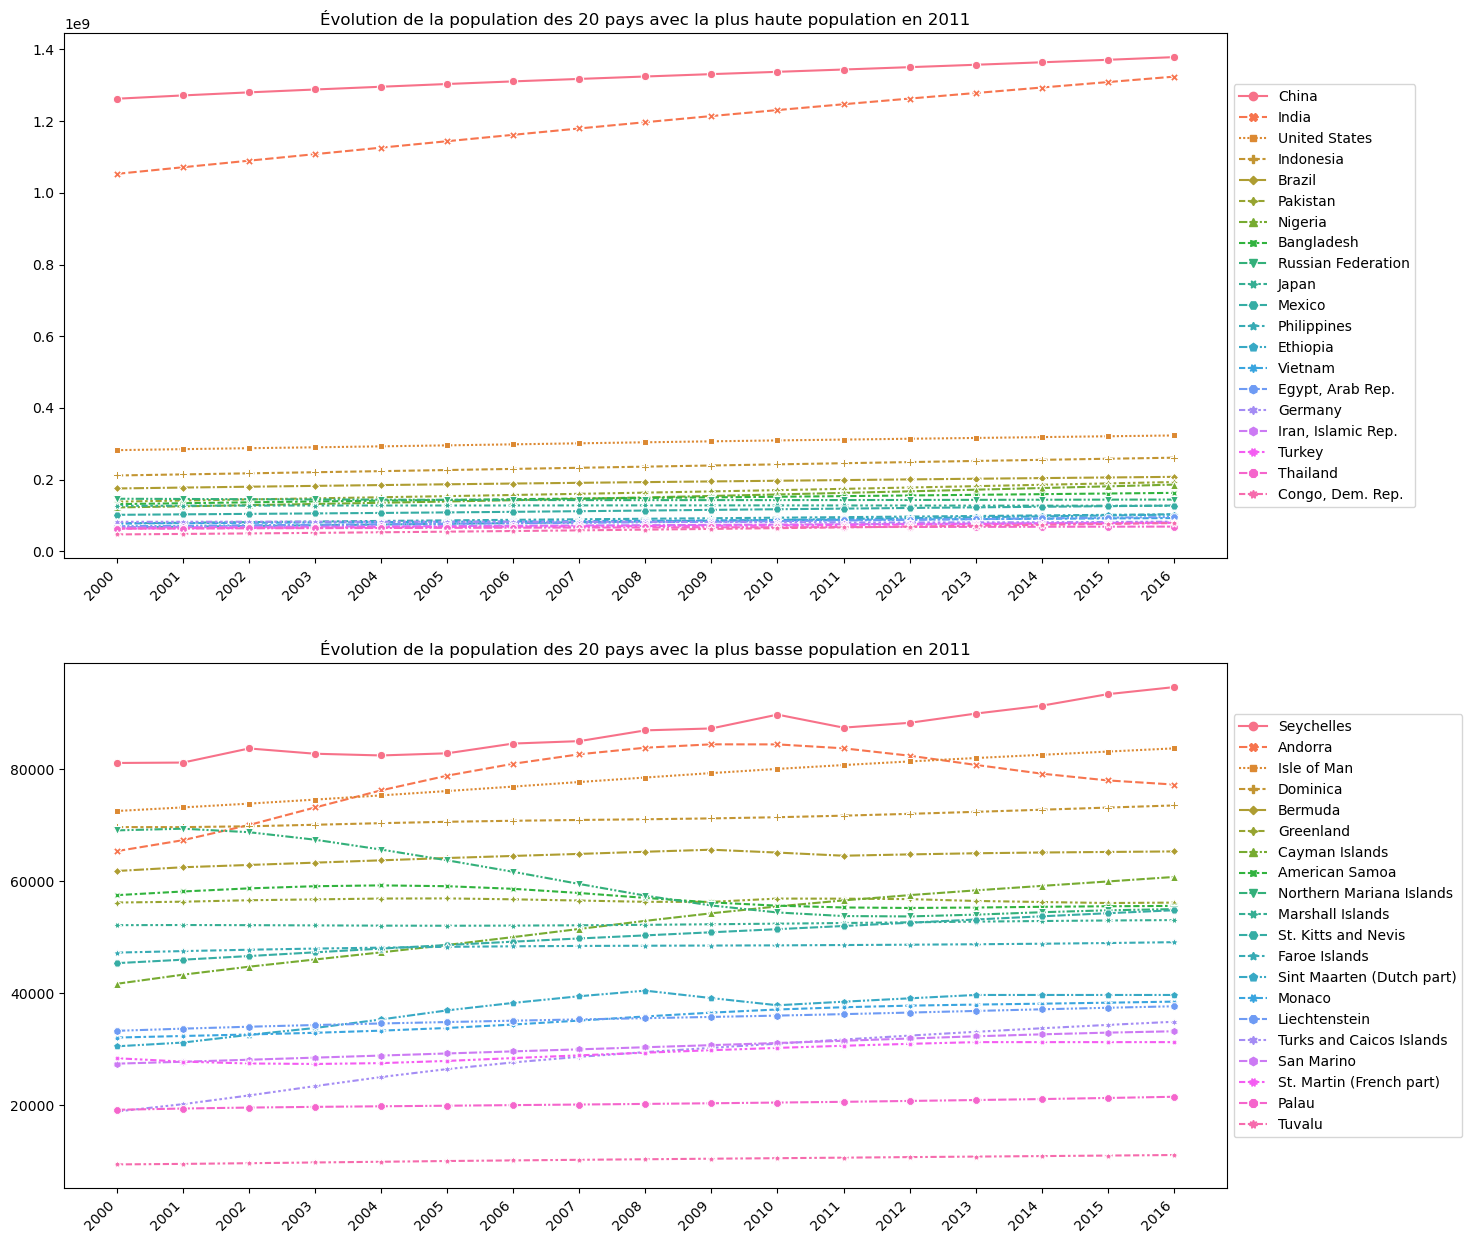

In [96]:
# Tri des données par la colonne '2011'
EtudePopTot_sorted = EtudePopTot.sort_values('2011', ascending=False)

# Sélection des 20 pays avec la population la plus élevée et la population la plus faible
EtudePopMax = EtudePopTot_sorted.iloc[:20, :].T
EtudePopMin = EtudePopTot_sorted.iloc[-20:, :].T

# Création du tracé des lignes
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 15))

ax1 = plt.subplot(211)
sns.lineplot(data=EtudePopMax, ax=ax1, markers=True)
ax1.set_title('Évolution de la population des 20 pays avec la plus haute population en 2011')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_xticklabels(EtudePopMax.index, rotation=45, ha='right')

ax2 = plt.subplot(212)
sns.lineplot(data=EtudePopMin, ax=ax2, markers=True)
ax2.set_title('Évolution de la population des 20 pays avec la plus basse population en 2011')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_xticklabels(EtudePopMin.index, rotation=45, ha='right')

plt.show()

- **On observe qu'en 2016, la population des pays a augmenté, sauf celle d'Andorre qui a vu sa population décroître cette année-là.**

### 3-  Analyse des indicateurs conservés:

In [97]:
print(indicateurs)   # indicateurs (voir III-5)

['SH.DYN.AIDS.ZS', 'SL.TLF.ADVN.FE.ZS', 'SL.TLF.ADVN.MA.ZS', 'SL.TLF.ADVN.ZS', 'SL.TLF.BASC.FE.ZS', 'SL.TLF.BASC.MA.ZS', 'SL.TLF.BASC.ZS', 'SL.TLF.INTM.FE.ZS', 'SL.TLF.INTM.MA.ZS', 'SL.TLF.INTM.ZS', 'SL.UEM.NEET.FE.ZS', 'SL.UEM.NEET.MA.ZS', 'SL.UEM.NEET.ZS', 'SP.POP.AG00.TO.UN', 'SP.POP.AG01.TO.UN', 'SP.POP.AG02.TO.UN', 'SP.POP.AG03.TO.UN', 'SP.POP.AG04.TO.UN', 'SP.POP.AG05.TO.UN', 'SP.POP.AG06.TO.UN', 'SP.POP.AG07.TO.UN', 'SP.POP.AG08.TO.UN', 'SP.POP.AG09.TO.UN', 'SP.POP.AG10.TO.UN', 'SP.POP.AG11.TO.UN', 'SP.POP.AG12.TO.UN', 'SP.POP.AG13.TO.UN', 'SP.POP.AG14.TO.UN', 'SP.POP.AG15.TO.UN', 'SP.POP.AG16.TO.UN', 'SP.POP.AG17.TO.UN', 'SP.POP.AG18.TO.UN', 'SP.POP.AG19.TO.UN', 'SP.POP.AG20.TO.UN', 'SP.POP.AG21.TO.UN', 'SP.POP.AG22.TO.UN', 'SP.POP.AG23.TO.UN', 'SP.POP.AG24.TO.UN', 'SP.POP.AG25.TO.UN']


In [98]:
# Agrégation des indicateurs d'ages pour créer des catégories Collége/lycée/étudiants:

# Définition des variables
College = ['SP.POP.AG12.TO.UN', 'SP.POP.AG13.TO.UN', 'SP.POP.AG14.TO.UN', 'SP.POP.AG15.TO.UN']
Lycee = ['SP.POP.AG16.TO.UN', 'SP.POP.AG17.TO.UN', 'SP.POP.AG18.TO.UN']
Fac = ['SP.POP.AG19.TO.UN', 'SP.POP.AG20.TO.UN', 'SP.POP.AG21.TO.UN', 'SP.POP.AG22.TO.UN', 'SP.POP.AG23.TO.UN', 'SP.POP.AG24.TO.UN', 'SP.POP.AG25.TO.UN']
Etudes = College + Lycee + Fac

def agregation_indicateurs_ages(DataFinal, indicators, column_name, description):
    CoutryCodes = list(DataFinal[DataFinal['Indicator Code'].isin(indicators)]['Country Code'].unique())

    for CountryCode in CoutryCodes:
        Pays = DataFinal[DataFinal['Country Code'] == CountryCode]

        # Agrégation des indicateurs d'âges
        Aggregated = Pays[Pays['Indicator Code'].isin(indicators)]
        Aggregated_data = Aggregated.select_dtypes(exclude='object').sum().to_frame().rename(columns={0: column_name}).T
        Aggregated_data = pd.concat([Aggregated, Aggregated_data])
        Aggregated_data['Indicator Code'] = Aggregated_data['Indicator Code'].fillna(f'Agrega{column_name}')
        Aggregated_data['Indicator Name'] = Aggregated_data['Indicator Name'].fillna(column_name)
        Aggregated_data['Long definition'] = Aggregated_data['Long definition'].fillna(description)
        Aggregated_data = Aggregated_data.fillna(method="ffill", axis=0).iloc[-1:, :]
        Aggregated_data = Aggregated_data.replace(0, np.nan)
        DataFinal = pd.concat([Aggregated_data, DataFinal])

    return DataFinal

# Utilisation de la fonction
# Agrégation pour les collégiens
DataFinal = agregation_indicateurs_ages(DataFinal, College, 'Collegiens', 'Populations ages 12 à 15ans')

# Agrégation pour les lycéens
DataFinal = agregation_indicateurs_ages(DataFinal, Lycee, 'Lyceens', 'Populations ages 16 à 18ans')

# Agrégation pour les étudiants
DataFinal = agregation_indicateurs_ages(DataFinal, Fac, 'Etudiants', 'Populations ages 19 à 25ans')

In [99]:
# Suppression des indicateurs ayant servi à la création des catégories collégiens, lycéens et étudiants, 
   # suivie du réarrangement des lignes et de la réinitialisation des index.


DataFinal = DataFinal.loc[~DataFinal['Indicator Code'].isin(Etudes)].sort_values('Country Name').reset_index(drop=True)
#DataFinal.head(2)

In [100]:
# Calcul du pourcentage de données non manquantes par colonne dans DataFinal
donnees_non_manquantes_par_colonne = DataFinal.notna().sum()

# Calcul du pourcentage total de données non manquantes dans DataFinal
pourcentage_donnees_non_manquantes = round((donnees_non_manquantes_par_colonne / len(DataFinal)) * 100)

# Affichage du résultat
print(pourcentage_donnees_non_manquantes)

Country Name       100.0
Country Code       100.0
Region             100.0
Income Group       100.0
Indicator Name     100.0
Indicator Code     100.0
Long definition    100.0
Topic              100.0
2000                93.0
2001                95.0
2002                96.0
2003                97.0
2004                97.0
2005                97.0
2006                97.0
2007                97.0
2008                97.0
2009                97.0
2010                96.0
2011                96.0
2012                96.0
2013                96.0
2014                96.0
2015                95.0
2016                94.0
dtype: float64


- **L'année 2015 est celle qui retient notre attention, car elle présente la meilleure couverture de données parmi les années récentes.**

In [101]:
DataFinal['Indicator Name'].unique()

array(['GDP at market prices (current US$)', 'Population, total',
       'Population growth (annual %)', 'Etudiants',
       'Population, age 2, total', 'Population, ages 15-64, total',
       'Enrolment in upper secondary education, both sexes (number)',
       'Enrolment in lower secondary education, both sexes (number)',
       'Lyceens', 'Unemployment, total (% of total labor force)',
       'Population, ages 0-14, total', 'Labor force, total',
       'GDP per capita (current US$)', 'Collegiens',
       'Internet users (per 100 people)',
       'Enrolment in tertiary education, all programmes, both sexes (number)'],
      dtype=object)

In [102]:
indicateurs_au_dessus_de_180

['GDP at market prices (current US$)',
 'GDP per capita (current US$)',
 'Internet users (per 100 people)',
 'Labor force, total',
 'Personal computers (per 100 people)',
 'Population growth (annual %)',
 'Population, age 12, total',
 'Population, age 13, total',
 'Population, age 14, total',
 'Population, age 15, total',
 'Population, age 16, total',
 'Population, age 17, total',
 'Population, age 18, total',
 'Population, age 19, total',
 'Population, age 2, total',
 'Population, age 20, total',
 'Population, age 21, total',
 'Population, age 22, total',
 'Population, age 23, total',
 'Population, age 24, total',
 'Population, age 25, total',
 'Population, ages 0-14, total',
 'Population, ages 15-64, total',
 'Population, total',
 'Unemployment, total (% of total labor force)']

In [104]:
# Pivot du tableau sur l'année 2015 (année la plus récente et mieux remplie):
Data_Pivot_2015 = pd.pivot_table(DataFinal, 
                               index=('Country Name', 'Region', 'Income Group'), 
                               columns='Indicator Name', 
                               values='2015')


Data_Pivot_2015.reset_index(inplace=True)

# Calcul de la colonne Nbre d'utilisateurs d'internet:
Data_Pivot_2015['Nbre_Utilisateur_Internet'] = (
    Data_Pivot_2015['Internet users (per 100 people)'] / 100 * Data_Pivot_2015['Population, total'])

# Réordonner les colonnes pour plus de lisibilité:
Data_Pivot_2015 = Data_Pivot_2015[['Country Name', 'Region', 'Income Group', 
                               'GDP per capita (current US$)', 'Internet users (per 100 people)','Nbre_Utilisateur_Internet',
                               'Population, total','Collegiens', 'Etudiants','Lyceens','Population, ages 0-14, total', 
                               'Population, ages 15-64, total', 'Labor force, total' , 
                               'Population growth (annual %)', 'Unemployment, total (% of total labor force)', 
                               'Enrolment in lower secondary education, both sexes (number)',
                               'Enrolment in tertiary education, all programmes, both sexes (number)',
                               'Enrolment in upper secondary education, both sexes (number)']]

# Création d'indicateurs par calculs: OutOfCollege (Hors du collège)
Data_Pivot_2015['OutOfCollege'] = Data_Pivot_2015['Collegiens'] - Data_Pivot_2015['Enrolment in lower secondary education, both sexes (number)']
Data_Pivot_2015['OutOfLycee'] = Data_Pivot_2015['Lyceens'] - Data_Pivot_2015['Enrolment in upper secondary education, both sexes (number)']
Data_Pivot_2015['OutOfFac'] = Data_Pivot_2015['Etudiants'] - Data_Pivot_2015['Enrolment in tertiary education, all programmes, both sexes (number)']

# Assurer que les valeurs négatives soient traitées correctement:
Data_Pivot_2015['OutOfLycee'][Data_Pivot_2015['OutOfLycee'] < 0] = 0
Data_Pivot_2015['OutOfCollege'][Data_Pivot_2015['OutOfCollege'] < 0] = 0

# Suppression des colonnes inutiles:
Data_Pivot_2015 = Data_Pivot_2015.drop(columns=[
    'Enrolment in lower secondary education, both sexes (number)',
    'Enrolment in tertiary education, all programmes, both sexes (number)',
    'Enrolment in upper secondary education, both sexes (number)'])


# Affichage des trois premières lignes du tableau résultant:
Data_Pivot_2015.head(3)  

Indicator Name Country Name                      Region         Income Group  \
0               Afghanistan                  South Asia           Low income   
1                   Albania       Europe & Central Asia  Upper middle income   
2                   Algeria  Middle East & North Africa  Upper middle income   

Indicator Name  GDP per capita (current US$)  Internet users (per 100 people)  \
0                                 569.577923                         8.260000   
1                                3934.895394                        63.252933   
2                                4160.220067                        38.200000   

Indicator Name  Nbre_Utilisateur_Internet  Population, total  Collegiens  \
0                            2.786634e+06         33736494.0   3479614.0   
1                            1.822129e+06          2880703.0    199646.0   
2                            1.523092e+07         39871528.0   2428113.0   

Indicator Name  Etudiants    Lyceens  Population, ages 0-14, total  \
0               4623911.0  2376886.0                    15023530.0   
1                409241.0   156829.0                      519301.0   
2               4865649.0  1742578.0                    11424395.0   

Indicator Name  Population, ages 15-64, total  Labor force, total  \
0                                  17871866.0          10087656.0   
1                                   2000257.0           1333025.0   
2                                  26106760.0          11798754.0   

Indicator Name  Population growth (annual %)  \
0                                   2.943234   
1                                  -0.291206   
2                                   1.919959   

Indicator Name  Unemployment, total (% of total labor force)  OutOfCollege  \
0                                                        8.6     1845649.0   
1                                                       17.1       18292.0   
2                                                       11.2           NaN   

Indicator Name  OutOfLycee   OutOfFac  
0                1408117.0  4361037.0  
1                   4892.0   248714.0  
2                      NaN  3576175.0

In [105]:
# Paramètre statistique de notre DataFrame "Data_Pivot_2015"
     # Arrondir les valeurs du DataFrame à deux décimales

Data_Pivot_2015 = round(Data_Pivot_2015,2)
Data_Pivot_2015.describe()

Indicator Name  GDP per capita (current US$)  Internet users (per 100 people)  \
count                             200.000000                       202.000000   
mean                            15189.337600                        48.543861   
std                             22232.845881                        28.676716   
min                               300.680000                         0.000000   
25%                              1907.072500                        21.700000   
50%                              5794.170000                        50.220000   
75%                             17197.350000                        73.050000   
max                            168146.020000                        98.320000   

Indicator Name  Nbre_Utilisateur_Internet  Population, total    Collegiens  \
count                        2.010000e+02       2.130000e+02  1.810000e+02   
mean                         1.559366e+07       3.439551e+07  2.672335e+06   
std                          5.860832e+07       1.344902e+08  9.324989e+06   
min                          0.000000e+00       1.100100e+04  5.900000e+03   
25%                          3.791633e+05       8.921490e+05  1.799930e+05   
50%                          2.474964e+06       6.312478e+06  5.624070e+05   
75%                          7.901124e+06       2.310847e+07  2.075336e+06   
max                          6.897237e+08       1.371220e+09  9.893076e+07   

Indicator Name     Etudiants       Lyceens  Population, ages 0-14, total  \
count           1.810000e+02  1.810000e+02                  1.930000e+02   
mean            4.664172e+06  1.992805e+06                  9.944388e+06   
std             1.699268e+07  7.167636e+06                  3.378268e+07   
min             9.895000e+03  4.409000e+03                  1.951500e+04   
25%             3.454070e+05  1.387350e+05                  5.119270e+05   
50%             8.938550e+05  4.102400e+05                  1.866853e+06   
75%             3.386991e+06  1.574140e+06                  8.253725e+06   
max             1.688556e+08  7.379198e+07                  3.751449e+08   

Indicator Name  Population, ages 15-64, total  Labor force, total  \
count                            1.930000e+02        1.850000e+02   
mean                             2.486150e+07        1.811854e+07   
std                              9.731270e+07        7.056168e+07   
min                              6.107600e+04        3.888700e+04   
25%                              1.302780e+06        1.178300e+06   
50%                              5.377243e+06        4.061011e+06   
75%                              1.574562e+07        1.212515e+07   
max                              9.960304e+08        7.871098e+08   

Indicator Name  Population growth (annual %)  \
count                             213.000000   
mean                                1.320423   
std                                 1.234662   
min                                -2.470000   
25%                                 0.500000   
50%                                 1.170000   
75%                                 2.200000   
max                                 5.860000   

Indicator Name  Unemployment, total (% of total labor force)  OutOfCollege  \
count                                             186.000000  1.610000e+02   
mean                                                8.833871  9.297467e+05   
std                                                 6.419614  3.511800e+06   
min                                                 0.100000  0.000000e+00   
25%                                                 4.625000  3.732000e+03   
50%                                                 6.850000  6.546200e+04   
75%                                                11.350000  5.154660e+05   
max                                                31.300000  3.475891e+07   

Indicator Name    OutOfLycee      OutOfFac  
count           1.530000e+02  1.480000e+02  
mean            6.587770e+05  3.90

In [106]:
# Sélectionner les mesures par zones
zones = Data_Pivot_2015.set_index('Region').select_dtypes(exclude='object').reset_index()

# Calculer la moyenne par zone
mean_by_region = pd.pivot_table(zones, columns='Region', aggfunc='mean')

# Arrondir les valeurs à une décimale
mean_by_region = round(mean_by_region, 1)

# Mettre en surbrillance les valeurs maximales en rouge et les valeurs minimales en jaune
styled_mean = mean_by_region.style.highlight_max(axis=1, color='red').highlight_min(axis=1, color='yellow')

# Afficher le résultat
styled_mean


In [107]:
# Fonction pour trouver les outliers en utilisant la méthode IQR
def finding_outliers(df):
    # Calcul des quartiles
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    # Calcul de l'IQR (Interquartile Range)
    IQR = q3 - q1
    # Identification des outliers
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]

    return outliers

# Sélection des colonnes numériques du DataFrame
colonnes = Data_Pivot_2015.select_dtypes(exclude='object').columns

# Création d'un DataFrame pour stocker les résultats
resultats_outliers = pd.DataFrame(columns=['Colonne', 'Nombre d\'outliers', 'Outlier Max', 'Outlier Min'])

# Parcours des colonnes pour trouver et stocker les outliers
for colonne in colonnes:
    # Appel de la fonction pour trouver les outliers pour la colonne actuelle
    outliers = finding_outliers(Data_Pivot_2015[colonne])
    
    # Stockage des résultats dans le DataFrame
    resultats_outliers = resultats_outliers.append({
        'Colonne': colonne,
        'Nombre d\'outliers': len(outliers),
        'Outlier Max': outliers.max(),
        'Outlier Min': outliers.min()
    }, ignore_index=True)

# Affichage du DataFrame final
resultats_outliers

Colonne Nombre d'outliers  \
0                   GDP per capita (current US$)                25   
1                Internet users (per 100 people)                 0   
2                      Nbre_Utilisateur_Internet                34   
3                              Population, total                23   
4                                     Collegiens                16   
5                                      Etudiants                18   
6                                        Lyceens                16   
7                   Population, ages 0-14, total                17   
8                  Population, ages 15-64, total                23   
9                             Labor force, total                21   
10                  Population growth (annual %)                 2   
11  Unemployment, total (% of total labor force)                12   
12                                  OutOfCollege                20   
13                                    OutOfLycee                18   
14                                      OutOfFac                13   

     Outlier Max  Outlier Min  
0   1.681460e+05     40375.39  
1            NaN          NaN  
2   6.897237e+08  19275447.15  
3   1.371220e+09  60730582.00  
4   9.893076e+07   5355032.00  
5   1.688556e+08   8556329.00  
6   7.379198e+07   3842249.00  
7   3.751449e+08  20024544.00  
8   9.960304e+08  38584608.00  
9   7.871098e+08  29613257.00  
10  5.860000e+00        -2.47  
11  3.130000e+01        22.10  
12  3.475891e+07   1381513.00  
13  1.856330e+07   1260502.00  
14  1.367482e+08   7631790.00

In [108]:
# Fonction pour trouver les outliers en utilisant la méthode IQR
def finding_outliers(df):
    # Calcul des quartiles
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    # Calcul de l'IQR (Interquartile Range)
    IQR = q3 - q1
    # Identification des outliers
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]

    return outliers

# Sélection des colonnes numériques du DataFrame
colonnes = Data_Pivot_2015.select_dtypes(exclude='object').columns

# Parcours des colonnes pour trouver et afficher les outliers
for colonne in colonnes:
    # Appel de la fonction pour trouver les outliers pour la colonne actuelle
    outliers = finding_outliers(Data_Pivot_2015[colonne])
    
    # Affichage des résultats
    print(f'Pour la colonne : {colonne}, on a:')
    print(f"Nombre d'outliers : {len(outliers)}")
    print(f"Outlier Max : {outliers.max()}")
    print(f"Outlier Min : {outliers.min()}")
    print()

Pour la colonne : GDP per capita (current US$), on a:
Nombre d'outliers : 25
Outlier Max : 168146.02
Outlier Min : 40375.39

Pour la colonne : Internet users (per 100 people), on a:
Nombre d'outliers : 0
Outlier Max : nan
Outlier Min : nan

Pour la colonne : Nbre_Utilisateur_Internet, on a:
Nombre d'outliers : 34
Outlier Max : 689723660.0
Outlier Min : 19275447.15

Pour la colonne : Population, total, on a:
Nombre d'outliers : 23
Outlier Max : 1371220000.0
Outlier Min : 60730582.0

Pour la colonne : Collegiens, on a:
Nombre d'outliers : 16
Outlier Max : 98930765.0
Outlier Min : 5355032.0

Pour la colonne : Etudiants, on a:
Nombre d'outliers : 18
Outlier Max : 168855576.0
Outlier Min : 8556329.0

Pour la colonne : Lyceens, on a:
Nombre d'outliers : 16
Outlier Max : 73791976.0
Outlier Min : 3842249.0

Pour la colonne : Population, ages 0-14, total, on a:
Nombre d'outliers : 17
Outlier Max : 375144882.0
Outlier Min : 20024544.0

Pour la colonne : Population, ages 15-64, total, on a:
Nombr

- **La disparité économique est notable avec la présence de pays très riches ou extrêmement pauvres.**
- **Une diversité marquée se manifeste dans la taille des populations des pays, allant de très peuplés à peu peuplés.**
- **Il existe une distinction claire entre les gros consommateurs d'Internet et les pays qui n'en consomment pratiquement pas.**

In [109]:
# MATRICE DE CRRRELATION de toutes les variables

Data_Pivot_2015.corr()

Indicator Name                                GDP per capita (current US$)  \
Indicator Name                                                               
GDP per capita (current US$)                                      1.000000   
Internet users (per 100 people)                                   0.700220   
Nbre_Utilisateur_Internet                                         0.017689   
Population, total                                                -0.059388   
Collegiens                                                       -0.081332   
Etudiants                                                        -0.067965   
Lyceens                                                          -0.075400   
Population, ages 0-14, total                                     -0.094495   
Population, ages 15-64, total                                    -0.040970   
Labor force, total                                               -0.032437   
Population growth (annual %)                                     -0.203688   
Unemployment, total (% of total labor force)                     -0.174441   
OutOfCollege                                                     -0.115458   
OutOfLycee                                                       -0.176105   
OutOfFac                                                         -0.111318   

Indicator Name                                Internet users (per 100 people)  \
Indicator Name                                                                  
GDP per capita (current US$)                                         0.700220   
Internet users (per 100 people)                                      1.000000   
Nbre_Utilisateur_Internet                                            0.061925   
Population, total                                                   -0.054829   
Collegiens                                                          -0.086353   
Etudiants                                                           -0.063360   
Lyceens                                                             -0.076839   
Population, ages 0-14, total                                        -0.113724   
Population, ages 15-64, total                                       -0.030866   
Labor force, total                                                  -0.017357   
Population growth (annual %)                                        -0.455633   
Unemployment, total (% of total labor force)                        -0.004483   
OutOfCollege                                                        -0.168626   
OutOfLycee                                                          -0.237056   
OutOfFac                                                            -0.125023   

Indicator Name                                Nbre_Utilisateur_Internet  \
Indicator Name                                                            
GDP per capita (current US$)                                   0.017689   
Internet users (per 100 people)                                0.061925   
Nbre_Utilisateur_Internet                                      1.000000   
Population, total                                              0.931831   
Collegiens                                                     0.840318   
Etudiants                                                      0.885028   
Lyceens                                                        0.862340   
Population, ages 0-14, total                                   0.814737   
Population, ages 15-64, total                                  0.944861   
Labor force, total                                             0.971614   
Population growth (annual %)                                  -0.093492   
Unemployment, total (% of total labor force)                  -0.115241   
OutOfCollege                                                   0.783282   
OutOfLycee                                                     0.732731   
OutOfFac                                                       0.829958   

Indicator Name     

In [110]:
"""
# CARTE DE CORRELATION AMELIOREE

mask = np.triu(np.ones_like(Data_Pivot_2015.corr(), dtype='bool'))
sns.heatmap(Data_Pivot_2015.corr(), mask=mask, center=0,
            cmap="RdBu", linewidths=1,
            annot=True, fmt=".1f", vmin=-1, vmax=1)
plt.title("carte des correlations de pearson")
plt.show()
"""

'\n# CARTE DE CORRELATION AMELIOREE\n\nmask = np.triu(np.ones_like(Data_Pivot_2015.corr(), dtype=\'bool\'))\nsns.heatmap(Data_Pivot_2015.corr(), mask=mask, center=0,\n            cmap="RdBu", linewidths=1,\n            annot=True, fmt=".1f", vmin=-1, vmax=1)\nplt.title("carte des correlations de pearson")\nplt.show()\n'

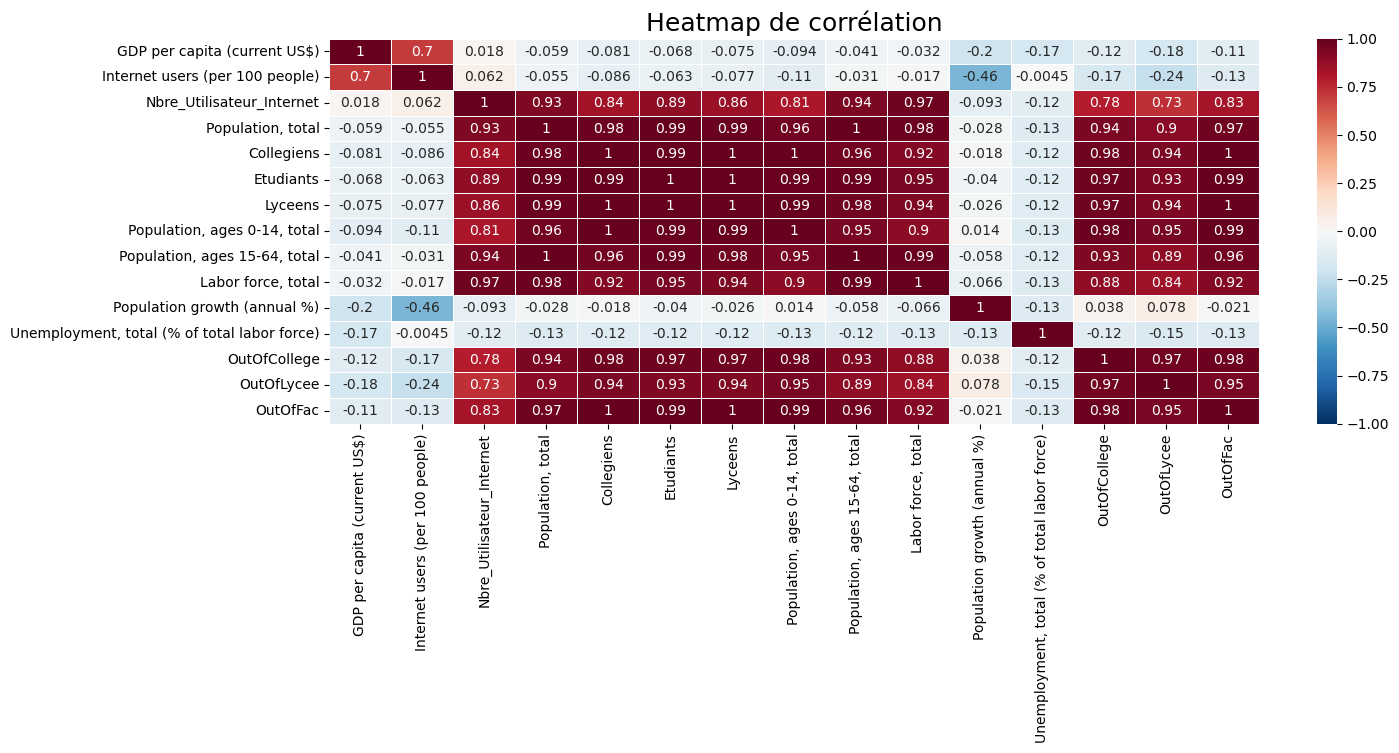

In [111]:
# Heatmap de Corrélation :
# Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(15, 5))

# Extraction de la matrice de corrélation pour les variables numériques
corr_matrix = Data_Pivot_2015.select_dtypes(exclude='object').corr()

# Création de la heatmap avec seaborn
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="RdBu_r", annot=True, linewidths=0.5, ax=ax)

# Titre de la heatmap
ax.set_title("Heatmap de corrélation", size=18)

# Modification des étiquettes des axes x et y
ax.set_xlabel('')
ax.set_ylabel('')

# Affichage de la figure
plt.show()

- **Aucune corrélation n'est constatée entre la croissance démographique annuelle, le taux de chômage total et les autres indicateurs, bien que l'on note une inversion entre le pourcentage de la population utilisant Internet et le taux de croissance démographique (suggérant une possible causalité).**


- **Une corrélation entre le PIB par habitant et l'adoption d'Internet est observée.**


- **Des corrélations sont identifiées entre le nombre d'habitants, le nombre d'utilisateurs d'Internet, les effectifs scolaires (collégiens, lycéens, étudiants en études supérieures), la population dans les tranches d'âge 0-14 et 15-64, ainsi que la population active totale.**

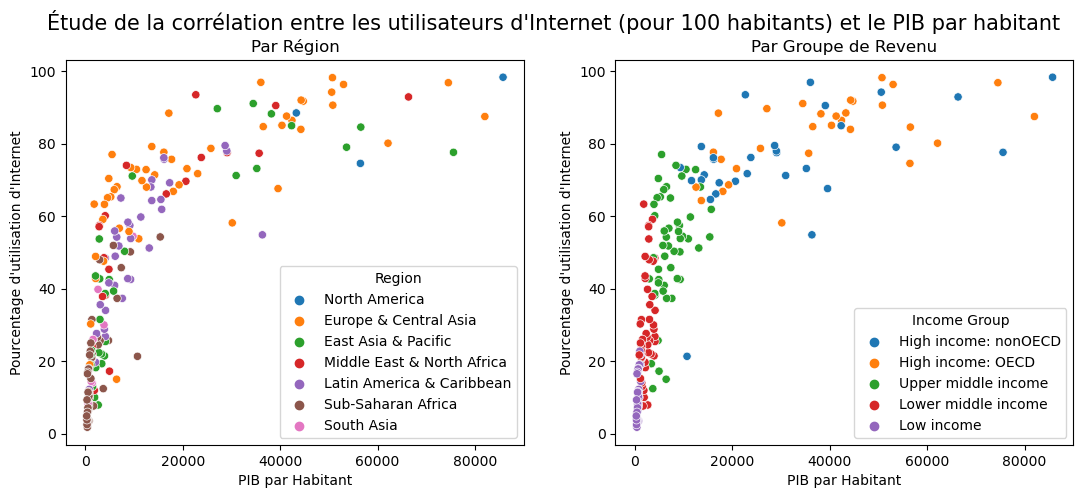

In [112]:
# Analyse en scatterplot des données corrélées:

# Suppression du Lichtenstein dont le PIB est beaucoup plus haut et aplati le graphique:
""" (High income: nonOECD, Liechtenstein, 
Europe & Central Asia de 2000 à 2016) 78.0, 78.0, 13.0, 65.0, 65.0, 65.0, 
65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 78.0, 65.0, 74.0, 87.0, 62.0"""
# Tri des données par PIB par habitant et suppression du pays avec le PIB le plus élevé
scatter_data = Data_Pivot_2015.sort_values('GDP per capita (current US$)', ascending=False).iloc[2:]

# Création de la figure avec deux sous-graphiques en une ligne
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 5))
fig.suptitle("Étude de la corrélation entre les utilisateurs d'Internet (pour 100 habitants) et le PIB par habitant", size=15)

# Premier sous-graphique : corrélation par région
ax1 = plt.subplot(121)
ax1 = sns.scatterplot(data=scatter_data, x='GDP per capita (current US$)', y='Internet users (per 100 people)', hue='Region')
plt.xlabel('PIB par Habitant')
plt.ylabel("Pourcentage d'utilisation d'Internet")
plt.title('Par Région')

# Deuxième sous-graphique : corrélation par groupe de revenu
ax2 = plt.subplot(122)
ax2 = sns.scatterplot(data=scatter_data, x='GDP per capita (current US$)', y='Internet users (per 100 people)', hue='Income Group')
plt.xlabel('PIB par Habitant')
plt.ylabel("Pourcentage d'utilisation d'Internet")
plt.title('Par Groupe de Revenu')

# Affichage de la figure
plt.show()

- **La corrélation entre ces deux variables est clairement perceptible.**
- **Il est ardu de mettre en avant une région plutôt qu'une autre.**
- **Cependant, la corrélation entre les utilisateurs d'internet et les revenus est confirmée, montrant une utilisation plus prononcée d'internet dans les pays riches.**

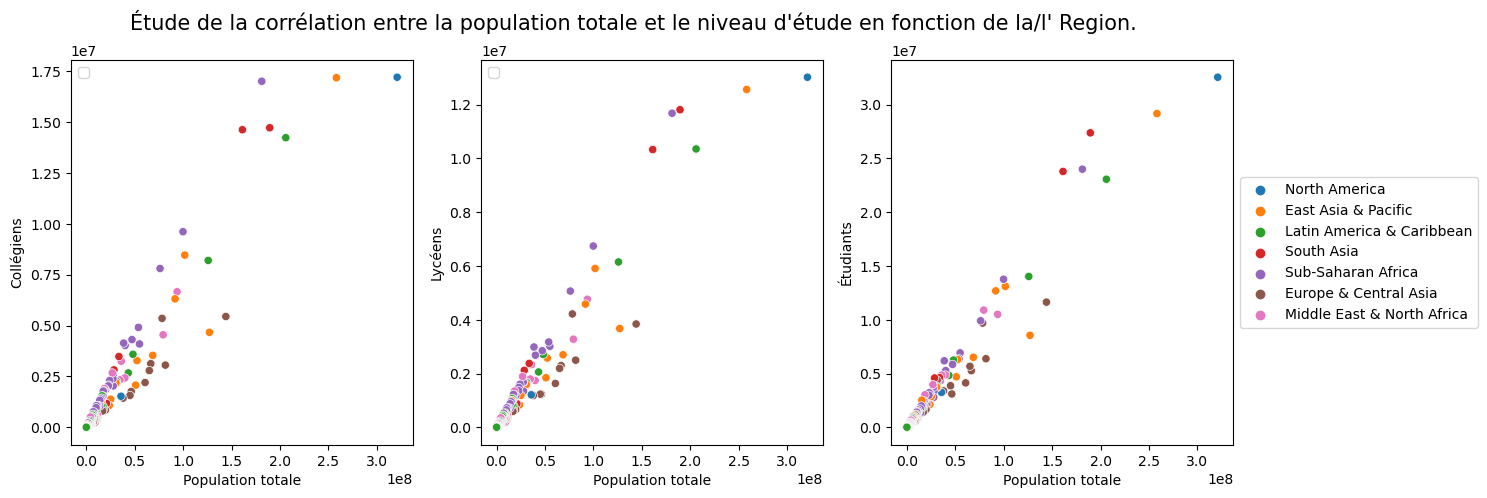

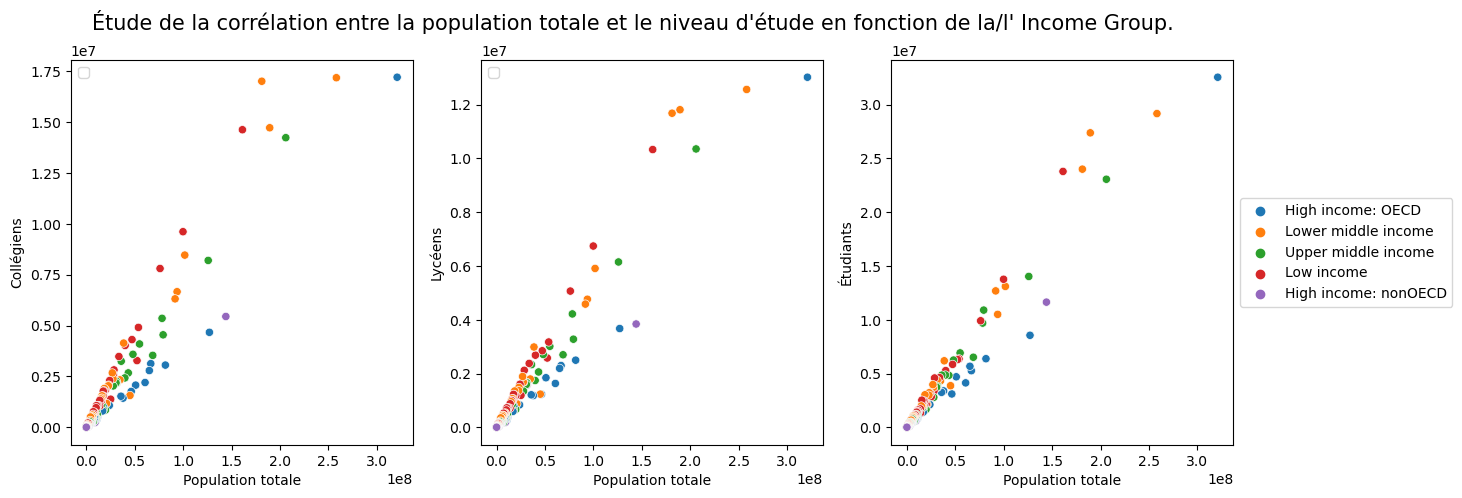

In [113]:
# Analyse de la corrélation entre la population totale et le niveau d'étude:
# Suppression des deux plus gros pays:

scatter_data = Data_Pivot_2015.sort_values('Population, total', ascending=False).iloc[2:]

list_groupes = ['Region', 'Income Group']

for groupe in list_groupes:
    # Création de la figure avec trois sous-graphiques en une ligne
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
    fig.suptitle("Étude de la corrélation entre la population totale et le niveau d'étude en fonction de la/l' {}.".format(groupe), size=15)
    
    # Premier sous-graphique : Corrélation avec les collégiens
    ax1 = plt.subplot(131)
    ax1 = sns.scatterplot(data=scatter_data, x='Population, total', y='Collegiens', hue=groupe)
    plt.xlabel('Population totale')
    plt.ylabel('Collégiens')
    plt.legend('')
    
    # Deuxième sous-graphique : Corrélation avec les lycéens
    ax2 = plt.subplot(132)
    ax2 = sns.scatterplot(data=scatter_data, x='Population, total', y='Lyceens', hue=groupe)
    plt.xlabel('Population totale')
    plt.ylabel('Lycéens')
    plt.legend('')
    
    # Troisième sous-graphique : Corrélation avec les étudiants
    ax3 = plt.subplot(133)
    ax3 = sns.scatterplot(data=scatter_data, x='Population, total', y='Etudiants', hue=groupe)
    plt.xlabel('Population totale')
    plt.ylabel('Étudiants')
    ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Affichage de la figure
    plt.show()

- **Comme prévu, une corrélation significative est observée entre ces trois variables et la population totale, sans toutefois déceler de corrélation avec les zones géographiques ou les revenus (Incomes), comme anticipé.**

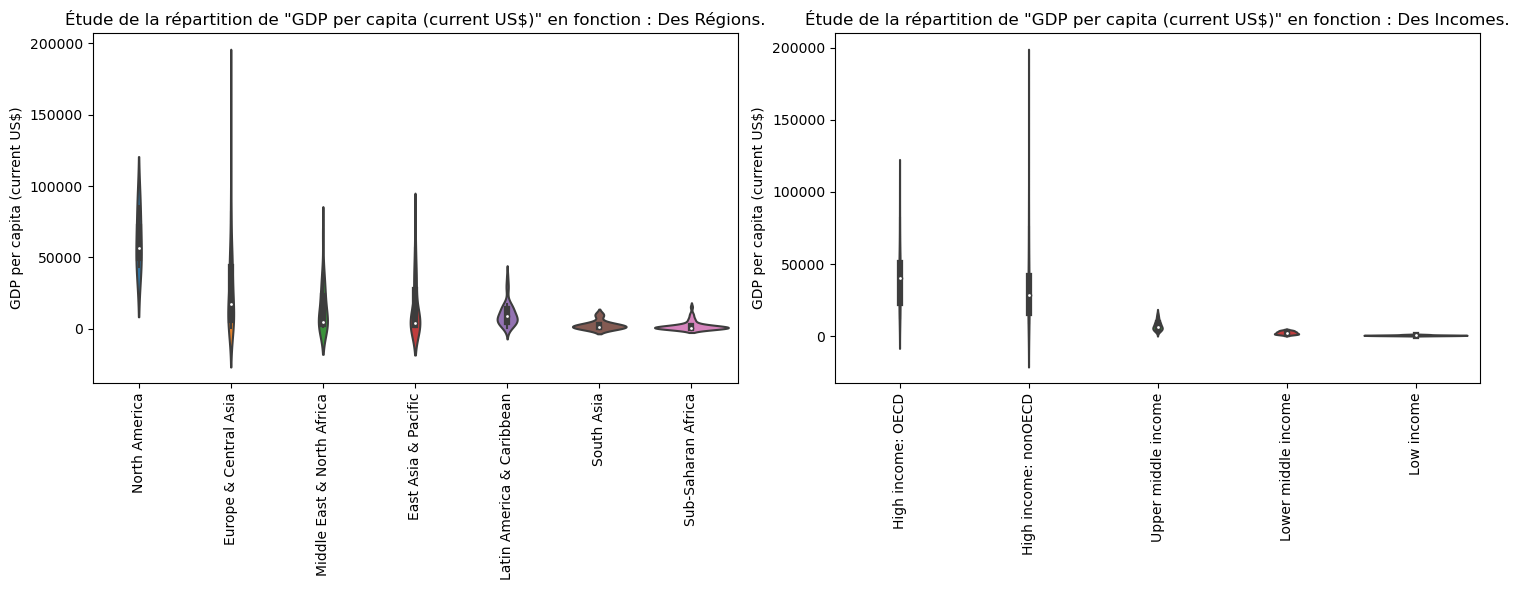

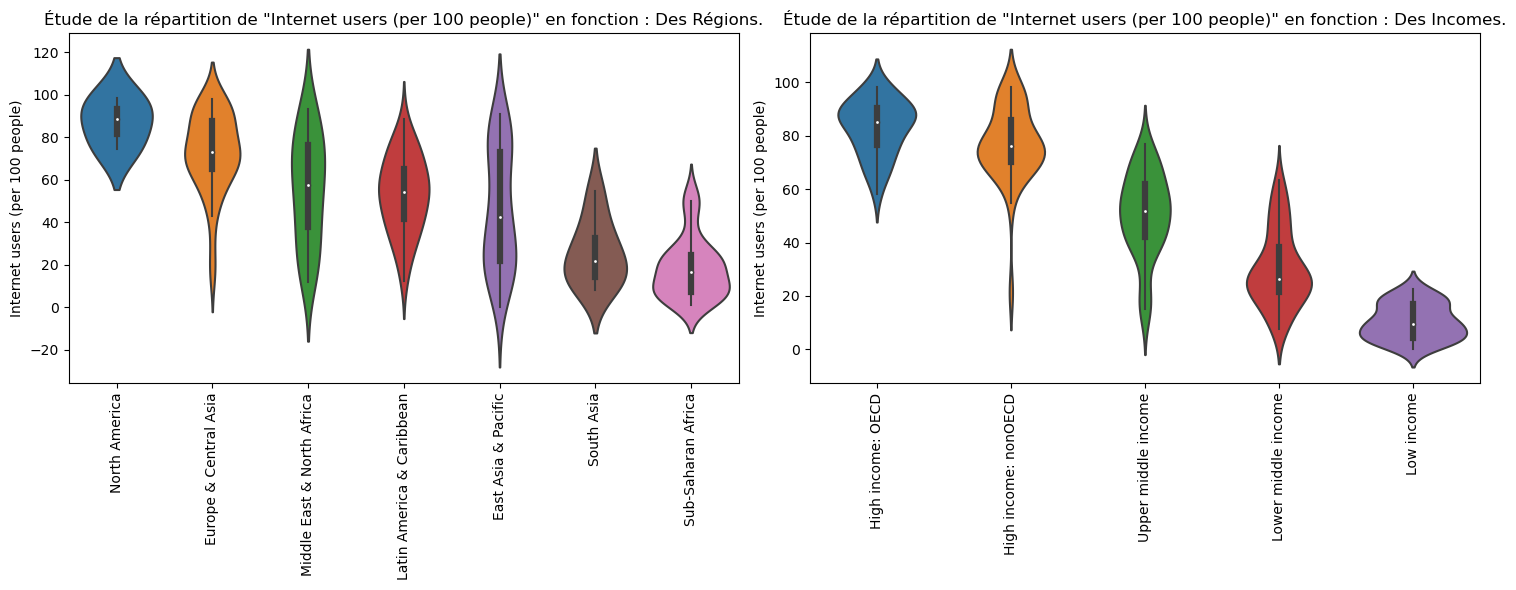

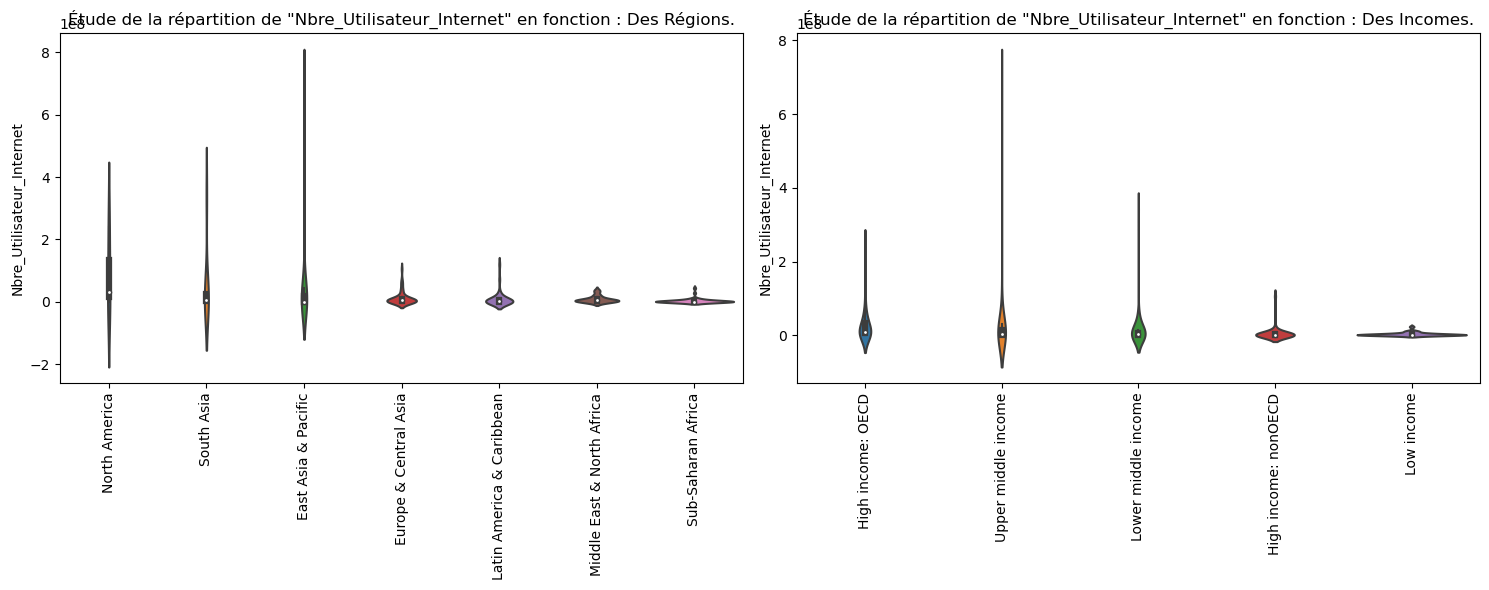

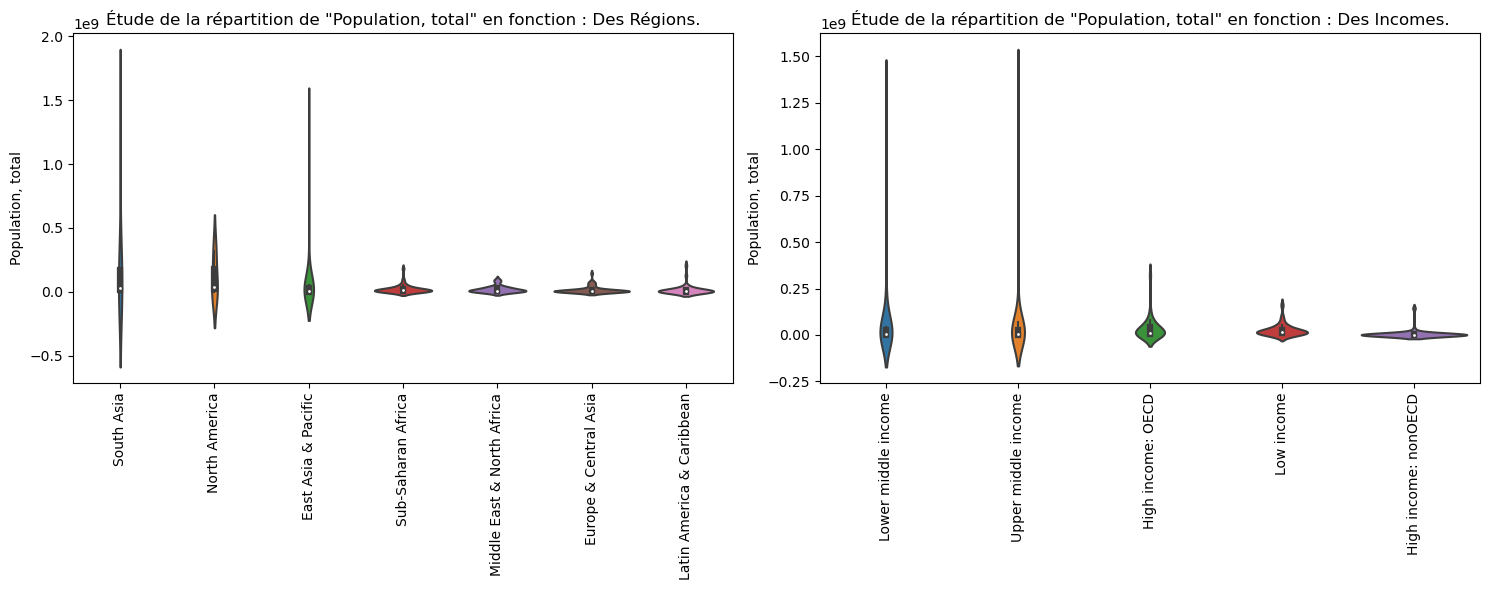

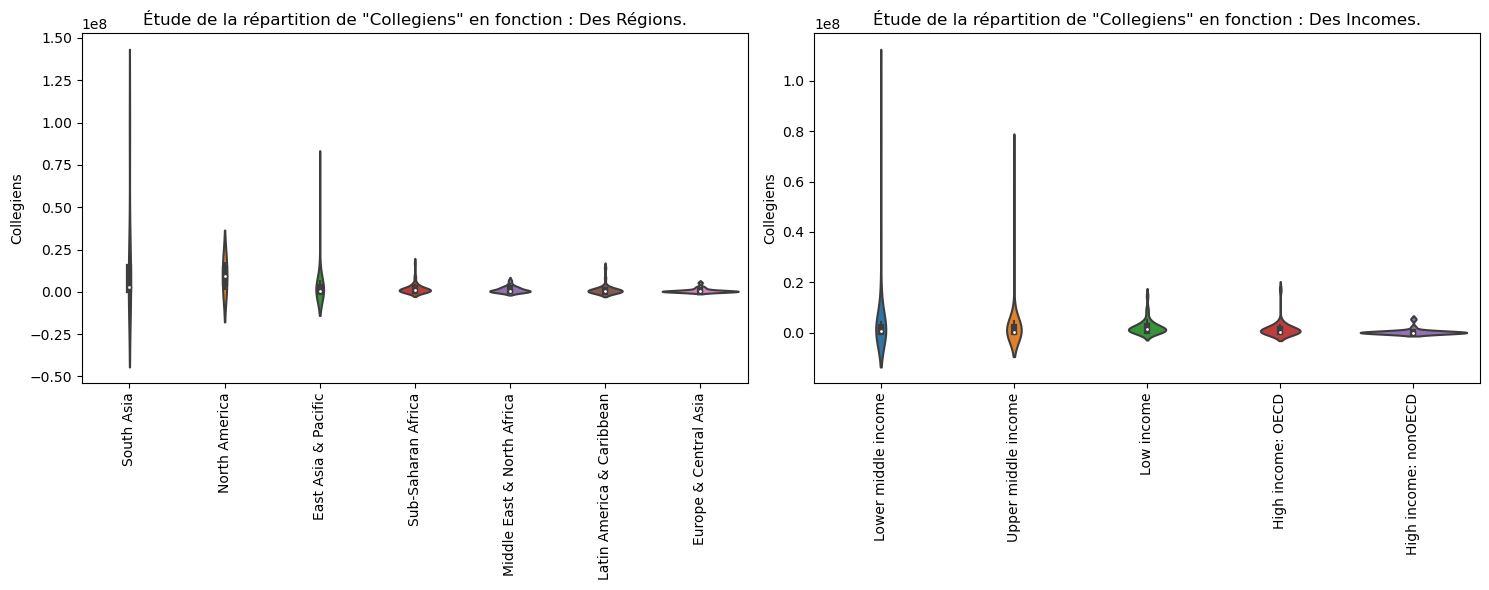

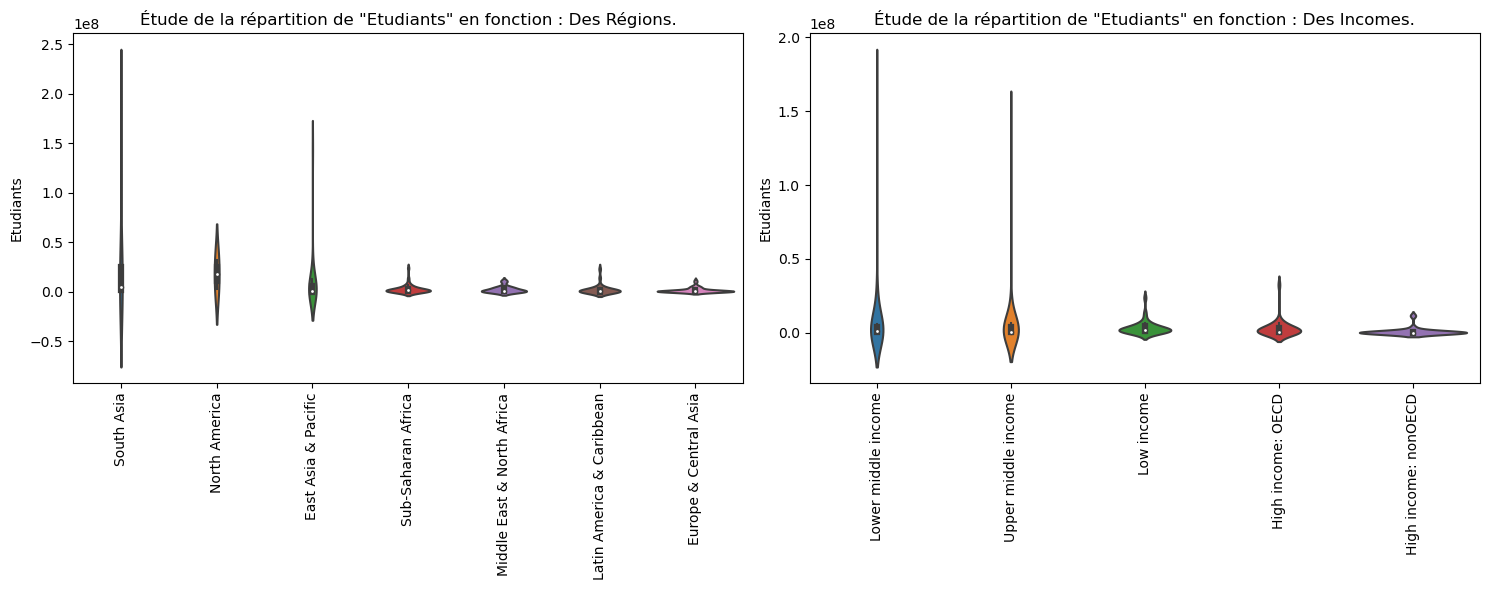

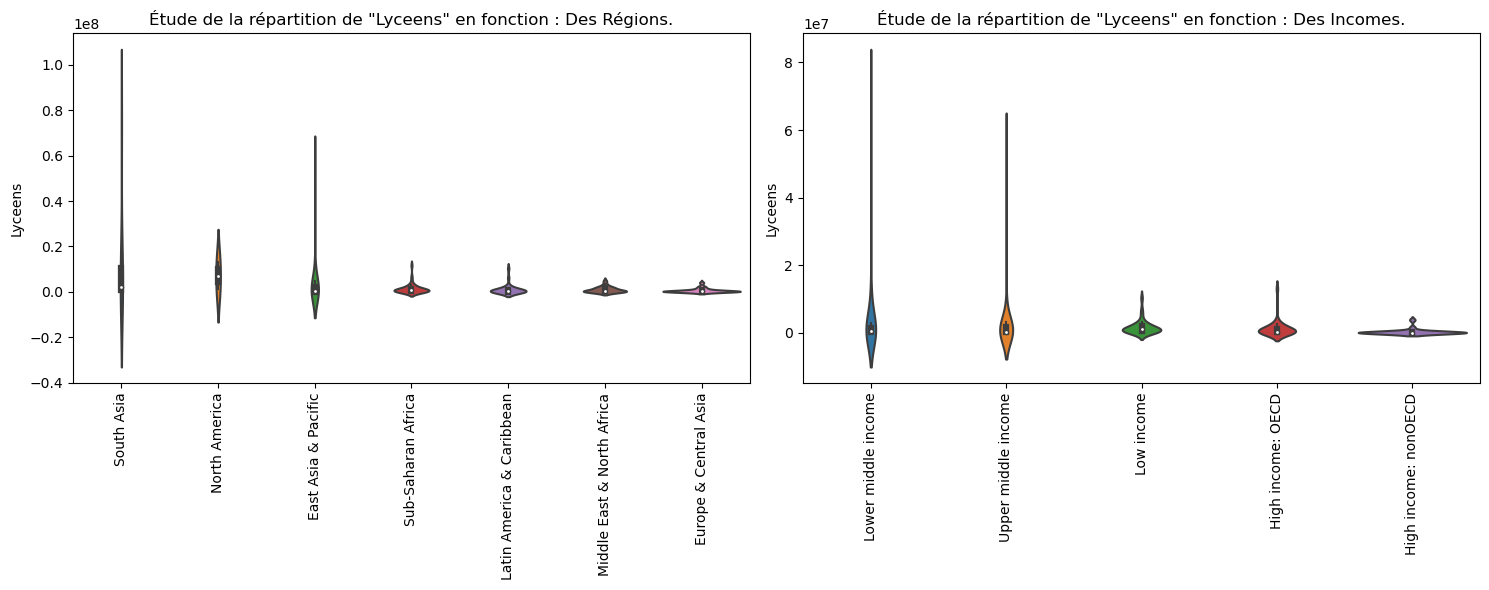

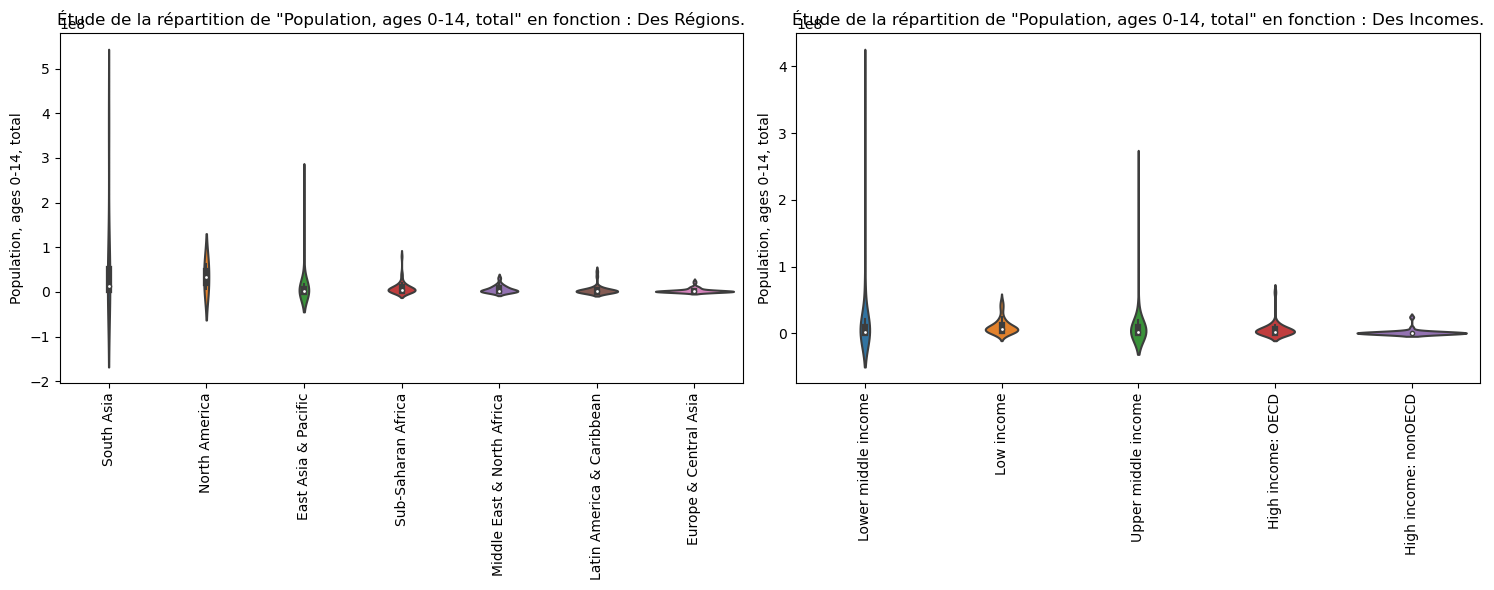

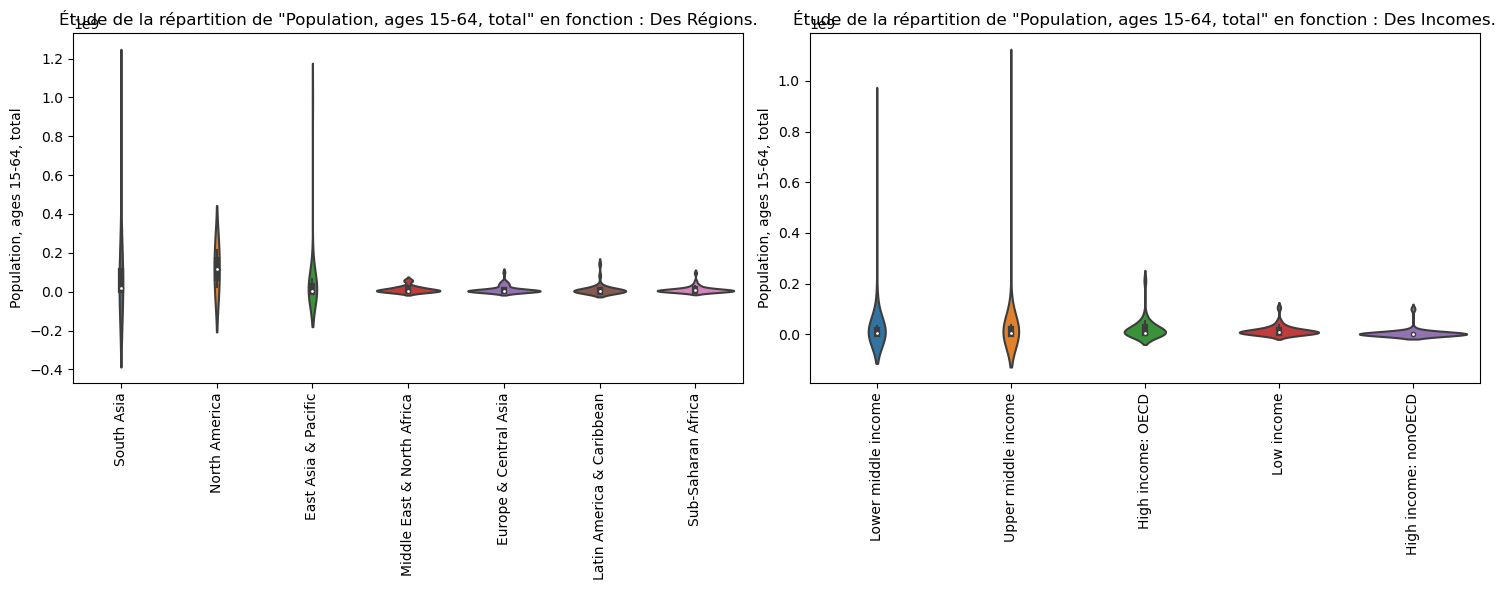

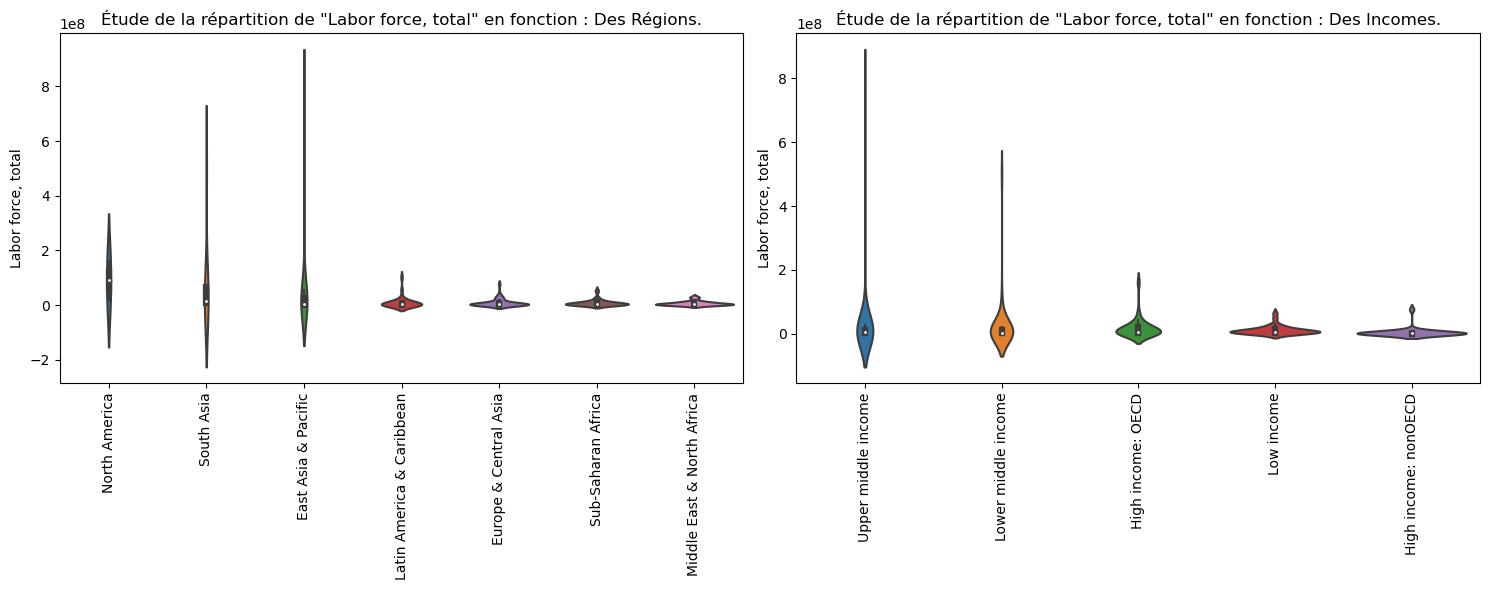

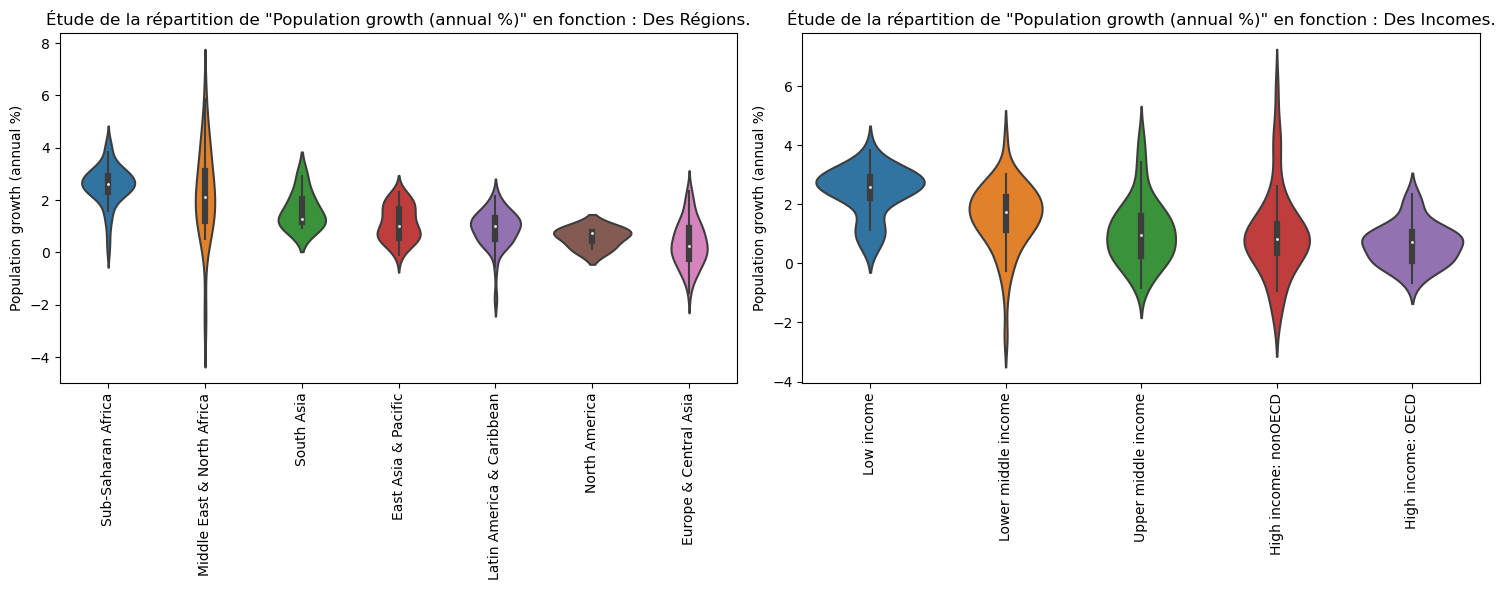

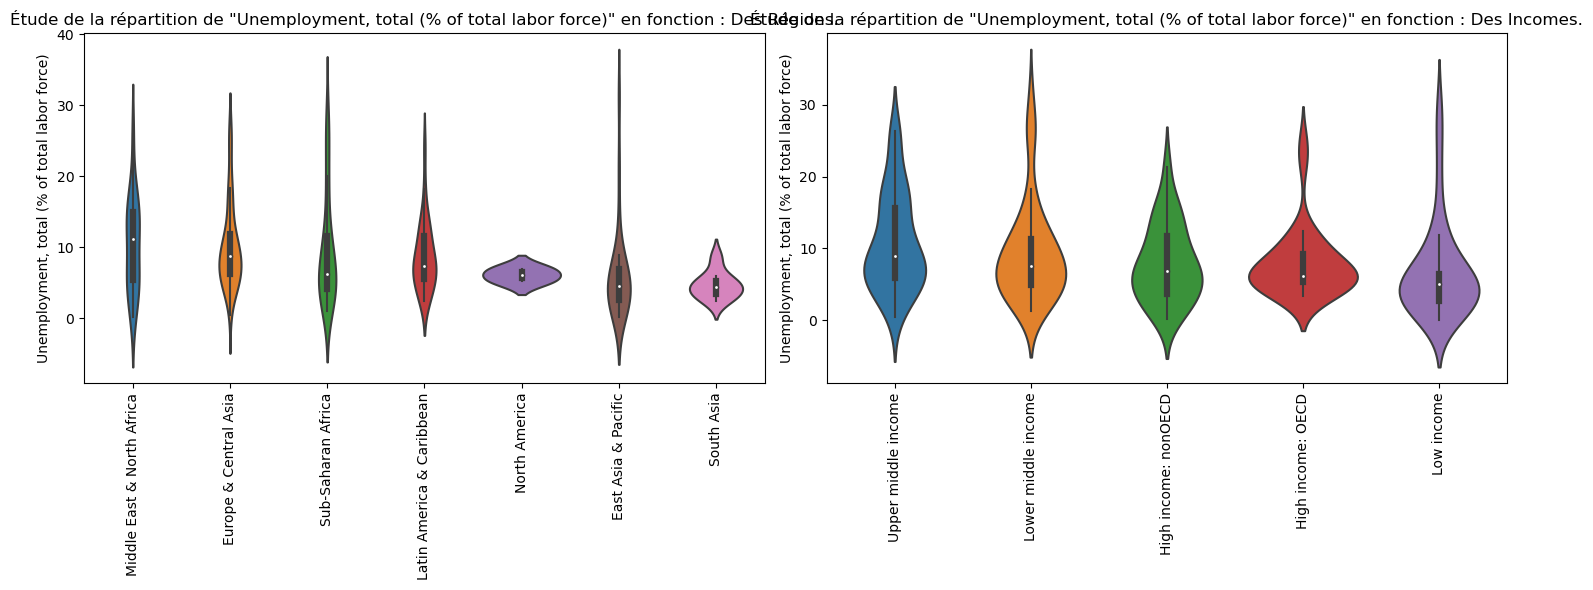

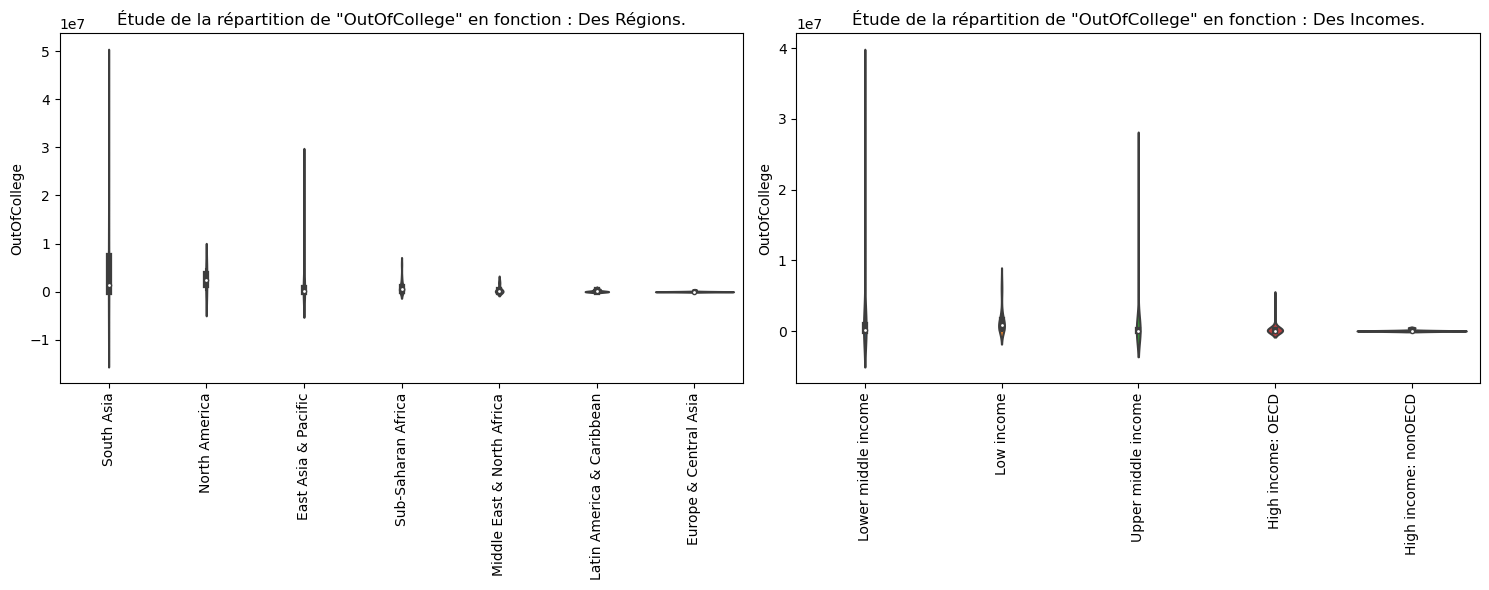

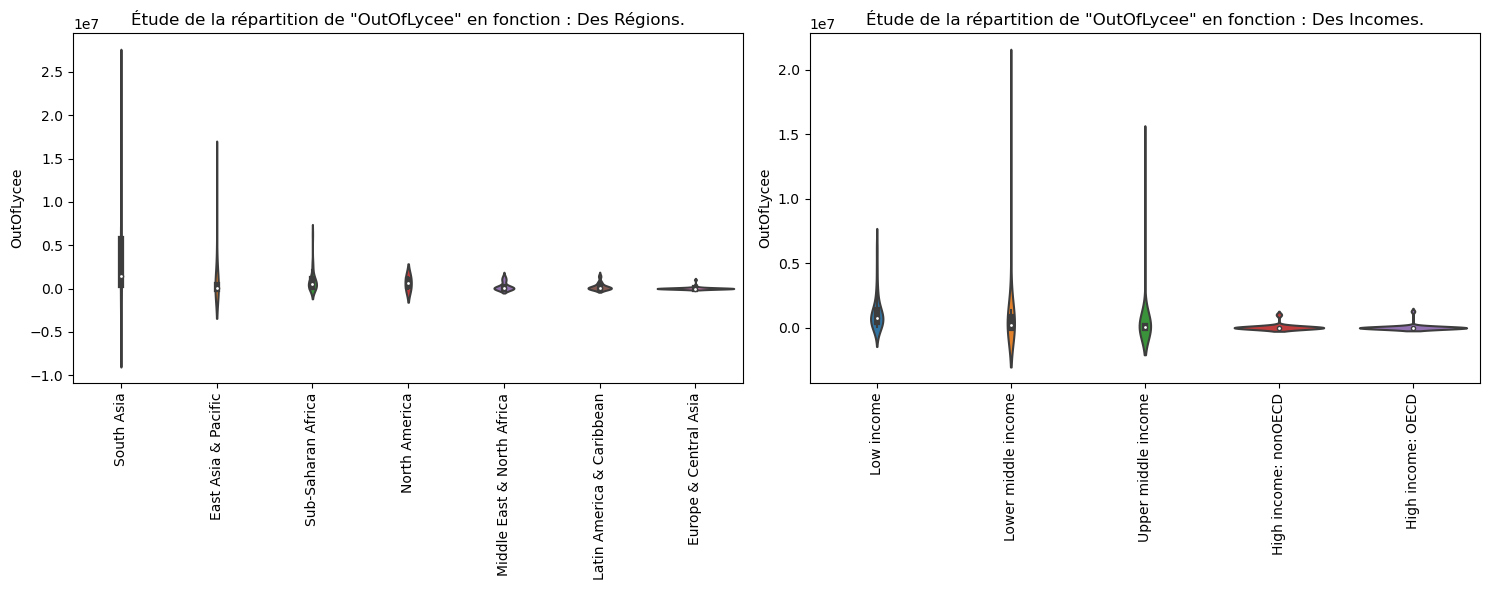

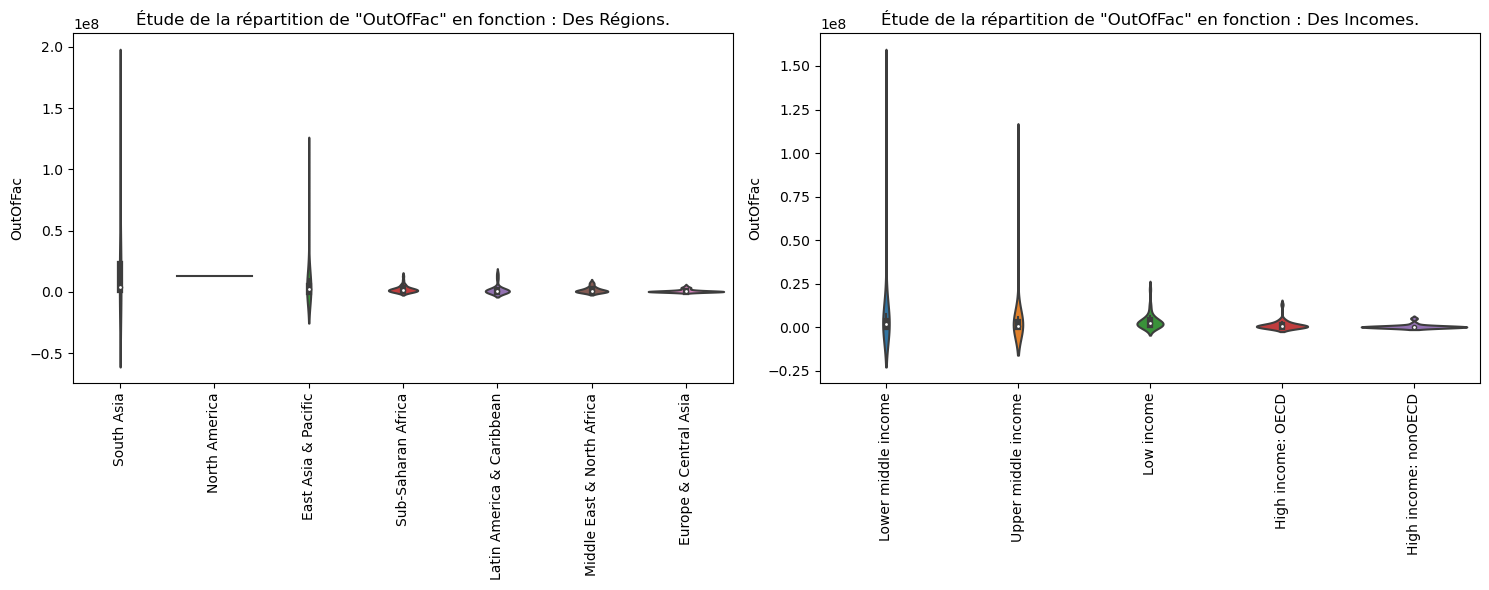

In [114]:
# Fonction pour tracer un graphique en violon
def plot_violinplot(data, x_col, y_col, order, title):
    # Crée une figure avec deux sous-graphiques côte à côte
    fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

    # Utilise Seaborn pour créer un graphique en violon pour la région
    sns.violinplot(data=data, x=x_col, y=y_col, order=order, ax=axes[0])
    
    # Ajoute un titre et des étiquettes aux axes
    axes[0].set_title(title + ' Des Régions.')
    axes[0].set_ylabel(y_col)
    axes[0].set_xlabel('')
    axes[0].tick_params(axis='x', rotation=90)
    
    # Détermine l'ordre pour les groupes de revenus
    order_income = data.set_index('Income Group').select_dtypes(exclude='object').reset_index().groupby('Income Group').mean().sort_values(y_col, ascending=False).index
    
    # Utilise Seaborn pour créer un graphique en violon pour le groupe de revenus
    sns.violinplot(data=data, x='Income Group', y=y_col, order=order_income, ax=axes[1])
    
    # Ajoute un titre et des étiquettes aux axes
    axes[1].set_title(title + ' Des Incomes.')
    axes[1].set_ylabel(y_col)
    axes[1].set_xlabel('')
    axes[1].tick_params(axis='x', rotation=90)
    
    # Ajuste la disposition pour éviter les chevauchements
    plt.tight_layout()
    
    # Affiche le graphique
    plt.show()

# Fonction principale pour étudier la distribution de plusieurs colonnes
def study_distribution(data, columns):
    for column in columns:
        # Détermine l'ordre pour les groupes de régions
        order_region = data.set_index('Region').select_dtypes(exclude='object').reset_index().groupby('Region').mean().sort_values(column, ascending=False).index

        # Appelle la fonction pour tracer les graphiques en violon
        title = f'Étude de la répartition de "{column}" en fonction :'
        plot_violinplot(data, 'Region', column, order_region, title)

# Liste des colonnes à étudier graphiquement
columns_to_study = Data_Pivot_2015.iloc[:, 3:].columns

# Appel de la fonction pour l'étude graphique des indicateurs
study_distribution(Data_Pivot_2015, columns_to_study)

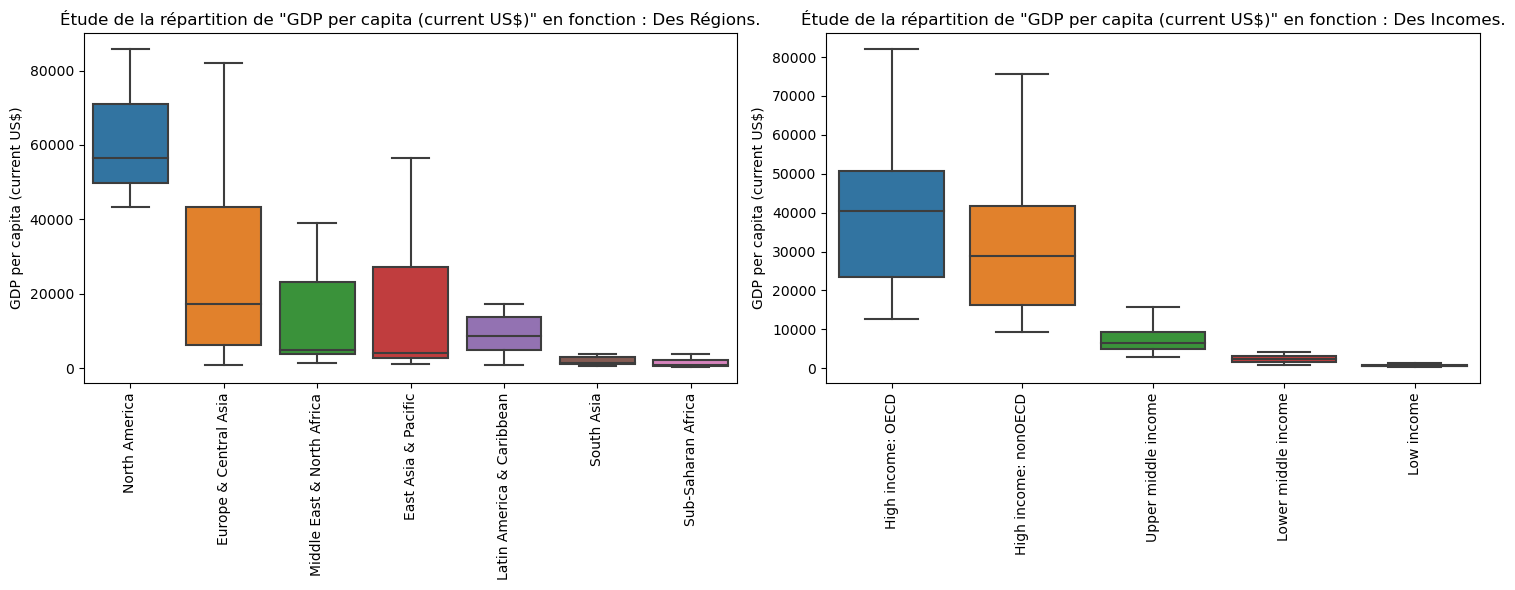

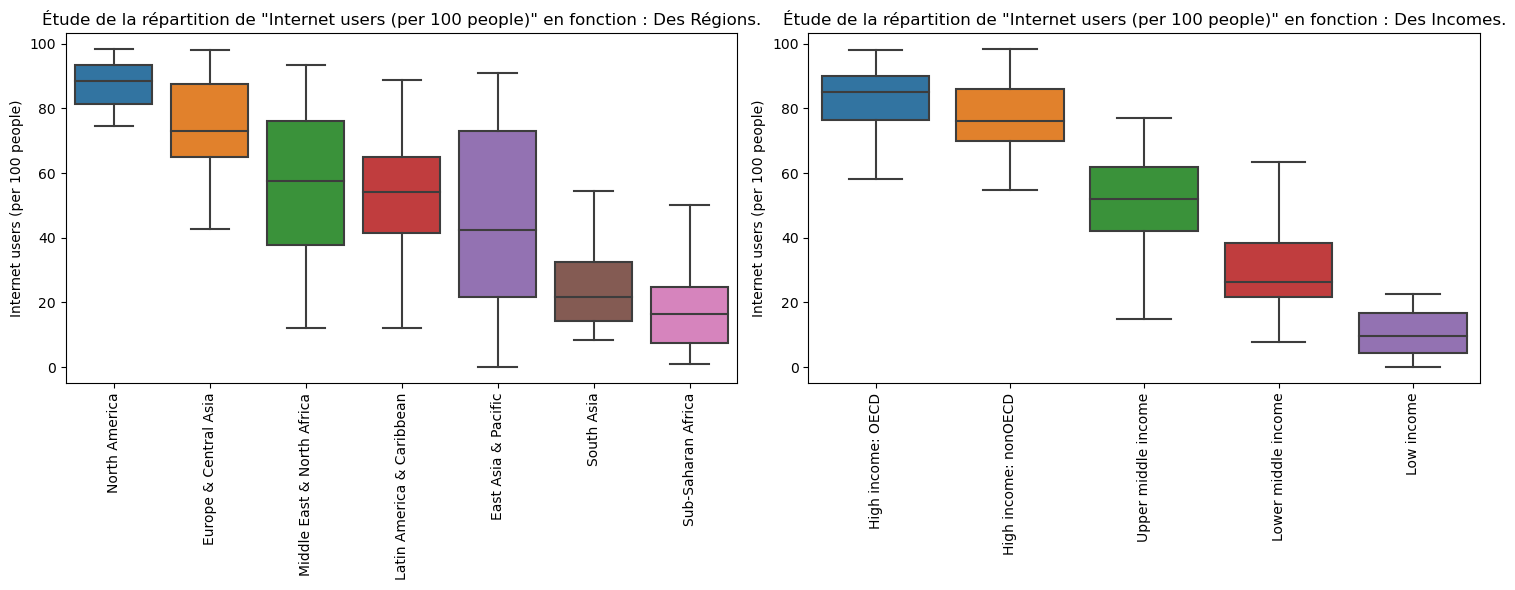

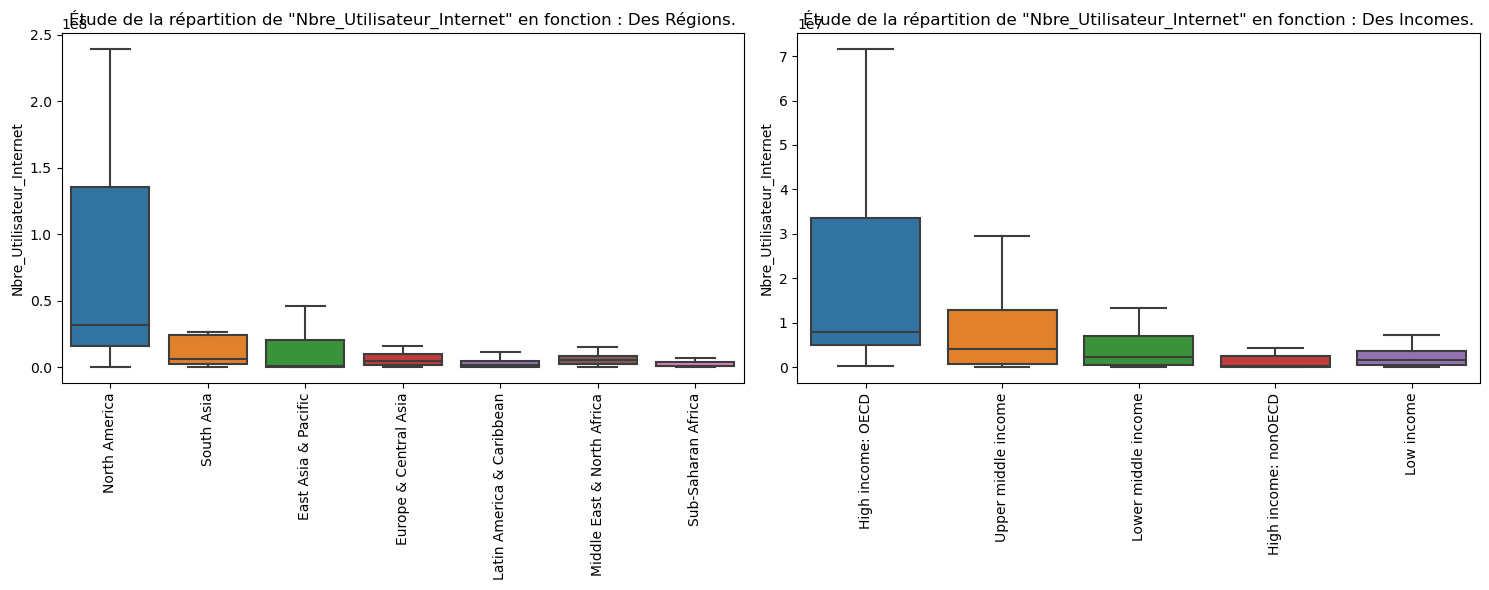

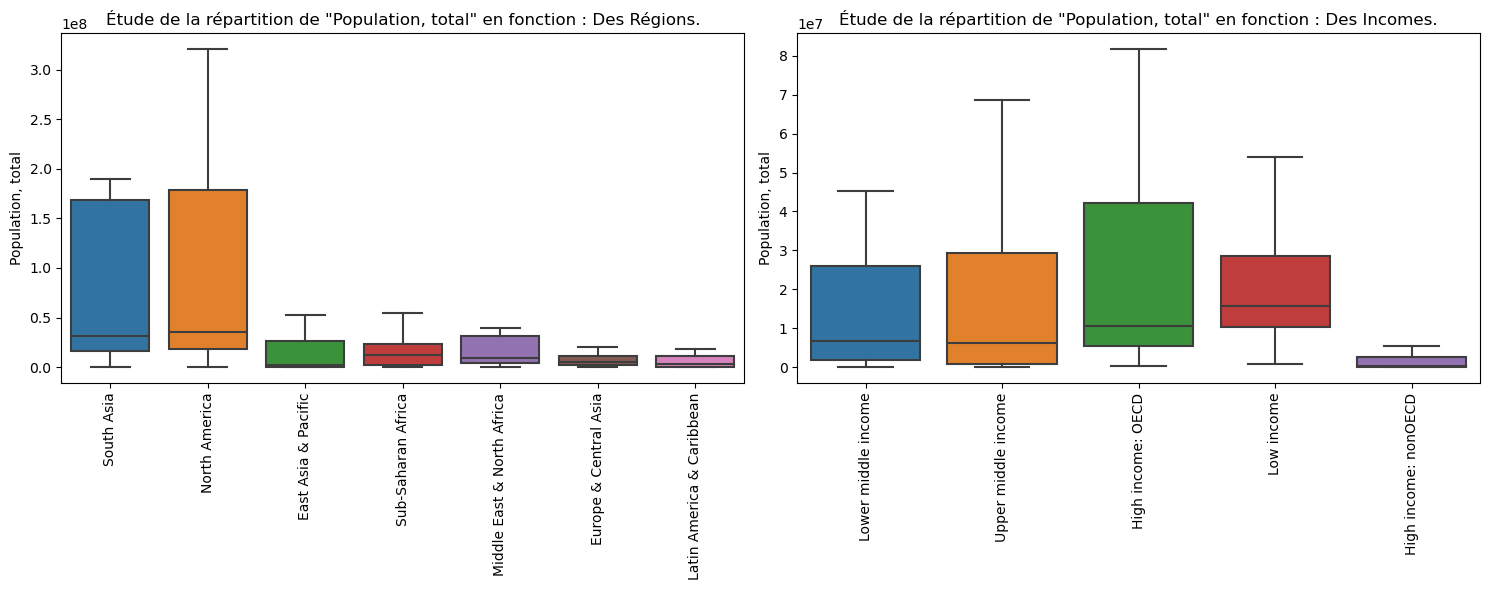

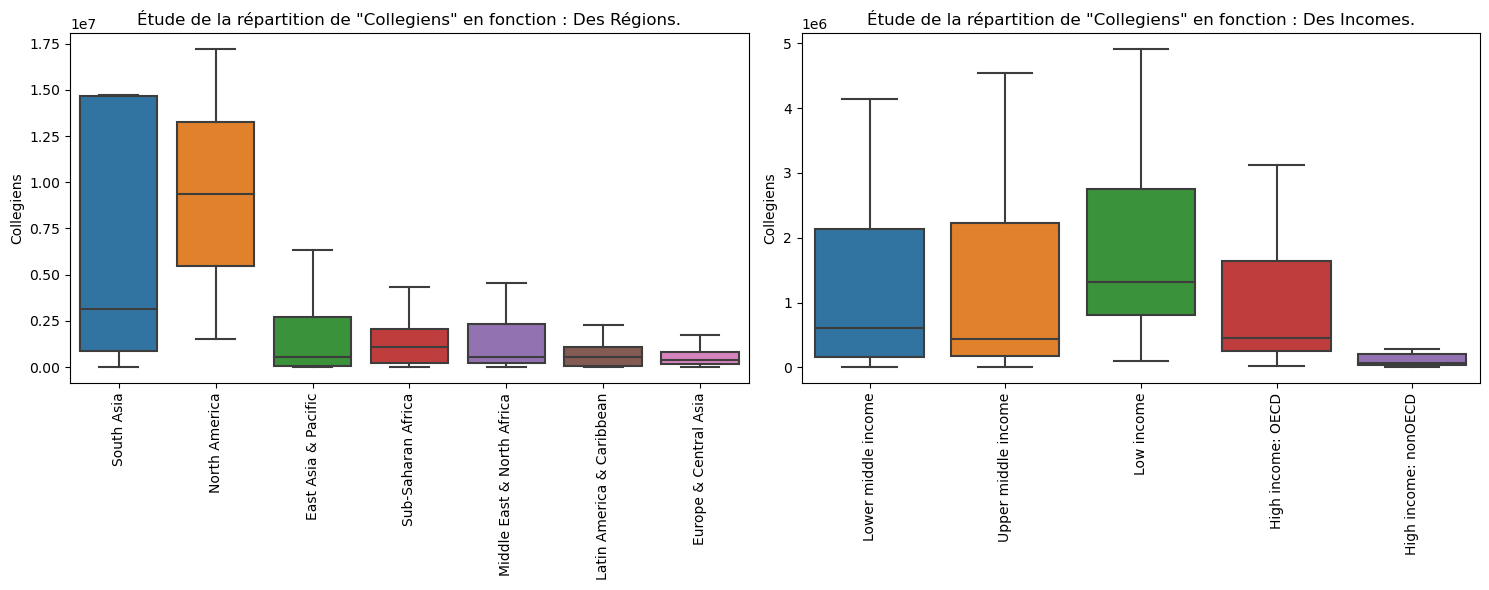

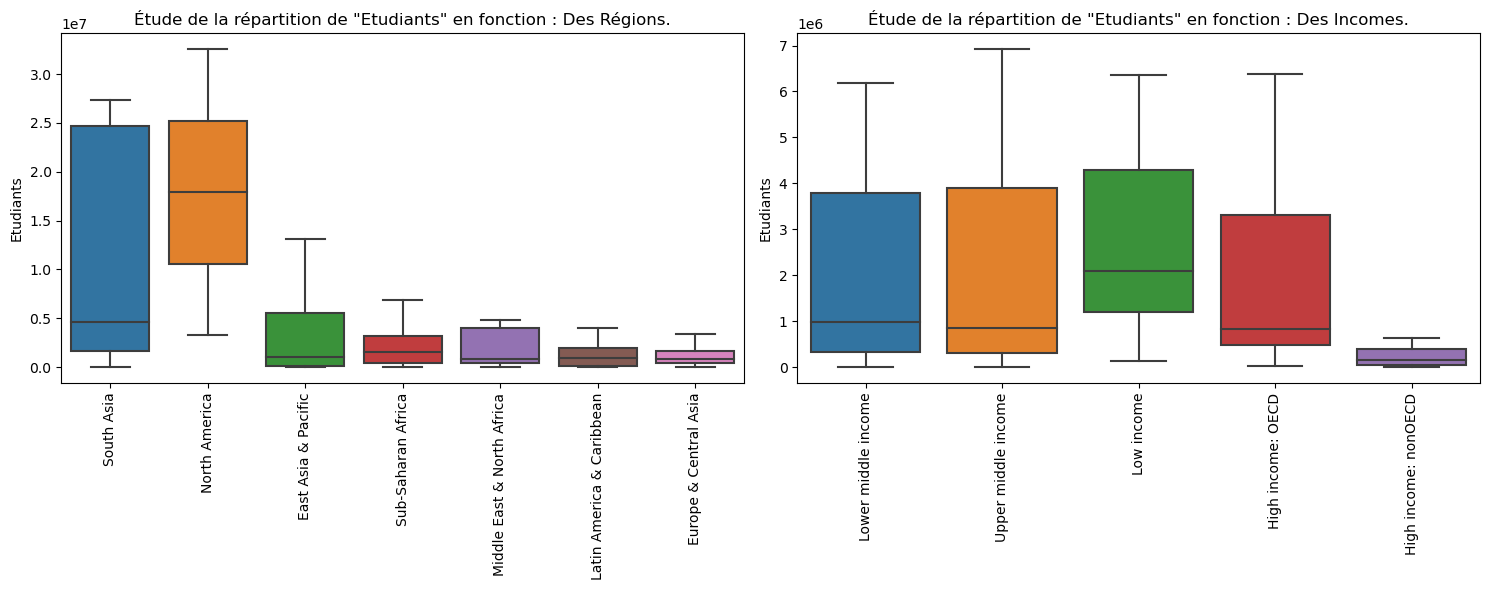

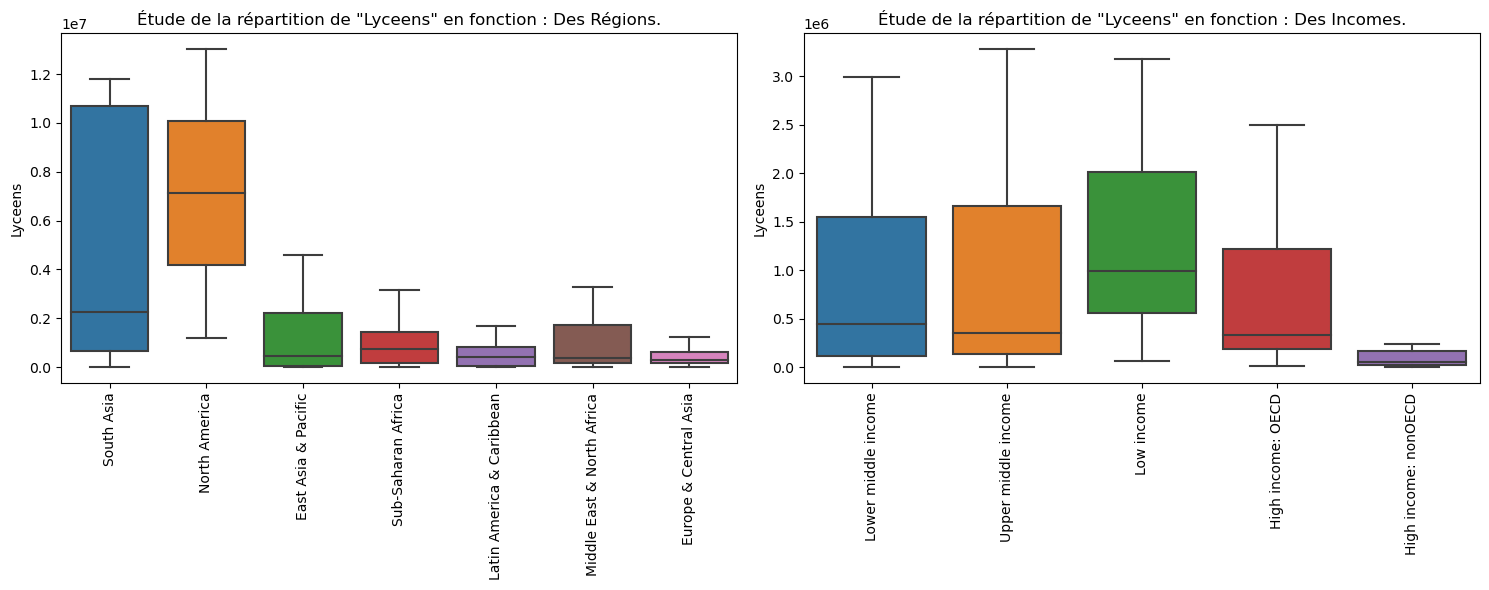

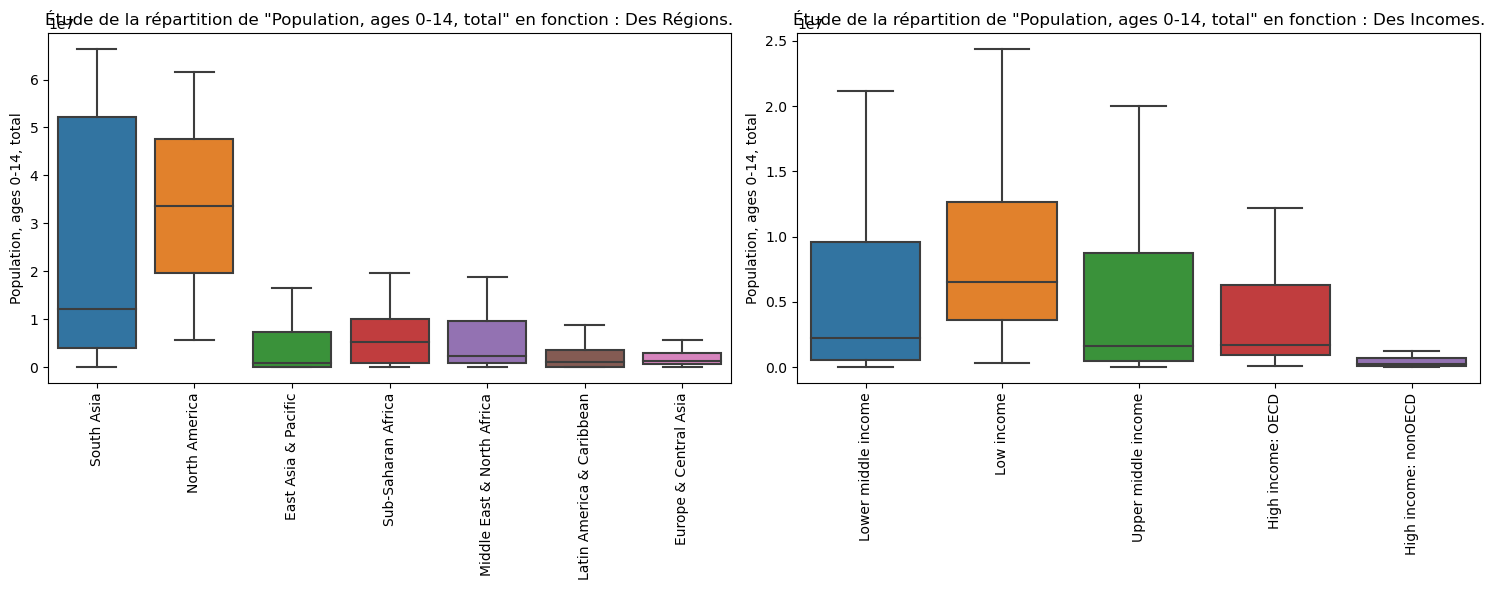

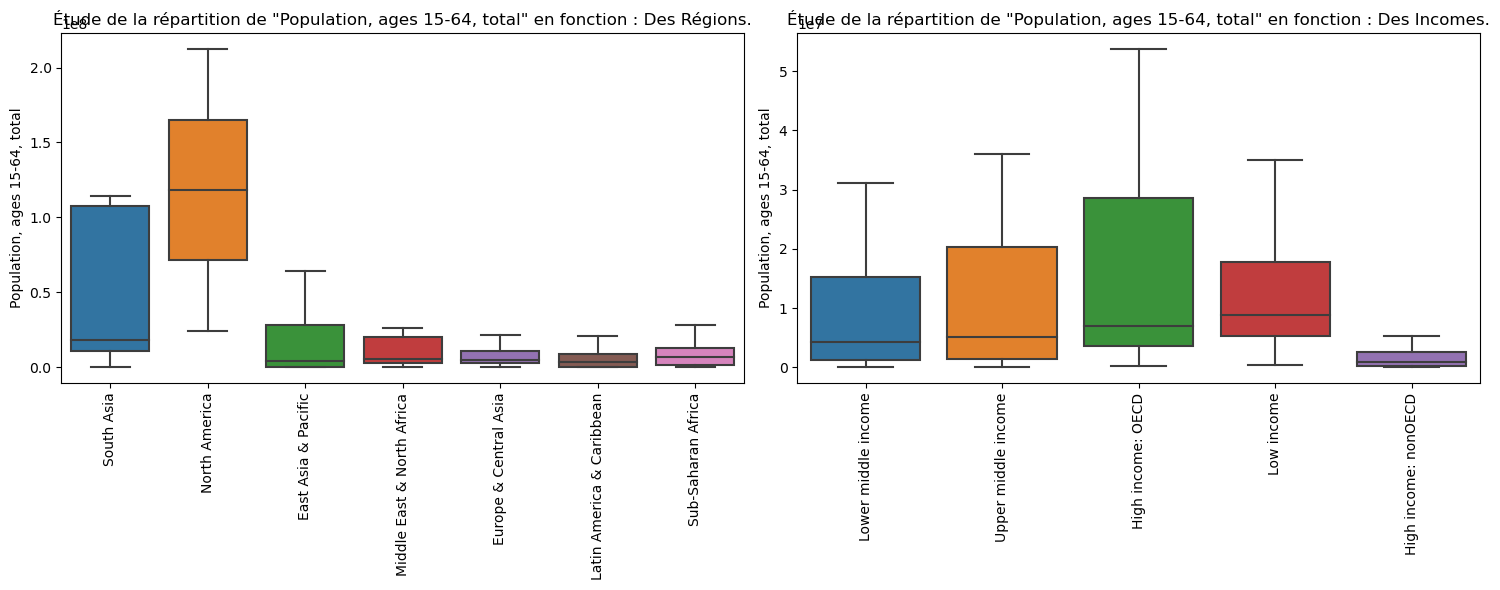

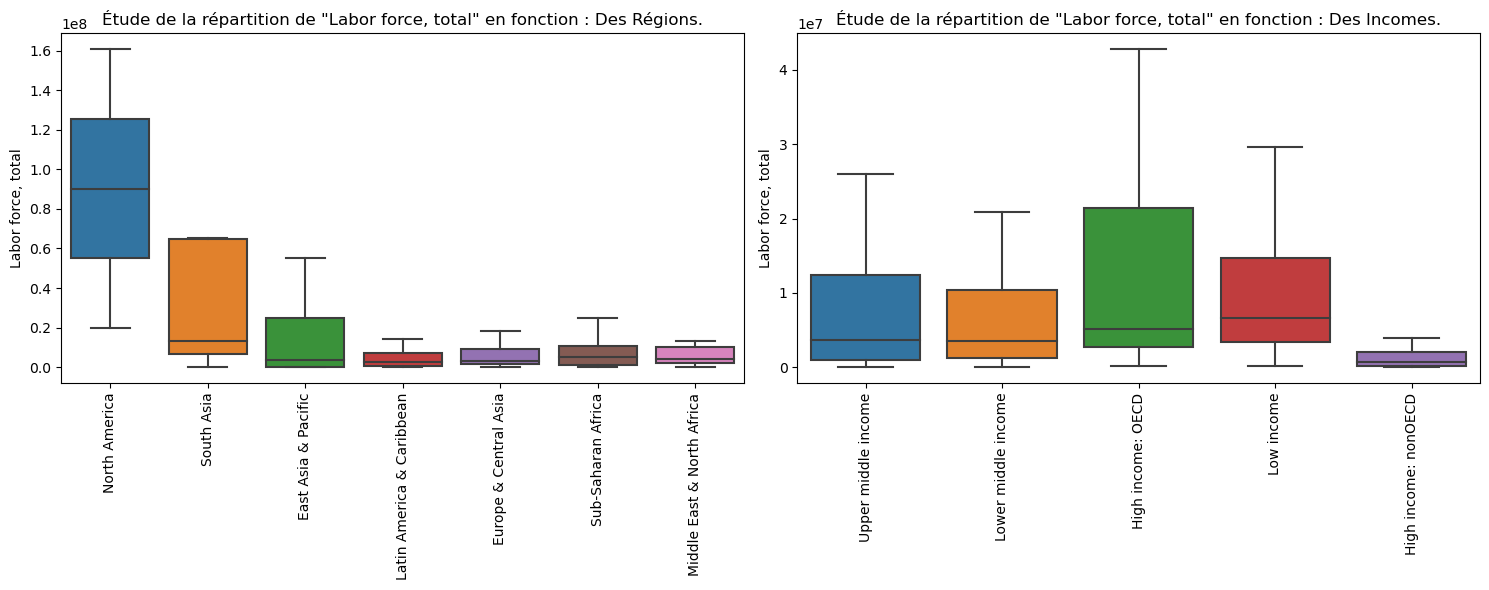

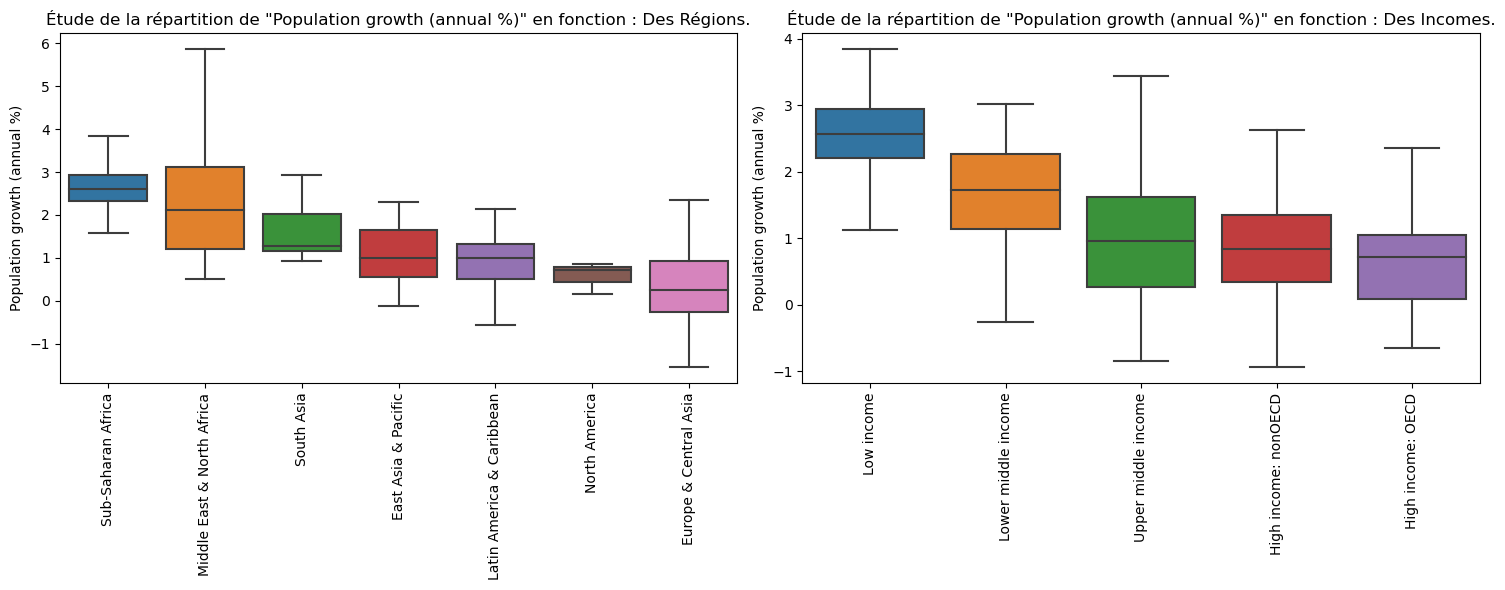

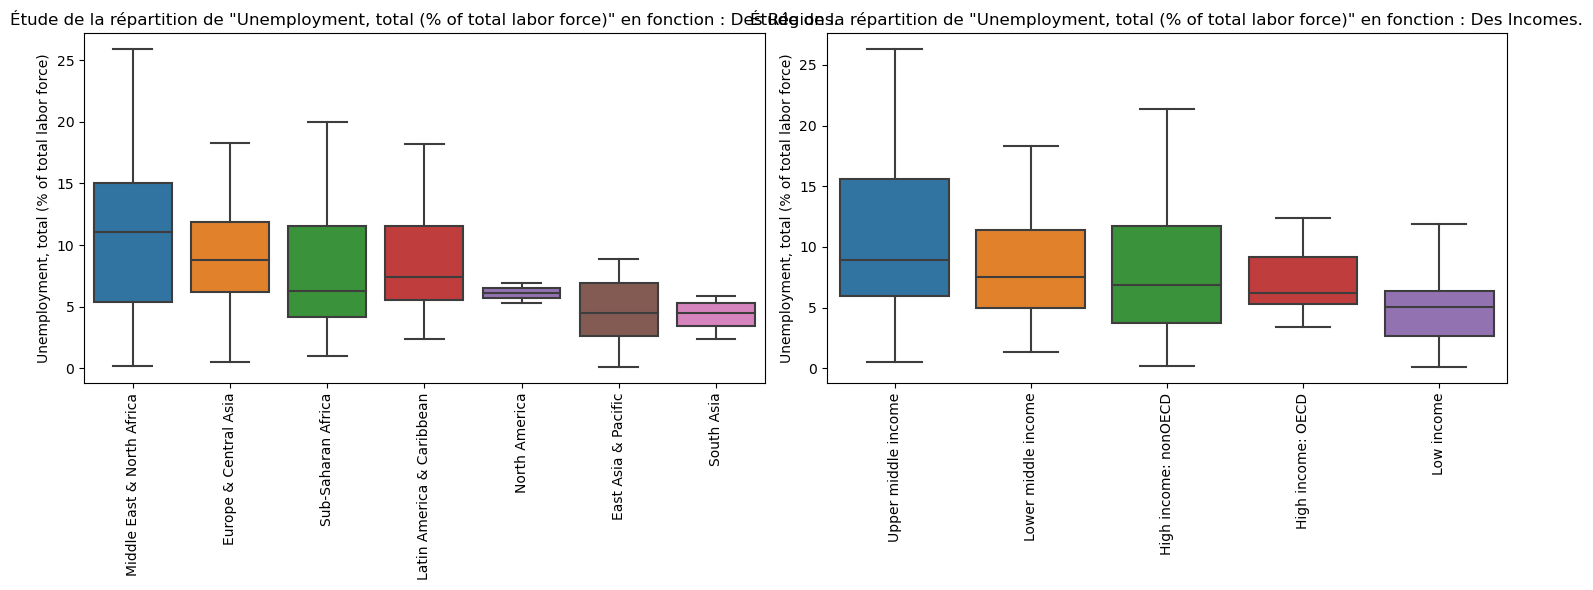

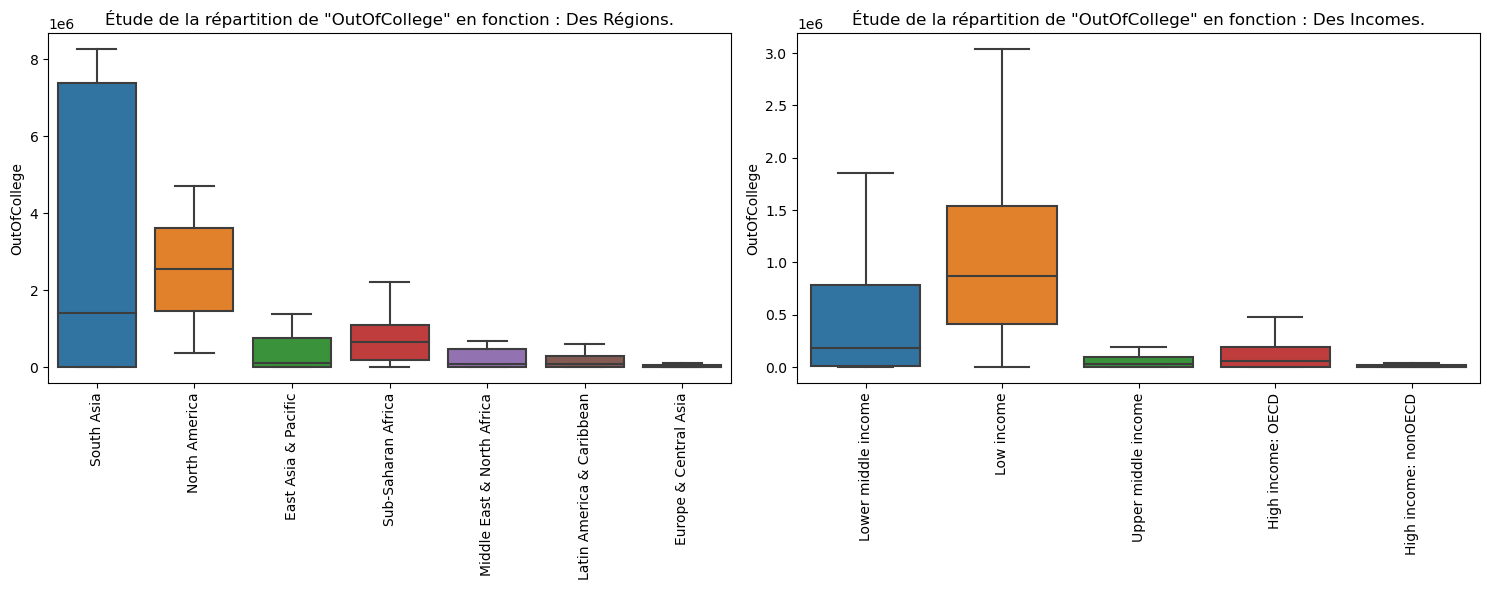

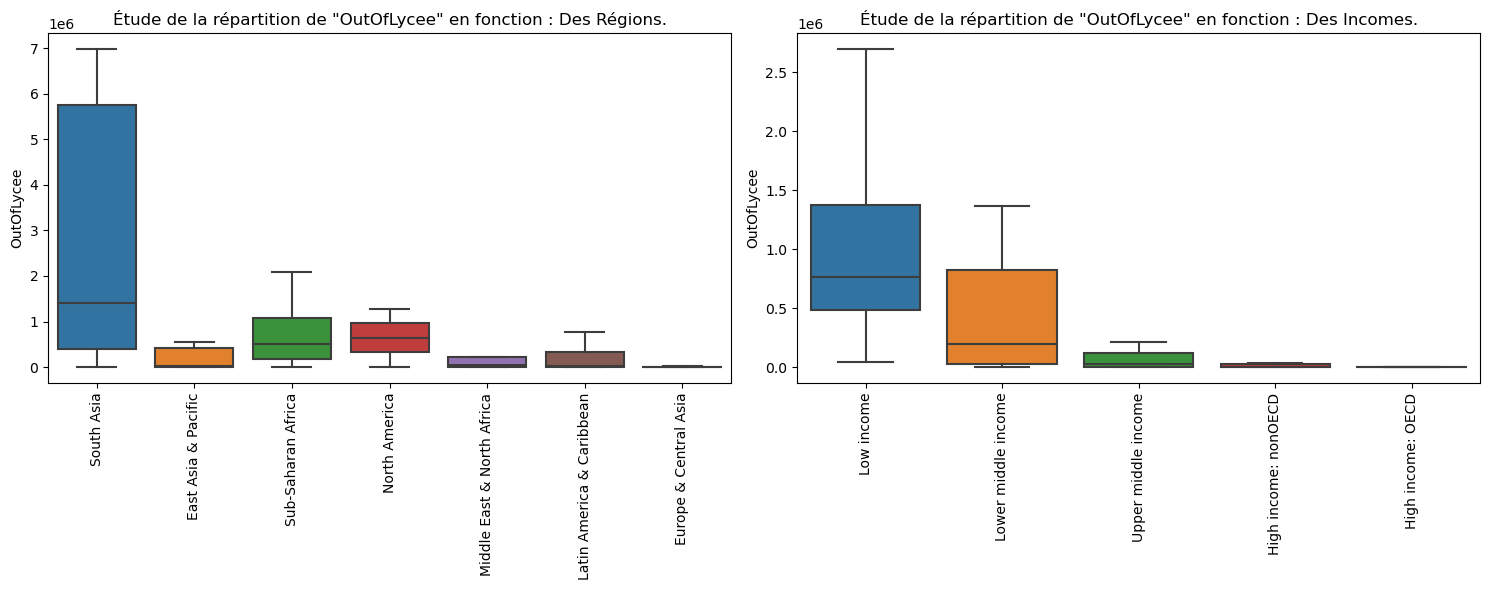

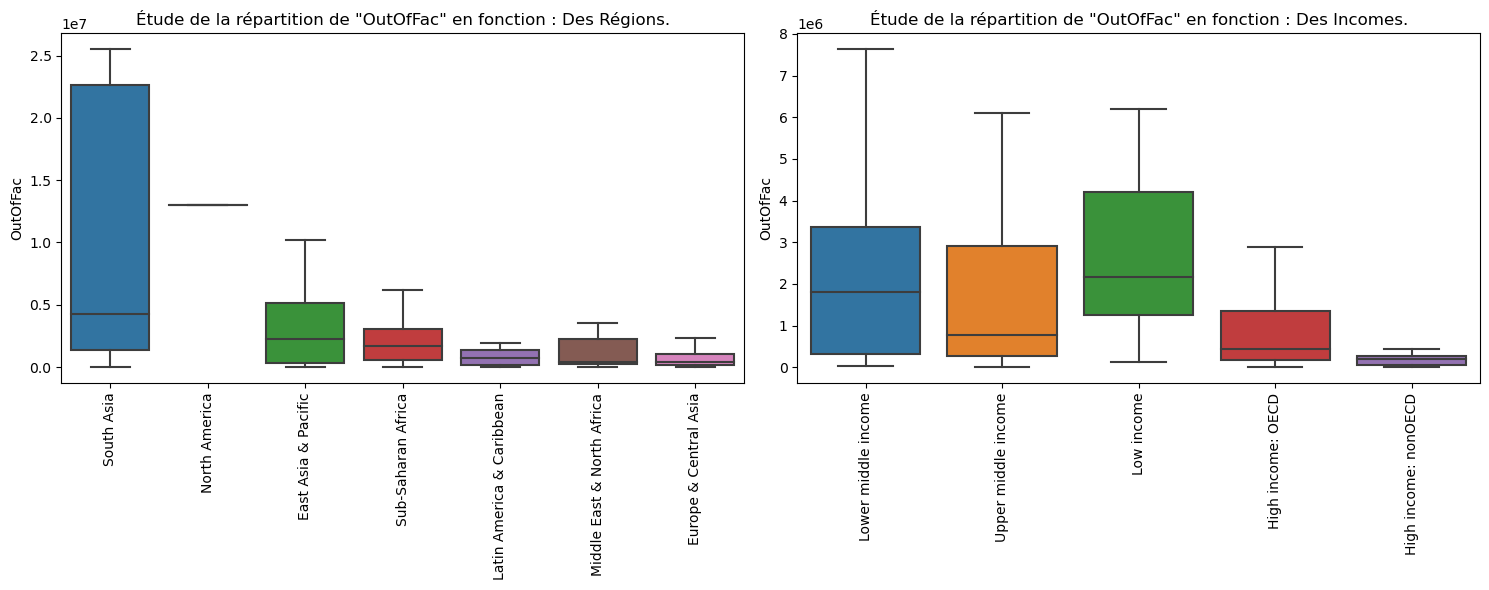

In [115]:
# Fonction pour tracer un graphique en boîte
def plot_boxplot(data, x_col, y_col, order, title):
    # Crée une figure avec deux sous-graphiques côte à côte
    fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

    # Utilise Seaborn pour créer un graphique en boîte pour la région
    sns.boxplot(data=data, x=x_col, y=y_col, showfliers=False, order=order, ax=axes[0])
    
    # Ajoute un titre et des étiquettes aux axes
    axes[0].set_title(title + ' Des Régions.')
    axes[0].set_ylabel(y_col)
    axes[0].set_xlabel('')
    axes[0].tick_params(axis='x', rotation=90)
    
    # Détermine l'ordre pour les groupes de revenus
    order_income = data.set_index('Income Group').select_dtypes(exclude='object').reset_index().groupby('Income Group').mean().sort_values(y_col, ascending=False).index
    
    # Utilise Seaborn pour créer un graphique en boîte pour le groupe de revenus
    sns.boxplot(data=data, x='Income Group', y=y_col, showfliers=False, order=order_income, ax=axes[1])
    
    # Ajoute un titre et des étiquettes aux axes
    axes[1].set_title(title + ' Des Incomes.')
    axes[1].set_ylabel(y_col)
    axes[1].set_xlabel('')
    axes[1].tick_params(axis='x', rotation=90)
    
    # Ajuste la disposition pour éviter les chevauchements
    plt.tight_layout()
    
    # Affiche le graphique
    plt.show()

# Fonction principale pour étudier la distribution de plusieurs colonnes
def study_distribution(data, columns):
    for column in columns:
        # Détermine l'ordre pour les groupes de régions
        order_region = data.set_index('Region').select_dtypes(exclude='object').reset_index().groupby('Region').mean().sort_values(column, ascending=False).index

        # Appelle la fonction pour tracer les graphiques en boîte à moustache
        title = f'Étude de la répartition de "{column}" en fonction :'
        plot_boxplot(data, 'Region', column, order_region, title)

# Liste des colonnes à étudier graphiquement
columns_to_study = Data_Pivot_2015.iloc[:, 3:].columns

# Appel de la fonction pour l'étude graphique des indicateurs
study_distribution(Data_Pivot_2015, columns_to_study)

- **Les revenus (Incomes) élevés se distinguent par une utilisation plus élevée d'Internet, en moyenne.**


- **Comme prévu, les revenus élevés sont en moyenne associés aux pays affichant le PIB par habitant le plus élevé.**


- **Les zones d'Amérique du Nord et d'Asie du Sud se distinguent par la présence, en moyenne, des pays les plus peuplés.**


- **Les zones d'Amérique du Nord, d'Asie centrale et d'Europe se démarquent, en moyenne, par une utilisation plus élevée d'Internet.**


- **Les revenus (Incomes) affichant, en moyenne, les populations les plus élevées sont ceux caractérisés par un revenu moyen.**


- **Les zones d'Amérique du Nord, d'Europe et d'Asie centrale se démarquent, en moyenne, par la présence des pays affichant le PIB par habitant le plus élevé.**

## V- Analyse des besoins de l'entreprise.

Comme démontré dans l'analyse exploratoire des données, les nations qui font le plus usage d'Internet sont celles dotées de revenus élevés, et dans une moindre mesure, avec une disparité plus marquée, les pays de la classe moyenne supérieure (Lower middle Income). En conséquence, je prévois d'examiner exclusivement les données relatives aux classes supérieures, sous réserve de confirmation par l'entreprise.

In [116]:
# Filtre des données pour créer une table des pays riches

# Définition du filtre pour les pays à revenu élevé (High income: nonOECD ou High income: OECD)
high_income_filter = (Data_Pivot_2015['Income Group'] == 'High income: nonOECD') | (Data_Pivot_2015['Income Group'] == 'High income: OECD')

# Application du filtre pour extraire les lignes correspondantes
Data_pays_riches_2015 = Data_Pivot_2015[high_income_filter]
Data_pays_riches_2015

Indicator Name               Country Name                      Region  \
4                                 Andorra       Europe & Central Asia   
6                     Antigua and Barbuda   Latin America & Caribbean   
9                                   Aruba   Latin America & Caribbean   
10                              Australia         East Asia & Pacific   
11                                Austria       Europe & Central Asia   
13                           Bahamas, The   Latin America & Caribbean   
14                                Bahrain  Middle East & North Africa   
16                               Barbados   Latin America & Caribbean   
18                                Belgium       Europe & Central Asia   
21                                Bermuda               North America   
27                      Brunei Darussalam         East Asia & Pacific   
34                                 Canada               North America   
35                         Cayman Islands   Latin America & Caribbean   
38                        Channel Islands       Europe & Central Asia   
39                                  Chile   Latin America & Caribbean   
47                                Croatia       Europe & Central Asia   
49                                Curacao   Latin America & Caribbean   
50                                 Cyprus       Europe & Central Asia   
51                         Czech Republic       Europe & Central Asia   
52                                Denmark       Europe & Central Asia   
59                      Equatorial Guinea          Sub-Saharan Africa   
61                                Estonia       Europe & Central Asia   
63                          Faroe Islands       Europe & Central Asia   
65                                Finland       Europe & Central Asia   
66                                 France       Europe & Central Asia   
67                       French Polynesia         East Asia & Pacific   
71                                Germany       Europe & Central Asia   
73                                 Greece       Europe & Central Asia   
74                              Greenland       Europe & Central Asia   
76                                   Guam         East Asia & Pacific   
83                   Hong Kong SAR, China         East Asia & Pacific   
85                                Iceland       Europe & Central Asia   
90                                Ireland       Europe & Central Asia   
91                            Isle of Man       Europe & Central Asia   
92                                 Israel  Middle East & North Africa   
93                                  Italy       Europe & Central Asia   
95                                  Japan         East Asia & Pacific   
101                           Korea, Rep.         East Asia & Pacific   
103                                Kuwait  Middle East & North Africa   
106                                Latvia       Europe & Central Asia   
111                         Liechtenstein       Europe & Central Asia   
112                             Lithuania       Europe & Central Asia   
113                            Luxembourg       Europe & Central Asia   
114                      Macao SAR, China         East Asia & Pacific   
121                                 Malta  Middle East & North Africa   
128                                Monaco       Europe & Central Asia   
136                           Netherlands       Europe & Central Asia   
137                         New Caledonia         East Asia & Pacific   
138                           New Zealand         East Asia & Pacific   
142              Northern Mariana Islands         East Asia & Pacific   
143                                Norway       Europe & Central Asia   
144                                  Oman  Middle East & North Africa   
152                                Poland       Europe & Central Asia   
153                              Portugal       Europe & C

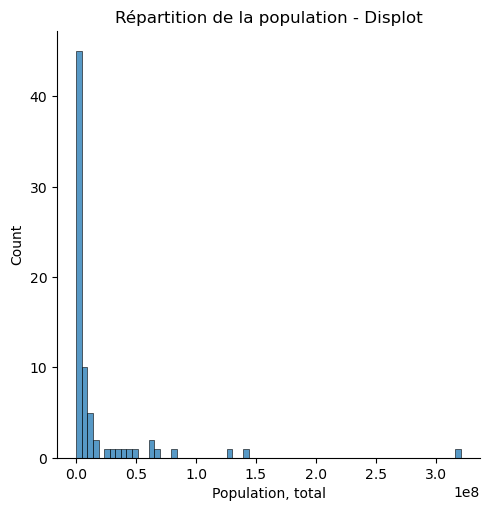

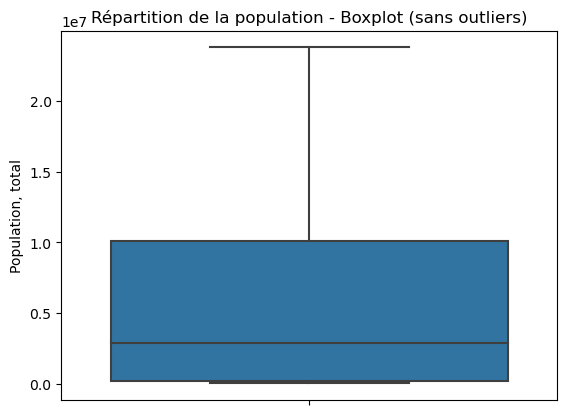

In [117]:
# Distribution de la répartition de la population

# Utilisation de displot pour visualiser la distribution de la population
sns.displot(Data_pays_riches_2015['Population, total'])
plt.title('Répartition de la population - Displot')
plt.show()

# Utilisation de boxplot pour visualiser la répartition de la population sans les outliers
sns.boxplot(y=Data_pays_riches_2015['Population, total'], showfliers=False)
plt.title('Répartition de la population - Boxplot (sans outliers)')
plt.show()

- **Nous observons une concentration de pétit pays sur le premier graphique(displot)**

In [118]:
# Mesure des quartiles de la population totale pour les pays riches
quartiles_population_riche = Data_pays_riches_2015['Population, total'].describe().round()
print(quartiles_population_riche)

count           75.0
mean      17318900.0
std       44617004.0
min          31264.0
25%         162778.0
50%        2904910.0
75%       10078631.0
max      320896618.0
Name: Population, total, dtype: float64


- **Un quart soit (25%) des pays présents dans ce DataFrame ont une population inférieure à 160 000 habitants, et la moitié soit (50%) de ces pays ont une population inférieure à 3 millions d'habitants.**

- **je vais choisir de conserver uniquement les pays dont la population est égale ou supérieure à la médiane. Cette décision vise à exclure les pays les plus petits qui ne représentent pas un nombre suffisamment important de clients potentiels pour l'entreprise.**

In [119]:
# Sélection des pays avec une population supérieure ou égale à la médiane
population_mediane = Data_pays_riches_2015['Population, total'].median()
Data_pays_riches_2015 = Data_pays_riches_2015[Data_pays_riches_2015['Population, total'] >= population_mediane]
#Data_pays_riches_2015

In [120]:
Data_pays_riches_2015.describe()

Indicator Name  GDP per capita (current US$)  Internet users (per 100 people)  \
count                              38.000000                        38.000000   
mean                            35329.900526                        80.023421   
std                             17894.248195                         9.961994   
min                              9329.300000                        58.140000   
25%                             18366.242500                        71.887500   
50%                             36109.020000                        79.795000   
75%                             44293.057500                        88.062500   
max                             82016.020000                        96.810000   

Indicator Name  Nbre_Utilisateur_Internet  Population, total    Collegiens  \
count                        3.800000e+01       3.800000e+01  3.700000e+01   
mean                         2.675154e+07       3.370887e+07  1.533820e+06   
std                          4.499669e+07       5.849527e+07  2.951164e+06   
min                          2.073467e+06       2.904910e+06  1.255320e+05   
25%                          4.463908e+06       5.437734e+06  2.414020e+05   
50%                          7.613387e+06       1.007863e+07  4.184260e+05   
75%                          3.024385e+07       3.745196e+07  1.764282e+06   
max                          2.392419e+08       3.208966e+08  1.719932e+07   

Indicator Name     Etudiants       Lyceens  Population, ages 0-14, total  \
count           3.700000e+01  3.700000e+01                  3.800000e+01   
mean            2.992987e+06  1.171548e+06                  5.668787e+06   
std             5.629226e+06  2.230389e+06                  1.066729e+07   
min             3.222890e+05  1.075260e+05                  4.240070e+05   
25%             4.995040e+05  1.868510e+05                  9.211485e+05   
50%             8.188940e+05  3.213190e+05                  1.584848e+06   
75%             3.386991e+06  1.232097e+06                  6.625252e+06   
max             3.254673e+07  1.301754e+07                  6.165342e+07   

Indicator Name  Population, ages 15-64, total  Labor force, total  \
count                            3.800000e+01        3.800000e+01   
mean                             2.238361e+07        1.700269e+07   
std                              3.862492e+07        2.959325e+07   
min                              1.938118e+06        1.178300e+06   
25%                              3.514168e+06        2.744476e+06   
50%                              6.902254e+06        5.091511e+06   
75%                              2.588472e+07        1.938833e+07   
max                              2.122628e+08        1.607678e+08   

Indicator Name  Population growth (annual %)  \
count                              38.000000   
mean                                0.766842   
std                                 1.306222   
min                                -1.760000   
25%                                 0.122500   
50%                                 0.720000   
75%                                 1.067500   
max                                 5.860000   

Indicator Name  Unemployment, total (% of total labor force)  OutOfCollege  \
count                                              38.000000  3.600000e+01   
mean                                                8.015789  2.596227e+05   
std                                                 5.036544  7.923623e+05   
min                                                 1.700000  0.000000e+00   
25%                                                 5.075000  0.000000e+00   
50%                                                 6.200000  5.369550e+04   
75%                                                 9.400000  1.673642e+05   
max                                                24.900000  4.705861e+06   

Indicator Name    OutOfLycee      OutOfFac  
count           3.600000e+01  3.600000e+01  
mean            7.053103e+04  1.37

- **Bien que des valeurs aberrantes persistent (représentant 10% pour Internet), des nations de grande envergure ainsi que des pays à la richesse substantielle demeurent présents. Cependant, ces éléments ne sont pas préjudiciables à l'analyse.**

In [121]:
# Vérification de la présence de valeurs manquantes dans le DataFrame "Data_pays_riches_2015"
for colonne in Data_pays_riches_2015.columns:
    try:
        # Affichage du premier pays avec une valeur manquante pour chaque colonne
        valeur_manquante = Data_pays_riches_2015[Data_pays_riches_2015[colonne].isna()][['Country Name', colonne]].values[0][0]
        print(f"Pour la colonne '{colonne}', valeur manquante dans le pays : {valeur_manquante}")
    except IndexError:
        pass
    
print()

Pour la colonne 'Collegiens', valeur manquante dans le pays : Puerto Rico
Pour la colonne 'Etudiants', valeur manquante dans le pays : Puerto Rico
Pour la colonne 'Lyceens', valeur manquante dans le pays : Puerto Rico
Pour la colonne 'OutOfCollege', valeur manquante dans le pays : Puerto Rico
Pour la colonne 'OutOfLycee', valeur manquante dans le pays : Puerto Rico
Pour la colonne 'OutOfFac', valeur manquante dans le pays : Canada



In [122]:
# Élimination des lignes contenant des valeurs manquantes
Data_pays_riches_2015 = Data_pays_riches_2015.dropna()

In [123]:
# Affichage de la liste des pays
liste_pays = list(Data_pays_riches_2015['Country Name'])
print(liste_pays, end=" ")

# Affectation de la liste des pays à la variable 'liste'
liste = Data_pays_riches_2015['Country Name']

['Australia', 'Austria', 'Belgium', 'Chile', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong SAR, China', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait', 'Lithuania', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Poland', 'Portugal', 'Russian Federation', 'Saudi Arabia', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay'] 

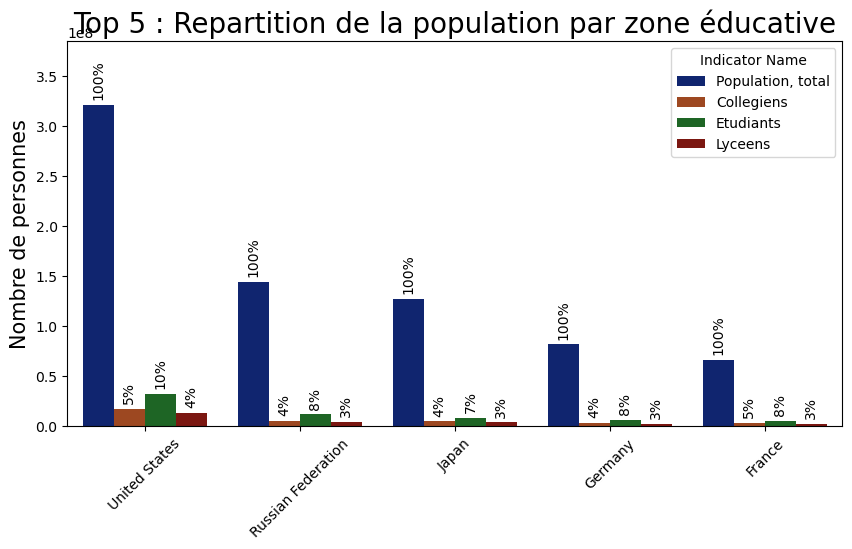

In [124]:
# Création d'un DataFrame pour la visualisation sous forme de graphiques
Graph = Data_pays_riches_2015.sort_values(by = 'Population, total', ascending = False)

# Ajout de colonnes pour les pourcentages de chaque indicateur éducatif
Graph['Pourcentage_Pop_Total'] = '100%'
Graph['Pourcentage_Collegiens'] = (round((Graph['Collegiens']*100)/Graph['Population, total'])).astype(int).astype(str)+'%'
Graph['Pourcentage_Lyceens'] = (round((Graph['Lyceens']*100)/Graph['Population, total'])).astype(int).astype(str)+"%"
Graph['Pourcentage_Etudiants'] = (round((Graph['Etudiants']*100)/Graph['Population, total'])).astype(int).astype(str)+'%'
Graph = Graph.iloc[:5,:]

# Création d'un DataFrame pour la visualisation en barres
Graphvalues = Graph.set_index('Country Name').iloc[:,5:9].stack().reset_index(name='Valeur').rename(columns={'level_1':'X'}) # inverse du pivot.

# Création du graphique en barres
ax = plt.figure(figsize=(10,5))
ax = sns.barplot(data = Graphvalues, x = 'Country Name', y = 'Valeur', hue = 'Indicator Name',palette="dark")
plt.xlabel('')
plt.ylabel('Nombre de personnes', size = 15)
plt.title('Top 5 : Repartition de la population par zone éducative', size = 20)
plt.xticks(rotation = 45)

# Ajout des étiquettes pour chaque barre
ax.bar_label(ax.containers[0], labels = list(Graph['Pourcentage_Pop_Total']), padding=4, rotation=90)
ax.bar_label(ax.containers[1], labels = list(Graph['Pourcentage_Collegiens']), padding=4, rotation=90)
ax.bar_label(ax.containers[3], labels = list(Graph['Pourcentage_Lyceens']), padding=4, rotation=90)
ax.bar_label(ax.containers[2], labels = list(Graph['Pourcentage_Etudiants']), padding=4, rotation=90)

ax.margins(y=0.2)

plt.show()

Choisissez un indicateur dans cette liste : GDP per capita (current US$) -- Internet users (per 100 people) -- Nbre_Utilisateur_Internet -- Population, total -- Collegiens -- Etudiants -- Lyceens -- Population, ages 0-14, total -- Population, ages 15-64, total -- Labor force, total -- Population growth (annual %) -- Unemployment, total (% of total labor force) -- OutOfCollege -- OutOfLycee -- OutOfFac GDP per capita (current US$)


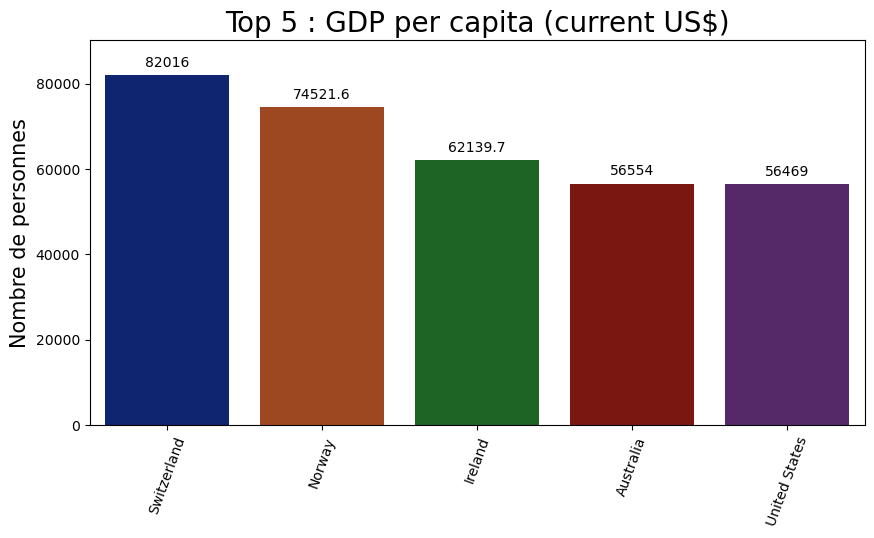

In [170]:
# Création d'une chaîne de caractères contenant la liste des indicateurs
liste_indicateur = ' -- '.join(list(Data_pays_riches_2015.iloc[:, 3:].columns))

# Demande à l'utilisateur de choisir un indicateur parmi la liste
indicateur = input('Choisissez un indicateur dans cette liste : {} '.format(liste_indicateur))

try:
    # Sélection des données pour l'indicateur choisi, tri et extraction des 5 premières lignes
    graph = Data_pays_riches_2015[['Country Name', indicateur]]
    graph = graph.set_index('Country Name').sort_values(indicateur, ascending=False).iloc[:5].reset_index()

    # Création du graphique en barres
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=graph, x='Country Name', y=indicateur, palette="dark")
    ax.bar_label(ax.containers[0], padding=4)
    plt.xlabel('')
    plt.ylabel('Nombre de personnes', size=15)
    plt.title('Top 5 : {}'.format(indicateur), size=20)
    plt.xticks(rotation=70)
    ax.margins(y=0.1)
    plt.show()

except KeyError:
    # Si l'indicateur choisi n'existe pas, en choisir un au hasard parmi la liste
    indicateur = random.choice(liste_indicateur.split(' -- '))
    
    # Sélection des données pour l'indicateur choisi au hasard, tri et extraction des 5 premières lignes
    graph = Data_pays_riches_2015[['Country Name', indicateur]]
    graph = graph.set_index('Country Name').sort_values(indicateur, ascending=False).iloc[:5].reset_index()

    # Création du graphique en barres
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=graph, x='Country Name', y=indicateur, palette="dark")
    ax.bar_label(ax.containers[0], padding=4)
    plt.xlabel('')
    plt.ylabel('Nombre de personnes', size=15)
    plt.title('Top 5 : {}'.format(indicateur), size=20)
    plt.xticks(rotation=70)
    ax.margins(y=0.1)
    plt.show()

### 2- Analyse des indicateurs à l'aide de la mise à l'échelle ( scalling).

In [126]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [127]:
# Scalling des indicateurs:

# Création d'un objet MinMaxScaler pour normaliser les données
min_max_scaler = preprocessing.MinMaxScaler()
Data_pays_riches_Scale_2015 = Data_pays_riches_2015.set_index('Country Name').iloc[:,2:]
ListeColonnes = list(Data_pays_riches_Scale_2015.columns)

for colonne in ListeColonnes:
    scaler = MinMaxScaler()
    Data_pays_riches_Scale_2015[colonne] = scaler.fit_transform(Data_pays_riches_Scale_2015[[colonne]])

Data_pays_riches_Scale_2015.head(3)

Indicator Name  GDP per capita (current US$)  Internet users (per 100 people)  \
Country Name                                                                    
Australia                           0.649702                         0.683217   
Austria                             0.480504                         0.667184   
Belgium                             0.427122                         0.695888   

Indicator Name  Nbre_Utilisateur_Internet  Population, total  Collegiens  \
Country Name                                                               
Australia                        0.076076           0.065676    0.055604   
Austria                          0.021812           0.018014    0.012461   
Belgium                          0.031689           0.026319    0.020105   

Indicator Name  Etudiants   Lyceens  Population, ages 0-14, total  \
Country Name                                                        
Australia        0.055544  0.056481                      0.066255   
Austria          0.012177  0.012497                      0.012984   
Belgium          0.017737  0.019493                      0.024385   

Indicator Name  Population, ages 15-64, total  Labor force, total  \
Country Name                                                        
Australia                            0.065648            0.069616   
Austria                              0.018303            0.018743   
Belgium                              0.025549            0.022164   

Indicator Name  Population growth (annual %)  \
Country Name                                   
Australia                           0.342647   
Austria                             0.295588   
Belgium                             0.223529   

Indicator Name  Unemployment, total (% of total labor force)  OutOfCollege  \
Country Name                                                                 
Australia                                           0.129630      0.000000   
Austria                                             0.111111      0.000867   
Belgium                                             0.240741      0.007460   

Indicator Name  OutOfLycee  OutOfFac  
Country Name                          
Australia              0.0  0.040796  
Austria                0.0  0.012077  
Belgium                0.0  0.019871

In [128]:
# Création des scores globaux:

# Liste des colonnes pour le score global
global_score_columns = ['GDP per capita (current US$)', 
                        'Internet users (per 100 people)', 
                        'Nbre_Utilisateur_Internet', 'Population, total', 
                        'Population growth (annual %)', 
                        'Unemployment, total (% of total labor force)', 
                        'OutOfCollege','OutOfLycee', 
                        'OutOfFac']

# Ajout d'une colonne 'Global' avec le score global
Data_pays_riches_Scale_2015['Global'] = Data_pays_riches_Scale_2015[global_score_columns].sum(axis=1) / len(global_score_columns)

# Liste des colonnes pour le score futur
future_score_columns = ['GDP per capita (current US$)', 
                        'Internet users (per 100 people)', 
                        'Population, ages 0-14, total', 
                        'Population growth (annual %)',
                        'OutOfCollege']

# Ajout d'une colonne 'Futur' avec le score futur
Data_pays_riches_Scale_2015['Futur'] = Data_pays_riches_Scale_2015[future_score_columns].sum(axis=1) / len(future_score_columns)

# Liste des colonnes pour le score présent
present_score_columns = ['GDP per capita (current US$)', 
                         'Internet users (per 100 people)', 
                         'OutOfLycee', 
                         'OutOfFac',
                         'Unemployment, total (% of total labor force)']

# Ajout d'une colonne 'Present' avec le score présent
Data_pays_riches_Scale_2015['Present'] = Data_pays_riches_Scale_2015[present_score_columns].sum(axis=1) / len(present_score_columns)

In [129]:
Data_pays_riches_Scale_2015

Indicator Name        GDP per capita (current US$)  \
Country Name                                         
Australia                                 0.649702   
Austria                                   0.480504   
Belgium                                   0.427122   
Chile                                     0.059487   
Croatia                                   0.031763   
Czech Republic                            0.115376   
Denmark                                   0.600986   
Finland                                   0.455245   
France                                    0.374174   
Germany                                   0.440171   
Greece                                    0.120262   
Hong Kong SAR, China                      0.454302   
Ireland                                   0.726548   
Israel                                    0.362679   
Italy                                     0.286743   
Japan                                     0.345934   
Korea, Rep.                               0.244553   
Kuwait                                    0.272124   
Lithuania                                 0.067731   
Netherlands                               0.487256   
New Zealand                               0.397215   
Norway                                    0.896894   
Oman                                      0.100404   
Poland                                    0.044509   
Portugal                                  0.136522   
Russian Federation                        0.000000   
Saudi Arabia                              0.155791   
Slovak Republic                           0.093601   
Spain                                     0.226432   
Sweden                                    0.570708   
Switzerland                               1.000000   
United Arab Emirates                      0.409600   
United Kingdom                            0.481192   
United States                             0.648533   
Uruguay                                   0.085236   

Indicator Name        Internet users (per 100 people)  \
Country Name                                            
Australia                                    0.683217   
Austria                                      0.667184   
Belgium                                      0.695888   
Chile                                        0.159038   
Croatia                                      0.301526   
Czech Republic                               0.453323   
Denmark                                      0.987587   
Finland                                      0.731316   
France                                       0.686579   
Germany                                      0.761572   
Greece                                       0.224722   
Hong Kong SAR, China                         0.693302   
Ireland                                      0.568399   
Israel                                       0.496768   
Italy                                        0.000000   
Japan                                        0.851306   
Korea, Rep.                                  0.814844   
Kuwait                                       0.501164   
Lithuania                                    0.342384   
Netherlands                                  0.868373   
New Zealand                                  0.777864   
Norway                                       1.000000   
Oman                                         0.206620   
Poland                                       0.254978   
Portugal                                     0.271270   
Russian Federation                           0.394880   
Saudi Arabia                                 0.296871   
Slovak Republic                              0.504008   
Spain                                        0.531420   
Sweden                                       0.839669   
Switzerland                                  0.758728   
United Arab Emirates                         0.836824   
United Kingdom                               0.875614   
United

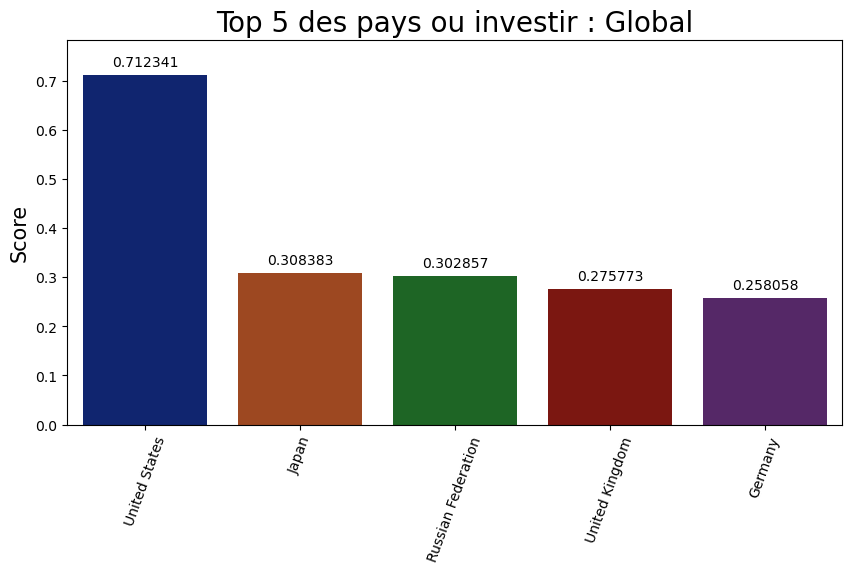

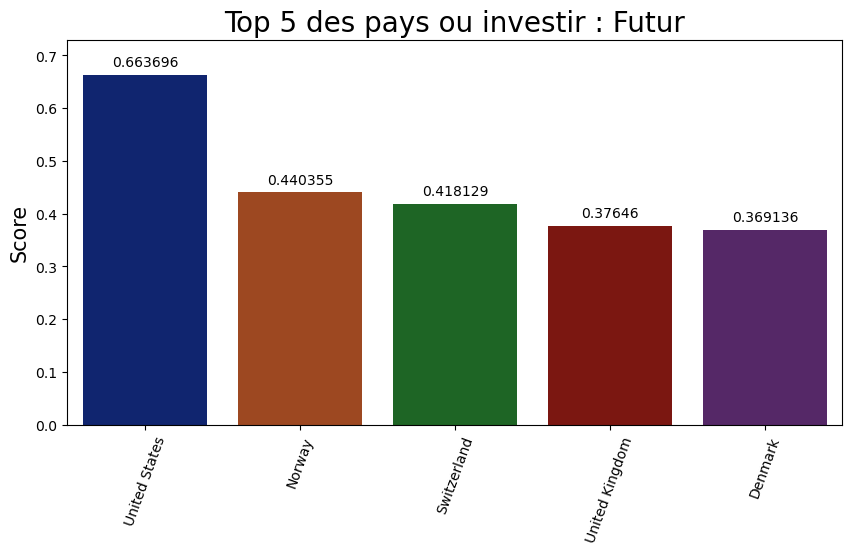

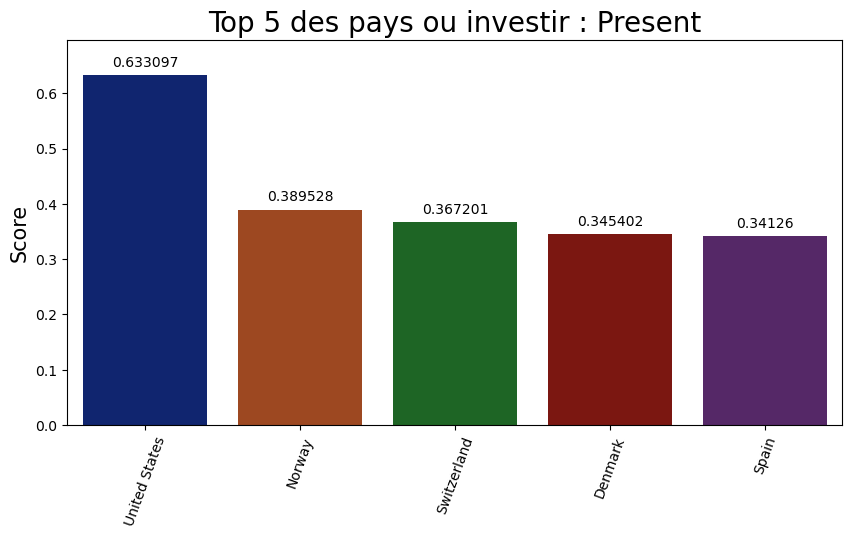

Liste des pays importants pour chaque score:
Global : ['United States', 'Japan', 'Russian Federation', 'United Kingdom', 'Germany']
Futur : ['United States', 'Norway', 'Switzerland', 'United Kingdom', 'Denmark']
Present : ['United States', 'Norway', 'Switzerland', 'Denmark', 'Spain']


In [135]:
# Fonction pour plotter les tops pays
def plot_top_countries(data, score_column, top_n=5):
    # Tri des données par score_column et sélection des top_n lignes
    graph = data.sort_values(by=score_column, ascending=False).iloc[:top_n, :]
    
    # Création d'un graphique à barres
    ax = plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=graph, x=graph.index, y=score_column, palette="dark")
    
    # Ajout des étiquettes aux barres
    ax.bar_label(ax.containers[0], padding=4)
    
    # Personnalisation du graphique
    plt.xlabel('')
    plt.ylabel('Score', size=15)
    plt.title("Top {} des pays ou investir : {}".format(top_n, score_column), size=20)
    plt.xticks(rotation=70)
    ax.margins(y=0.1)

    # Affichage du graphique
    plt.show()

# Liste des scores
scores = ['Global', 'Futur', 'Present']

# Liste pour stocker les noms de pays importants
pays_importants = []

# Boucle sur les scores
for score in scores:
    # Copie des données pour éviter de modifier l'original
    graph_data = Data_pays_riches_Scale_2015.copy()
    
    # Appel de la fonction pour plotter le graphique
    plot_top_countries(graph_data, score)
    
    # Ajout des pays importants dans la liste
    pays_importants.append(list(graph_data.sort_values(by=score, ascending=False).iloc[:5, :].index))

# Affichage de la liste des pays importants pour chaque score
print("Liste des pays importants pour chaque score:")
for score, pays in zip(scores, pays_importants):
    print("{} : {}".format(score, pays))

### 3- Perspective d'évolution 

In [136]:
# Liste des indicateurs à conserver
Indicateurs

['GDP at market prices (current US$)',
 'GDP per capita (current US$)',
 'Internet users (per 100 people)',
 'Labor force, total',
 'Personal computers (per 100 people)',
 'Population growth (annual %)',
 'Population, age 12, total',
 'Population, age 13, total',
 'Population, age 14, total',
 'Population, age 15, total',
 'Population, age 16, total',
 'Population, age 17, total',
 'Population, age 18, total',
 'Population, age 19, total',
 'Population, age 2, total',
 'Population, age 20, total',
 'Population, age 21, total',
 'Population, age 22, total',
 'Population, age 23, total',
 'Population, age 24, total',
 'Population, age 25, total',
 'Population, ages 0-14, total',
 'Population, ages 15-64, total',
 'Population, total',
 'Unemployment, total (% of total labor force)',
 'Enrolment in lower secondary education, both sexes (number)',
 'Enrolment in upper secondary education, both sexes (number)',
 'Enrolment in tertiary education, all programmes, both sexes (number)']

In [137]:
# Suppression des années avant 2000 car trop vieux et après 2020 car ce sont des extrapolations:
Data_Final_Perspective = df_Data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020']]

Indicateurs = ['Enrolment in lower secondary education, both sexes (number)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in upper secondary education, both sexes (number)',
       'Population, age 0, total', 'Population, age 1, total',
       'Population, age 2, total', 'Population, age 3, total',
       'Population, age 4, total', 'Population, age 5, total',
       'Population, age 6, total', 'Population, age 7, total',
       'Population, age 8, total', 'Population, age 9, total',
       'Population, age 10, total', 'Population, age 11, total',
       'Population, age 12, total', 'Population, age 13, total',
       'Population, age 14, total', 'Population, age 15, total',
       'Population, age 16, total', 'Population, age 17, total',
       'Population, age 18, total', 'Population, age 19, total',
       'Population, age 20, total', 'Population, age 21, total',
       'Population, age 22, total', 'Population, age 23, total',
       'Population, age 24, total', 'Population, age 25, total',
       'Population, ages 0-14, total', 'Population, ages 15-64, total',
       'Population, total']

# Filtrer les indicateurs à conserver
Data_Final_Perspective = Data_Final_Perspective[Data_Final_Perspective['Indicator Name'].isin(Indicateurs)]

# Récupération des pays ou investir:
Pays = []
for liste in pays_importants:
    for i in liste:
        Pays.append(i)
Pays = list(set(Pays))

# Filtrer les données pour les pays à investir
Data_Final_Perspective = Data_Final_Perspective[Data_Final_Perspective['Country Name'].isin(Pays)]

# Création des indicateurs par niveau de scolarité : 
CoutryCodes = list(Data_Final_Perspective[Data_Final_Perspective['Indicator Code'].isin(Etudes)]['Country Code'].unique())

for CountryCode in CoutryCodes:
    Pays = Data_Final_Perspective[Data_Final_Perspective['Country Code'] == CountryCode]
    
    # Collégiens 
    Collegien = Pays[Pays['Indicator Code'].isin(College)]
    Collegiens = Collegien.select_dtypes(exclude='object').sum().to_frame().rename(columns={0: 'Collegiens'}).T
    Collegiens = pd.concat([Collegien, Collegiens])
    Collegiens['Indicator Code'] = Collegiens['Indicator Code'].fillna('AgregaCollegien')
    Collegiens['Indicator Name'] = Collegiens['Indicator Name'].fillna('Collegiens')
    Collegiens = Collegiens.fillna(method="ffill", axis=0).iloc[-1:, :]
    Collegiens = Collegiens.replace(0, np.nan)
    Data_Final_Perspective = pd.concat([Collegiens, Data_Final_Perspective])
    
    # Lycéens 
    Lyceen = Pays[Pays['Indicator Code'].isin(Lycee)]
    Lyceens = Lyceen.select_dtypes(exclude='object').sum().to_frame().rename(columns={0: 'Lyceens'}).T
    Lyceens = pd.concat([Lyceen, Lyceens])
    Lyceens['Indicator Code'] = Lyceens['Indicator Code'].fillna('AgregaLyceen')
    Lyceens['Indicator Name'] = Lyceens['Indicator Name'].fillna('Lyceens')
    Lyceens = Lyceens.fillna(method="ffill", axis=0).iloc[-1:, :]
    Lyceens = Lyceens.replace(0, np.nan)
    Data_Final_Perspective = pd.concat([Lyceens, Data_Final_Perspective])
    
    # Étudiants 
    EtudeSup = Pays[Pays['Indicator Code'].isin(Fac)]
    EtudeSups = EtudeSup.select_dtypes(exclude='object').sum().to_frame().rename(columns={0: 'Etudiants'}).T
    EtudeSups = pd.concat([EtudeSup, EtudeSups])
    EtudeSups['Indicator Code'] = EtudeSups['Indicator Code'].fillna('AgregaEtudiants')
    EtudeSups['Indicator Name'] = EtudeSups['Indicator Name'].fillna('Etudiants')
    EtudeSups = EtudeSups.fillna(method="ffill", axis=0).iloc[-1:, :]
    EtudeSups = EtudeSups.replace(0, np.nan)
    Data_Final_Perspective = pd.concat([EtudeSups, Data_Final_Perspective])

# Remplissage des colonnes vers la droite, Récupération des valeurs sur trois ans :
Data_Final_Perspective.iloc[:, 4:] = Data_Final_Perspective.iloc[:, 4:].fillna(method="ffill", axis=1, limit=3)

# Analyse de l'année 2015 :
Perspective = pd.pivot_table(Data_Final_Perspective, index=('Country Name'), columns='Indicator Name', values='2015')

# Création d'indicateurs par calculs:
Perspective['OutOfCollege'] = Perspective['Collegiens'] - Perspective[
    'Enrolment in lower secondary education, both sexes (number)']

Perspective['OutOfLycee'] = Perspective['Lyceens'] - Perspective[
    'Enrolment in upper secondary education, both sexes (number)']

Perspective['OutOfFac'] = Perspective['Etudiants'] - Perspective[
    'Enrolment in tertiary education, all programmes, both sexes (number)']

# Suppression des valeurs négatives :
Perspective[Perspective < 0] = 0

In [138]:
# Clients Actuels :
ClientsActuels = Perspective[['Collegiens', 'Lyceens', 'Etudiants', 'OutOfCollege', 'OutOfLycee', 'OutOfFac']]

# Calcul des totaux actuels :
ClientsActuels['Total_Actuel'] = ClientsActuels[['Collegiens', 'Lyceens', 'Etudiants']].sum(axis=1)
ClientsActuels['Total_Actuel_Out'] = ClientsActuels[['OutOfCollege', 'OutOfLycee', 'OutOfFac']].sum(axis=1)

# Tri par TotalActuel en ordre décroissant :
ClientsActuels = ClientsActuels.sort_values('Total_Actuel', ascending=False)

# Affichage des résultats :
ClientsActuels

Indicator Name      Collegiens     Lyceens   Etudiants  OutOfCollege  \
Country Name                                                           
United States       17199323.0  13017540.0  32546732.0    4705861.00   
Russian Federation   5445949.0   3842249.0  11638274.0          0.00   
Japan                4667879.0   3673415.0   8556329.0    1070040.00   
Germany              3058163.0   2497178.0   6379487.0          0.00   
United Kingdom       2789968.0   2192907.0   5675676.0     428057.75   
Spain                1764282.0   1232097.0   3102840.0     138438.00   
Switzerland           326194.0    269239.0    707429.0      60994.00   
Denmark               269498.0    208932.0    500697.0      27066.00   
Norway                242502.0    190776.0    458701.0      53134.00   

Indicator Name      OutOfLycee     OutOfFac  Total_Actuel  Total_Actuel_Out  
Country Name                                                                 
United States        1281225.0  13015004.00    62763595.0        19002090.0  
Russian Federation   1019245.0   5045858.00    20926472.0         6065103.0  
Japan                      0.0   4693869.00    16897623.0         5763909.0  
Germany                    0.0   3401706.00    11934828.0         3401706.0  
United Kingdom             0.0   3322743.25    10658551.0         3750801.0  
Spain                      0.0   1138916.00     6099219.0         1277354.0  
Switzerland                0.0    412979.00     1302862.0          473973.0  
Denmark                    0.0    186941.00      979127.0          214007.0  
Norway                     0.0    190470.00      891979.0          243604.0

In [139]:
# Futurs Clients :
Futurs_Clients = Perspective[['Population, age 11, total', 'Population, age 10, total',
                             'Population, age 9, total', 'Population, age 8, total',
                             'Population, age 7, total', 'Population, age 6, total',
                             'Population, age 5, total', 'Population, age 4, total',
                             'Population, age 3, total', 'Population, age 2, total']]

# Renommer les colonnes avec des noms plus explicites
Futurs_Clients.columns = ['Dans 1 an', 'Dans 2 ans', 'Dans 3 ans', 'Dans 4 ans', 'Dans 5 ans', 
                         'Dans 6 ans', 'Dans 7 ans', 'Dans 8 ans', 'Dans 9 ans', 'Dans 10 ans']

# Calcul du total futur
Futurs_Clients['Total_Futur'] = Futurs_Clients.sum(axis=1)

# Affichage des résultats :
Futurs_Clients

Dans 1 an  Dans 2 ans  Dans 3 ans  Dans 4 ans  Dans 5 ans  \
Country Name                                                                    
Denmark               65431.0     64571.0     63720.0     62879.0     62055.0   
Germany              724279.0    714223.0    704763.0    696319.0    689310.0   
Japan               1123538.0   1110921.0   1096294.0   1080271.0   1063457.0   
Norway                58967.0     58797.0     58585.0     58365.0     58162.0   
Russian Federation  1443108.0   1455385.0   1470546.0   1484900.0   1494749.0   
Spain                466125.0    473246.0    480010.0    485789.0    489959.0   
Switzerland           76649.0     75283.0     74075.0     73056.0     72262.0   
United Kingdom       692829.0    701660.0    710015.0    718101.0    726132.0   
United States       4305908.0   4312599.0   4322729.0   4335064.0   4348369.0   

                    Dans 6 ans  Dans 7 ans  Dans 8 ans  Dans 9 ans  \
Country Name                                                         
Denmark                61258.0     60495.0     59779.0     59118.0   
Germany               683703.0    679459.0    676545.0    674924.0   
Japan                1045688.0   1026790.0   1006593.0    984932.0   
Norway                 57965.0     57751.0     57502.0     57199.0   
Russian Federation   1499223.0   1497454.0   1488567.0   1471696.0   
Spain                 492207.0    492219.0    489685.0    484290.0   
Switzerland            71703.0     71378.0     71295.0     71461.0   
United Kingdom        733409.0    739236.0    742916.0    743750.0   
United States        4361877.0   4374818.0   4386423.0   4395924.0   

                    Dans 10 ans  Total_Futur  
Country Name                                  
Denmark                 58521.0     617827.0  
Germany                674560.0    6918085.0  
Japan                  961631.0   10500115.0  
Norway                  56827.0     580120.0  
Russian Federation    1445966.0   14751594.0  
Spain                  475722.0    4829252.0  
Switzerland             71878.0     729040.0  
United Kingdom         741043.0    7249091.0  
United States         4402552.0   43546263.0

          Country Name       Indicateurs      Valeur
0        United States      Total_Actuel  62763595.0
1        United States  Total_Actuel_Out  19002090.0
2        United States       Total_Futur  43546263.0
3   Russian Federation      Total_Actuel  20926472.0
4   Russian Federation  Total_Actuel_Out   6065103.0
5   Russian Federation       Total_Futur  14751594.0
6                Japan      Total_Actuel  16897623.0
7                Japan  Total_Actuel_Out   5763909.0
8                Japan       Total_Futur  10500115.0
9              Germany      Total_Actuel  11934828.0
10             Germany  Total_Actuel_Out   3401706.0
11             Germany       Total_Futur   6918085.0
12      United Kingdom      Total_Actuel  10658551.0
13      United Kingdom  Total_Actuel_Out   3750801.0
14      United Kingdom       Total_Futur   7249091.0
15               Spain      Total_Actuel   6099219.0
16               Spain  Total_Actuel_Out   1277354.0
17               Spain       Total_Futur   482

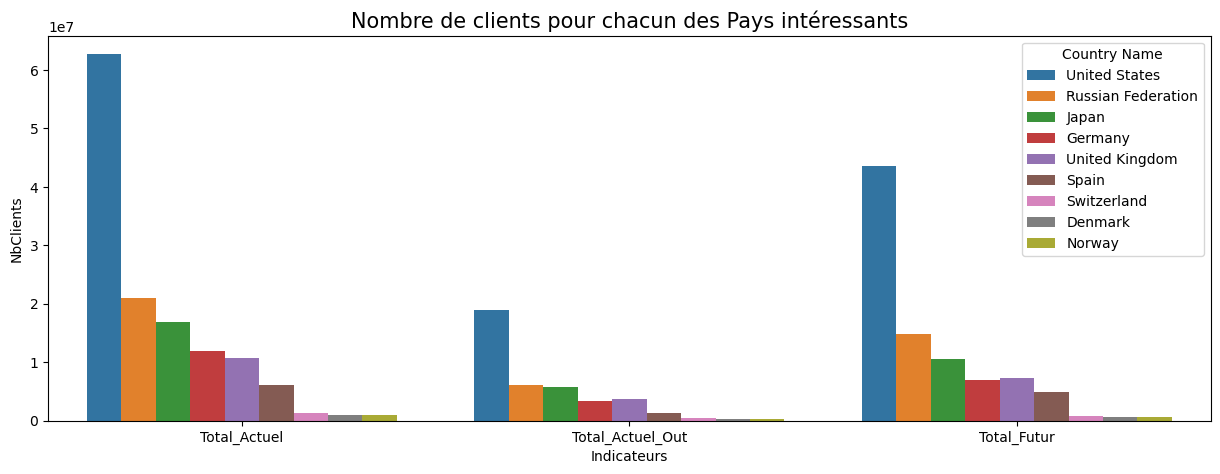

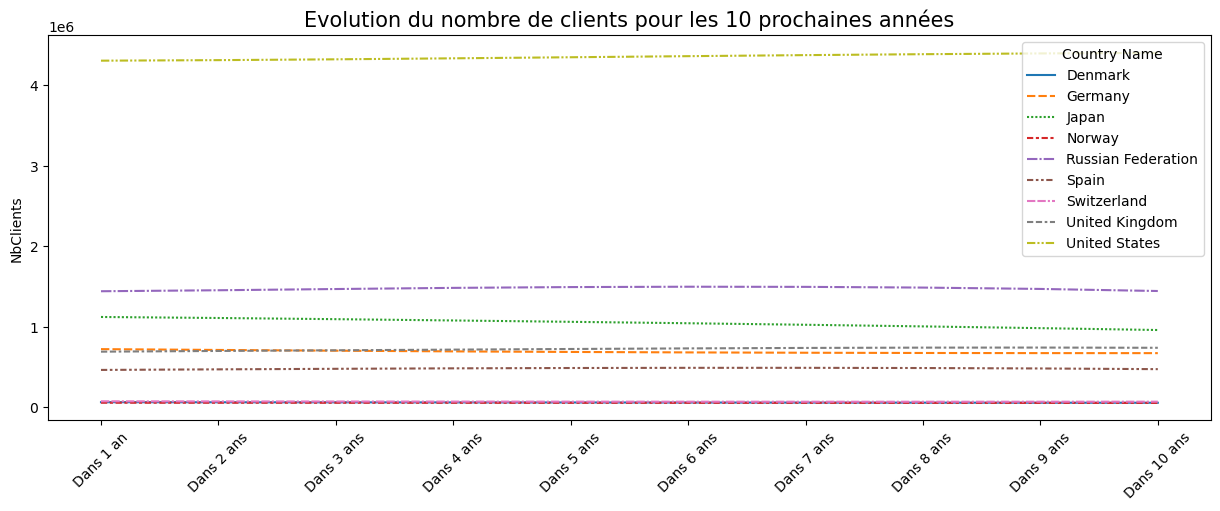

In [140]:
def prepare_data_for_graph(data1, data2):
    # Fusion des données
    graph_data = pd.merge(data1.iloc[:,-2:], data2.iloc[:,-1:], left_index=True, right_index=True)
    
    # Inversion du pivot
    graph_data = graph_data.stack().reset_index(name='Valeur').rename(columns={'level_1':'Indicateurs'})
    
    return graph_data

def plot_bar_chart(data, x_col, y_col, hue_col, title, ylabel):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.barplot(data=data, x=x_col, y=y_col, hue=hue_col)
    plt.title(title, size=15)
    plt.ylabel(ylabel)
    plt.show()

def plot_line_chart(data):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.lineplot(data=data.iloc[:,:-1].T)
    plt.xticks(rotation=45)
    plt.ylabel('NbClients')
    plt.title('Evolution du nombre de clients pour les 10 prochaines années', size=15)
    plt.show()

# Graphiques
graph_data = prepare_data_for_graph(ClientsActuels, Futurs_Clients)
print(graph_data)

plot_bar_chart(graph_data, x_col='Indicateurs', y_col='Valeur', hue_col='Country Name',
               title='Nombre de clients pour chacun des Pays intéressants', ylabel='NbClients')

plot_line_chart(Futurs_Clients)

###  4- Prévision ou Perspective d'avenir 

In [141]:
def create_polynomial_model(x, y, degree):
    """Crée un modèle polynomial et retourne la fonction de prédiction."""
    model = np.polyfit(x, y, deg=degree)
    return np.poly1d(model)

def estimation(value, annee):
    """Estime les données pour une année donnée en utilisant un modèle linéaire."""
    index = value.index.astype(int)[0]
    value = value.T.dropna().reset_index().astype({'index': int})
    x, y = value['index'], value[index]
    
    # Création du modèle linéaire
    linear_model = create_polynomial_model(x, y, degree=1)
    
    # Prédiction pour l'année spécifiée
    prediction = linear_model(annee)
    
    # Retourne la prédiction arrondie à une décimale, en s'assurant que la valeur est positive
    return round(max(prediction, 0), 1)

def rsquare(value):
    """Calcule le coefficient de détermination (R²) pour un modèle quadratique."""
    index = value.index.astype(int)[0]
    value = value.T.dropna().reset_index().astype({'index': int})
    x, y = value['index'], value[index]
    
    # Création du modèle quadratique
    quadratic_model = create_polynomial_model(x, y, degree=2)
    
    # Calcul du coefficient de détermination (R²)
    r_square = r2_score(y, quadratic_model(x))
    
    return round(r_square, 2)

J'ai créé une fonction create_polynomial_model pour éviter la duplication de code entre les deux fonctions. Cette fonction crée un modèle polynomial en fonction du degré spécifié et retourne la fonction de prédiction associée. Les fonctions estimation et rsquare utilisent cette fonction pour créer les modèles linéaires et quadratiques, respectivement.

In [142]:
# Calcul de la médiane pour la population totale en 2015 des pays riches
mediane_population = Data_pays_riches_2015['Population, total'].median()

# Filtrage des pays riches avec une population totale supérieure à la médiane de 2015
pays_riches_2015 = Data_pays_riches_2015.loc[Data_pays_riches_2015['Population, total'] >= mediane_population, 'Country Name']

# Filtrage de la DataFrame "DataFinal" pour les pays riches en 2015
DataFinal_futur = DataFinal[
    (DataFinal['Income Group'].isin(['High income: nonOECD', 'High income: OECD'])) &
    (DataFinal['Country Name'].isin(pays_riches_2015))]

# Suppression des indicateurs spécifiques
indicateurs_a_supprimer = ['Internet users (per 100 people)', 'Unemployment, total (% of total labor force)', 'Population growth (annual %)']
DataFinal_futur = DataFinal_futur[~DataFinal_futur['Indicator Name'].isin(indicateurs_a_supprimer)]

In [143]:
# Application des définitions pour chaque année dans la plage 2023 à 2030
for current_year in range(2024, 2035):
    DataFinal_futur[str(current_year)] = 0
    
    # Application de la fonction d'estimation pour chaque ligne du DataFrame (current_row_values: valeur ligne actuelle)
    for row_index in range(len(DataFinal_futur)):
        current_row_values = DataFinal_futur.iloc[row_index:row_index+1, 8:25]
        DataFinal_futur[str(current_year)].iloc[row_index:row_index+1] = estimation(current_row_values, current_year)

# Calcul du R² pour chaque ligne du DataFrame
DataFinal_futur['RSquare'] = 0
for row_index in range(len(DataFinal_futur)):
    current_row_values = DataFinal_futur.iloc[row_index:row_index+1, 8:25]
    DataFinal_futur['RSquare'].iloc[row_index:row_index+1] = rsquare(current_row_values)

# Affichage des trois premières lignes du DataFrame résultant
DataFinal_futur.head(2)

Country Name Country Code               Region       Income Group  \
142    Australia          AUS  East Asia & Pacific  High income: OECD   
143    Australia          AUS  East Asia & Pacific  High income: OECD   

                                                  Indicator Name  \
142                                                    Etudiants   
143  Enrolment in upper secondary education, both sexes (number)   

      Indicator Code  \
142  AgregaEtudiants   
143          UIS.E.3   

                                                                                                       Long definition  \
142                                                                                        Populations ages 19 à 25ans   
143  Total number of students enrolled in public and private upper secondary education institutions regardless of age.   

          Topic       2000       2001  ...       2026       2027       2028  \
142  Population  1833605.0  1839429.0  ...  2342094.9  2360978.9  2379862.9   
143   Secondary  1321502.0  1211219.0  ...   874430.3   861777.2   849124.2   

          2029       2030       2031       2032       2033       2034  RSquare  
142  2398746.9  2417630.8  2436514.8  2455398.8  2474282.7  2493166.7     0.99  
143   836471.1   823818.1   811165.0   798512.0   785859.0   773205.9     0.62  

[2 rows x 37 columns]

In [144]:
# Analyse descriptive de la colonne 'RSquare' dans le DataFrame "DataFinal_futur"
rsquare_stats = DataFinal_futur['RSquare'].describe([.1, .2, .3, .4, .5, .6, .7, .8, .9])  #  percentiles

# Affichage des statistiques descriptives spécifiques
print(rsquare_stats)

count    234.000000
mean       0.874188
std        0.173879
min        0.110000
10%        0.623000
20%        0.800000
30%        0.890000
40%        0.920000
50%        0.930000
60%        0.960000
70%        0.980000
80%        0.990000
90%        0.997000
max        1.000000
Name: RSquare, dtype: float64


- **Bien que le R² minimum soit de 0.11, indiquant une performance relativement modeste, plus de 90% des valeurs de R² dépassent 0.8, reflétant une excellente adéquation dans la majorité des cas.**

In [145]:
DataFinal_futur.groupby('Indicator Name')['RSquare'].mean().sort_values()

Indicator Name
Enrolment in lower secondary education, both sexes (number)             0.636111
Enrolment in upper secondary education, both sexes (number)             0.716667
GDP per capita (current US$)                                            0.862222
Enrolment in tertiary education, all programmes, both sexes (number)    0.871667
GDP at market prices (current US$)                                      0.874444
Collegiens                                                              0.879444
Lyceens                                                                 0.896111
Population, age 2, total                                                0.901667
Labor force, total                                                      0.925556
Population, ages 15-64, total                                           0.935556
Population, total                                                       0.941111
Population, ages 0-14, total                                            0.956111
Etudiants    

- **Malgré des extrapolations moins précises dans certains cas, en particulier avec le PIB par habitant, ces variations n'ont qu'un impact limité sur l'évaluation globale des indicateurs. En d'autres termes, la qualité globale de l'analyse des indicateurs reste robuste, même si certaines extrapolations individuelles peuvent être moins fiables. cela n'affecte pas significativement l'analyse globale des indicateurs.**

In [146]:
def calculate_global_score(data_frame, year):
    # Création d'une table pivot pour les indicateurs spécifiques
    pivot_table = pd.pivot_table(DataFinal_futur, index='Country Name', values=year, columns='Indicator Name')
    pivot_table = pivot_table[['GDP per capita (current US$)', 'Population, ages 0-14, total', 'Lyceens']]

    # Normalisation des valeurs avec MinMaxScaler
    min_max_scaler = MinMaxScaler()
    columns_list = list(pivot_table.columns)

    for column in columns_list:
        scaler = MinMaxScaler()
        pivot_table[column] = scaler.fit_transform(pivot_table[[column]])

    # Calcul du score global pour chaque pays
    pivot_table['ScoreGlobal'] = pivot_table.sum(axis=1) / pivot_table.shape[1]

    # Sélection des 5 meilleurs pays selon le score global
    top_countries = pivot_table.sort_values(by='ScoreGlobal', ascending=False).iloc[:5, :]

    # Création d'un graphique barplot pour visualiser les résultats
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=top_countries, x=top_countries.index, y='ScoreGlobal', palette="dark")
    ax.bar_label(ax.containers[0], padding=4)
    plt.xlabel('')
    plt.ylabel('Score', size=15)
    plt.title("Top 5 des meilleurs pays où investir en {}".format(year), size=20)
    plt.xticks(rotation=70)
    ax.margins(y=0.1)

    # Affichage du graphique
    return plt.show()

# Exemple d'utilisation
# calculate_global_score(DataFinal_futur, '2024')

In [147]:
# calculate_global_score(DataFinal_futur, '2024')

Merci de choisir une année parmi 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034 : 2024


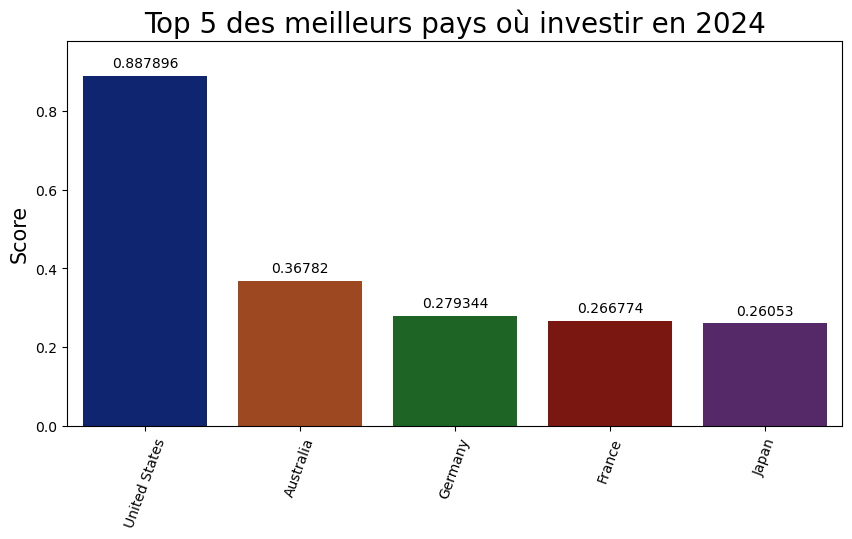

In [160]:
def select_year(data_frame):
    """
    Permet à l'utilisateur de choisir une année parmi les années disponibles dans le DataFrame.
    Si l'utilisateur fournit une année incorrecte, une année aléatoire est sélectionnée.
    """
    available_years = list(data_frame.columns[25:-1])
    chosen_year = input(f"Merci de choisir une année parmi {', '.join(available_years)} : ")
    
    if chosen_year not in available_years:
        chosen_year = random.choice(available_years)
    
    return chosen_year

# Sélection de l'année
chosen_year = select_year(DataFinal_futur)

# Calcul et affichage du score global
calculate_global_score(DataFinal_futur, chosen_year)

In [150]:
DataFinal_futur

Country Name Country Code                      Region  \
142            Australia          AUS         East Asia & Pacific   
143            Australia          AUS         East Asia & Pacific   
144            Australia          AUS         East Asia & Pacific   
145            Australia          AUS         East Asia & Pacific   
147            Australia          AUS         East Asia & Pacific   
148            Australia          AUS         East Asia & Pacific   
150            Australia          AUS         East Asia & Pacific   
151            Australia          AUS         East Asia & Pacific   
153            Australia          AUS         East Asia & Pacific   
154            Australia          AUS         East Asia & Pacific   
155            Australia          AUS         East Asia & Pacific   
156            Australia          AUS         East Asia & Pacific   
157            Australia          AUS         East Asia & Pacific   
270              Belgium          BEL       Europe & Central Asia   
271              Belgium          BEL       Europe & Central Asia   
273              Belgium          BEL       Europe & Central Asia   
274              Belgium          BEL       Europe & Central Asia   
276              Belgium          BEL       Europe & Central Asia   
277              Belgium          BEL       Europe & Central Asia   
278              Belgium          BEL       Europe & Central Asia   
279              Belgium          BEL       Europe & Central Asia   
280              Belgium          BEL       Europe & Central Asia   
281              Belgium          BEL       Europe & Central Asia   
283              Belgium          BEL       Europe & Central Asia   
284              Belgium          BEL       Europe & Central Asia   
285              Belgium          BEL       Europe & Central Asia   
590                Chile          CHL   Latin America & Caribbean   
591                Chile          CHL   Latin America & Caribbean   
593                Chile          CHL   Latin America & Caribbean   
594                Chile          CHL   Latin America & Caribbean   
595                Chile          CHL   Latin America & Caribbean   
596                Chile          CHL   Latin America & Caribbean   
597                Chile          CHL   Latin America & Caribbean   
598                Chile          CHL   Latin America & Caribbean   
599                Chile          CHL   Latin America & Caribbean   
600                Chile          CHL   Latin America & Caribbean   
602                Chile          CHL   Latin America & Caribbean   
603                Chile          CHL   Latin America & Caribbean   
604                Chile          CHL   Latin America & Caribbean   
773       Czech Republic          CZE       Europe & Central Asia   
775       Czech Republic          CZE       Europe & Central Asia   
776       Czech Republic          CZE       Europe & Central Asia   
777       Czech Republic          CZE       Europe & Central Asia   
779       Czech Republic          CZE       Europe & Central Asia   
780       Czech Republic          CZE       Europe & Central Asia   
781       Czech Republic          CZE       Europe & Central Asia   
782       Czech Republic          CZE       Europe & Central Asia   
784       Czech Republic          CZE       Europe & Central Asia   
785       Czech Republic          CZE       Europe & Central Asia   
786       Czech Republic          CZE       Europe & Central Asia   
787       Czech Republic          CZE       Europe & Central Asia   
788       Czech Republic          CZE       Europe & Central Asia   
998               France          FRA       Europe & Central Asia   
999               France          FRA       Europe & Central Asia   
1001              France          FRA       Europe & Central Asia   
1002              France          FRA       Europe & Central Asia   
1003              France          FRA       Europe & Central Asia   
1004      

In [151]:
DataFinal_futur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 142 to 3029
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     234 non-null    object 
 1   Country Code     234 non-null    object 
 2   Region           234 non-null    object 
 3   Income Group     234 non-null    object 
 4   Indicator Name   234 non-null    object 
 5   Indicator Code   234 non-null    object 
 6   Long definition  234 non-null    object 
 7   Topic            234 non-null    object 
 8   2000             230 non-null    float64
 9   2001             230 non-null    float64
 10  2002             230 non-null    float64
 11  2003             231 non-null    float64
 12  2004             231 non-null    float64
 13  2005             233 non-null    float64
 14  2006             233 non-null    float64
 15  2007             233 non-null    float64
 16  2008             233 non-null    float64
 17  2009         